In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.colors as col
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['figure.dpi'] = 600
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']
plt.rcParams['axes.facecolor'] = (1,1,1,0)

In [3]:
adata = sc.read('./../../data/processed/adata_reannotated_final.h5ad')
adata.obs['ko_line'] = adata.obs[['knockout', 'line']].apply(lambda x: '_'.join(x), axis=1)

In [4]:
valid_neurons = pd.read_excel('qpcr.xlsx', sheet_name='Neurons')
valid_glia = pd.read_excel('qpcr.xlsx', sheet_name='Glia')
valid_data = pd.concat([valid_neurons, valid_glia])

In [5]:
valid_data = pd.DataFrame(
    valid_data.set_index(['Gene', 'Cell Type', 'Genotype'])
    .stack(),
    columns = ['Value']
).reset_index()
valid_data = valid_data.rename(columns={'level_3': 'Specimen',})
valid_data['Replicate'] = valid_data['Specimen'].apply(lambda x: x.split(' ')[-1])
valid_data['Condition'] = valid_data['Specimen'].apply(lambda x: x.split(' ')[0])
valid_data['Comb'] = valid_data[['Genotype', 'Condition']].apply(lambda x: ' '.join(x), axis=1)

In [6]:
rnascope = pd.read_excel('rnascope.xlsx', sheet_name=[
    'Oligo', 
    'Resp18_WT', 
    'Resp18_GrNex',
    'Resp18_MrNex',
    'Resp18_GrDlx',
    'Resp18_MrDlx'
])

In [7]:
import pickle
with open('./../../results/DE/de_stress_new/pickle/new_function.pickle', 'rb') as f:
    de_post_df = pickle.load(f)
    
de_genes = pd.read_pickle('./../../results/DE/de_stress_new/pickle/genes.pickle')
de_genes_sign = de_genes[de_genes['qval']<0.05]

de_genes_sign_mean = de_genes_sign[(de_genes_sign['mean_pert']>0.1) | (de_genes_sign['mean_ctrl']>0.1)]
de_genes_sign_mean = de_genes_sign_mean[np.abs(de_genes_sign_mean['log2fc'])>0.1]

In [17]:
def pval_to_asterisk(p):
    if p < 0.001:
        ast = '***'
    elif p < 0.01:
        ast = '**'
    elif p < 0.05:
        ast = '*'
    else:
        ast = ''
    return ast

In [9]:
adata.uns['louvain_coarse_colors'] = [
    '#ffd11a', #GABA
    '#993300', #Cajal
    '#33a7ff', #GN
    '#80c8ff', #NPC
    '#008ffb', #Dg1
    '#005799', #Dg2
    '#b3b3ff', #Mossy
    '#fed480', #CA11
    '#feb019', #Ca12
    '#cb8801', #CA13
    '#993366', #CA2
    '#ff4d67', #CA31
    '#ff0026', #CA32
    '#990017', #CA33
    '#8c75d7', #Astro1
    '#482e9e', #Astro2
    '#33ffbb', #OPC
    '#00e396', #COP
    '#009966', #MFOLs
    '#004d33', #OLIGO
    '#33cccc', #MICRO
    '#aaff00', #MACRO1
    '#669900', #MACRO2
    '#bb99ff', #EPENDY
    '#ff1afb', #PERI
    '#cc00c9', #ENDO
    '#330066', #MENING
    '#ff80fd', #VASC
    '#990000', #CHORO
]

In [10]:
adata.uns['condition_colors'] = ['#0C7bdc', '#ffc20a']

In [11]:
adata.uns['de_colors_up'] = [
    '#ff0000', #GABA
    '#ff0000', #Cajal
    '#ff0000', #GN
    '#ff0000', #NPC
    '#ff0000', #Dg1
    '#ff0000', #Dg2
    '#ff0000', #Mossy
    '#ff0000', #CA11
    '#ff0000', #Ca12
    '#ff0000', #CA13
    '#ff0000', #CA2
    '#ff0000', #CA31
    '#ff0000', #CA32
    '#ff0000', #CA33
    '#00cc99', #Astro1
    '#00cc99', #Astro2
    '#00cc99', #OPC
    '#00cc99', #COP
    '#00cc99', #MFOLs
    '#00cc99', #OLIGO
    '#00cc99', #MICRO
    '#00cc99', #MACRO1
    '#00cc99', #MACRO2
    '#00cc99', #EPENDY
    '#8000ff', #PERI
    '#8000ff', #ENDO
    '#8000ff', #MENING
    '#8000ff', #VASC
    '#8000ff', #CHORO
]

adata.uns['de_colors_down'] = [
    '#ff6666', #GABA
    '#ff6666', #Cajal
    '#ff6666', #GN
    '#ff6666', #NPC
    '#ff6666', #Dg1
    '#ff6666', #Dg2
    '#ff6666', #Mossy
    '#ff6666', #CA11
    '#ff6666', #Ca12
    '#ff6666', #CA13
    '#ff6666', #CA2
    '#ff6666', #CA31
    '#ff6666', #CA32
    '#ff6666', #CA33
    '#66ffd9', #Astro1
    '#66ffd9', #Astro2
    '#66ffd9', #OPC
    '#66ffd9', #COP
    '#66ffd9', #MFOLs
    '#66ffd9', #OLIGO
    '#66ffd9', #MICRO
    '#66ffd9', #MACRO1
    '#66ffd9', #MACRO2
    '#66ffd9', #EPENDY
    '#cc99ff', #PERI
    '#cc99ff', #ENDO
    '#cc99ff', #MENING
    '#cc99ff', #VASC
    '#cc99ff', #CHORO
]

In [12]:
def set_axis_style(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # add some space between the axis and the plot
    ax.spines['left'].set_position(('outward', 8))
    ax.spines['bottom'].set_position(('outward', 5))
    sns.despine()

In [14]:
de_genes_sign_sub = de_genes_sign[de_genes_sign['clust']=='CA3 Glut 2']
de_genes_sign_sub = de_genes_sign_sub[de_genes_sign_sub['test'].isin(['WT', 'GR_Nex', 'MR_Nex'])]
pivot = pd.pivot_table(de_genes_sign_sub, index='gene', values='log2fc', columns='test')
pivot['shift_GR'] = np.abs(pivot['WT'] - pivot['GR_Nex'])
pivot['shift_MR'] = np.abs(pivot['WT'] - pivot['MR_Nex'])

In [ ]:
pivot.sort_values(by='shift_GR', ascending=False)

In [28]:
pivot.sort_values(by='shift_MR', ascending=False)

test       GR_Nex    MR_Nex        WT  shift_GR  shift_MR
gene                                                     
Fibcd1        NaN  0.591629 -0.793658       NaN  1.385287
Fosl2    0.924328  2.162326  0.921268  0.003060  1.241059
Rasd1         NaN  1.612148  0.527052       NaN  1.085096
Sox5          NaN  0.483823 -0.427577       NaN  0.911400
Tiam1         NaN  0.458059 -0.438536       NaN  0.896595
...           ...       ...       ...       ...       ...
mt-Co3        NaN       NaN -0.090445       NaN       NaN
mt-Nd1  -0.149155       NaN -0.163757  0.014603       NaN
mt-Nd4        NaN  0.066665       NaN       NaN       NaN
mt-Nd4l       NaN  0.231046       NaN       NaN       NaN
mt-Nd5        NaN  0.109431       NaN       NaN       NaN

[3579 rows x 5 columns]

Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical


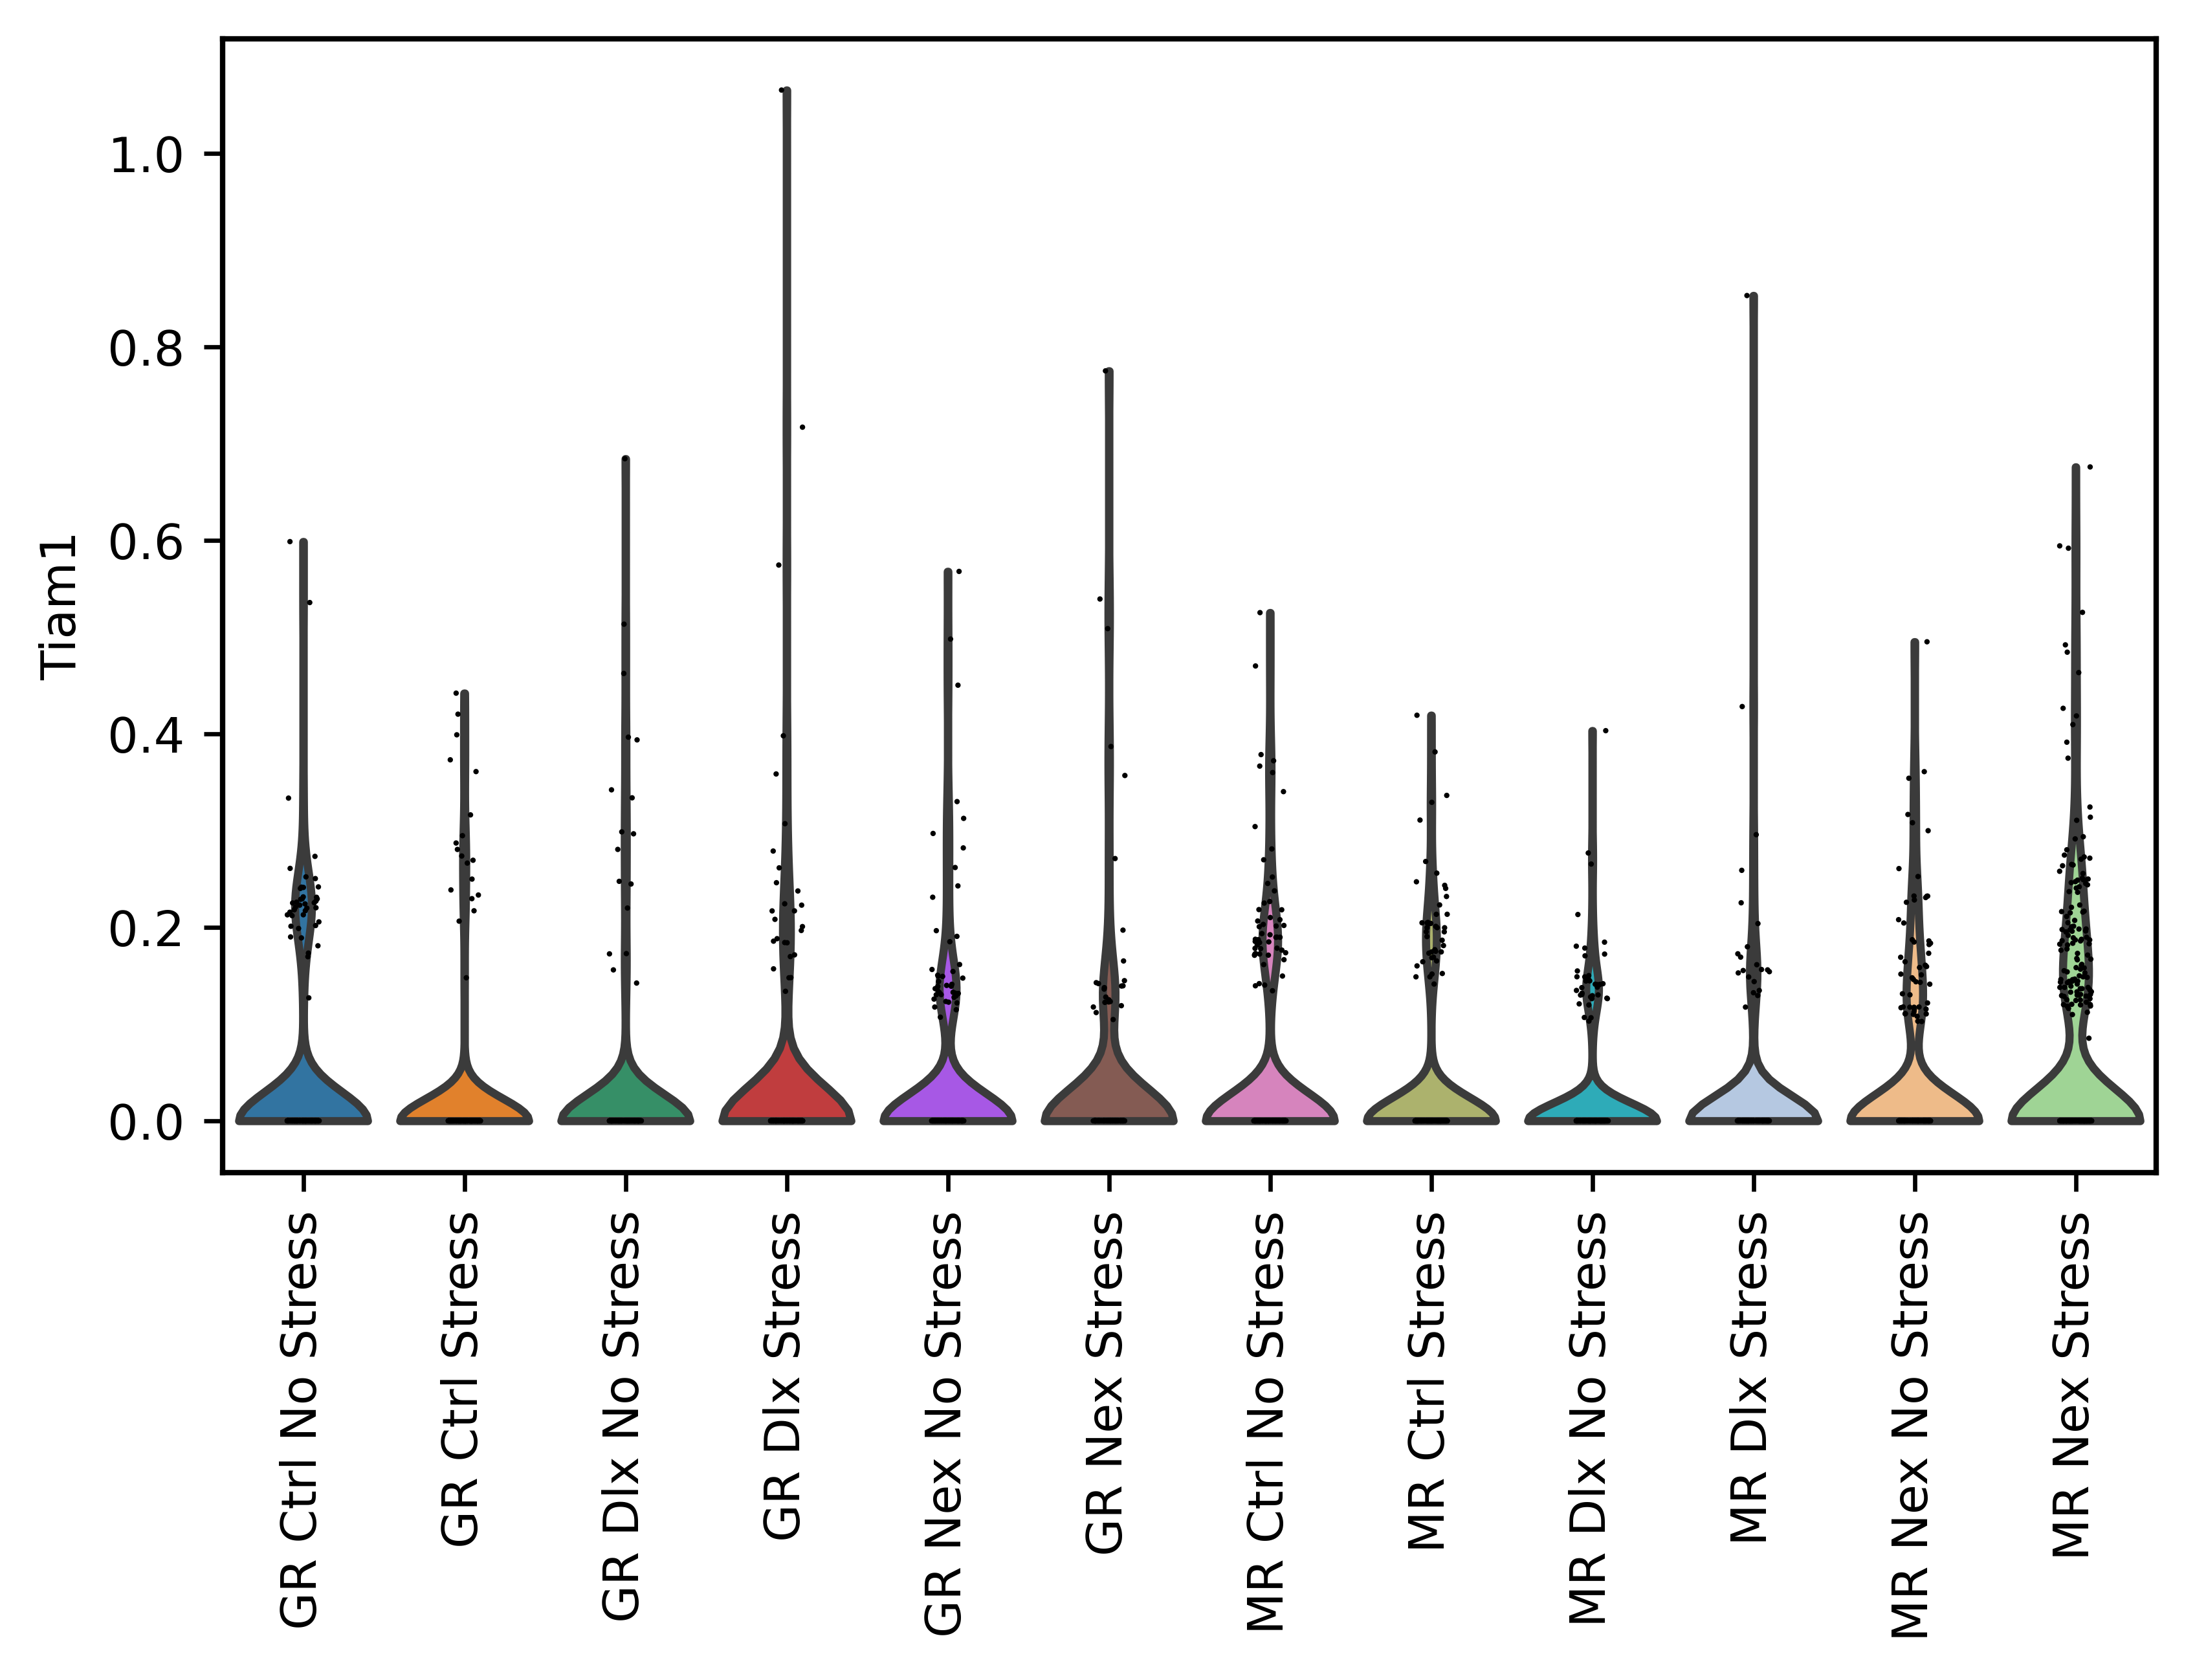

In [35]:
sc.pl.violin(adata[adata.obs['louvain_coarse']=='CA3 Glut 2'], groupby='comb', keys='Tiam1', rotation=90)

In [30]:
pivot[pivot['shift_MR'] > 0].index.values

array(['0610010F05Rik', '1110004F10Rik', '2610001J05Rik', '2810004N23Rik',
       '2900097C17Rik', 'AC160336.1', 'AI115009', 'AI593442', 'Abhd14b',
       'Abtb1', 'Acap2', 'Acin1', 'Acot5', 'Adar', 'Add1', 'Add3',
       'Adipor2', 'Ahcyl1', 'Ak4', 'Akap11', 'Akap8l', 'Amdhd2', 'Apba2',
       'Aplp2', 'Apopt1', 'Arc', 'Arhgap21', 'Arhgdig', 'Arl6ip4',
       'Armcx5', 'Arnt2', 'Arpc5', 'Atp1b1', 'Atp5g1', 'Atp6v1g1',
       'Atp6v1g2', 'Atp9a', 'Auts2', 'B230334C09Rik', 'B2m', 'B3gat1',
       'B830017H08Rik', 'Baiap2', 'Basp1', 'Bdnf', 'Bloc1s2', 'Bmyc',
       'Bnip3l', 'Brinp2', 'Brk1', 'Bzw2', 'C1d', 'C1qtnf12', 'Cacna1e',
       'Cacnb2', 'Cacng3', 'Cadm2', 'Calr', 'Camk2g', 'Camk2n1', 'Camkk1',
       'Camkk2', 'Cap2', 'Car10', 'Car11', 'Car4', 'Cars2', 'Cavin3',
       'Cbfa2t3', 'Ccdc6', 'Ccdc88a', 'Cd47', 'Cdh24', 'Cdk2ap2',
       'Cdk5r1', 'Cenpb', 'Cfl2', 'Chn1', 'Chordc1', 'Cirbp', 'Clip4',
       'Cmas', 'Cnksr2', 'Cnr1', 'Cntfr', 'Cntn1', 'Coa3', 'Col12a1',
       'Cor

Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... s

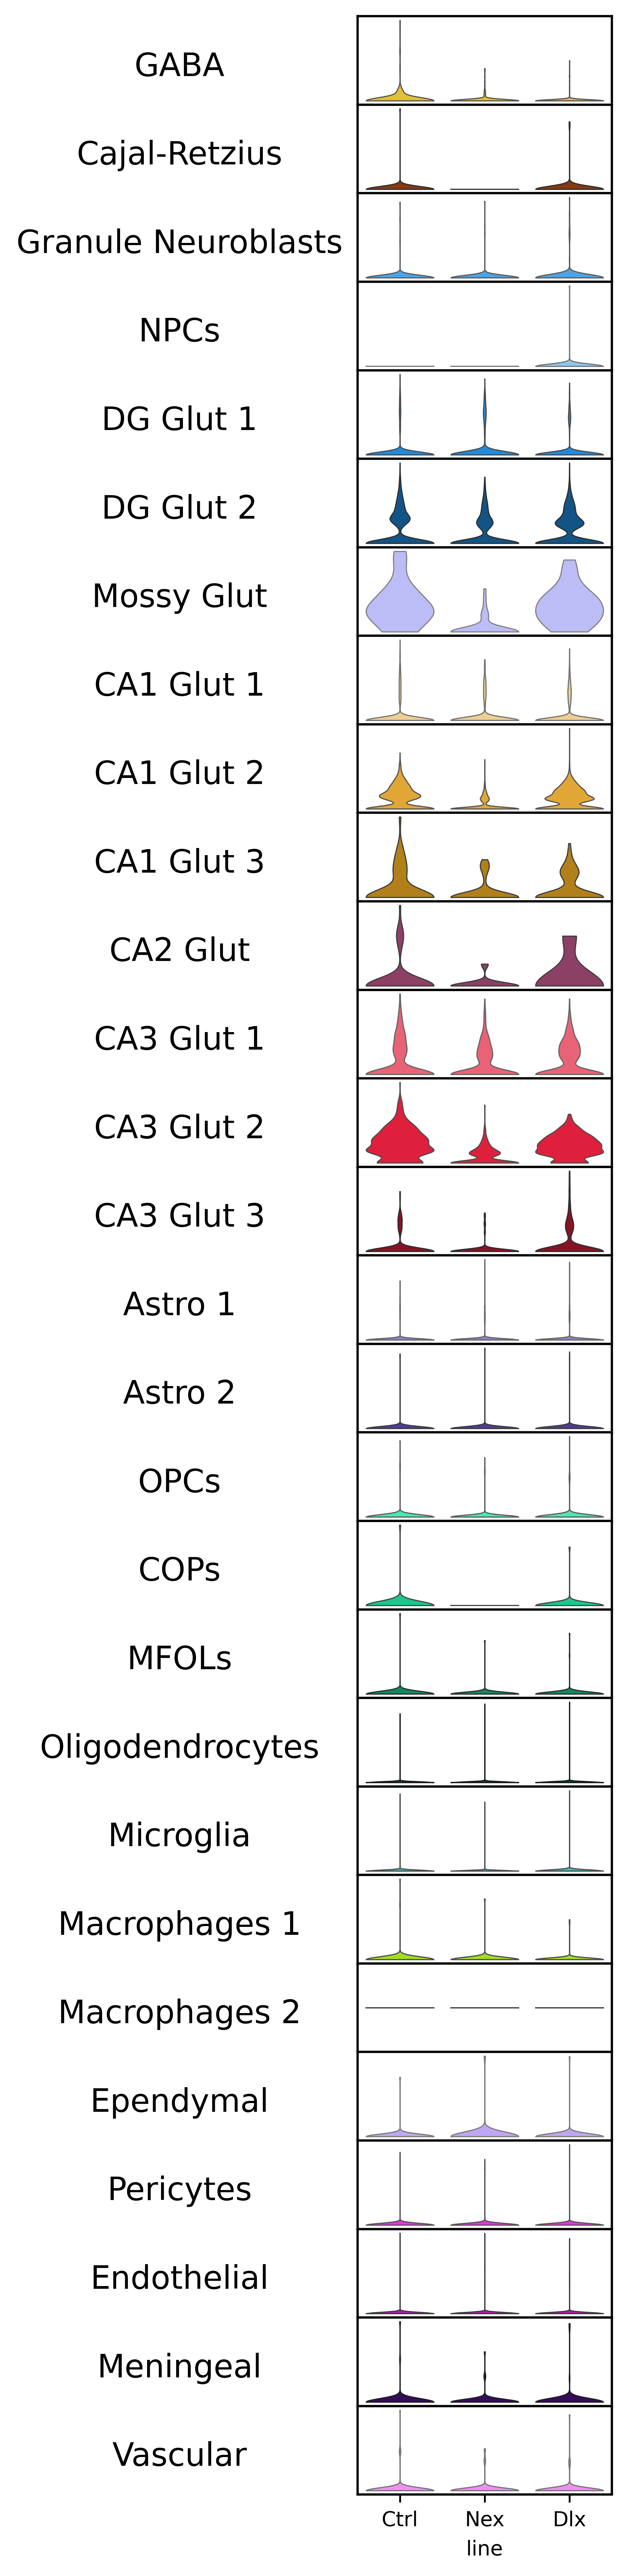

In [13]:
N = len(adata.obs.louvain_coarse.unique())
adata.obs['line'] = adata.obs['line'].cat.reorder_categories(['Ctrl', 'Nex', 'Dlx'])
fig, ax = plt.subplots(N-1, 1, figsize=(2, 20), sharex=False)
fig.subplots_adjust(hspace=0)
for i, cat in enumerate(adata.obs.louvain_coarse.cat.categories):
    if cat != 'Choroid Plexus':
        sc.pl.violin(
            adata[
                (adata.obs.louvain_coarse==cat)
                & (adata.obs.knockout=='MR')
            ],
            groupby='line',
            keys='Nr3c2',
            show=False,
            ax=ax[i],
            jitter=False,
            stripplot=False,
            palette=[adata.uns['louvain_coarse_colors'][i] for x in range(2)],
            scale='width',
            linewidth=0.5,
        )
        ax[i].set_ylabel(cat, rotation=0, fontsize=14)
        if i!=N-2:
            ax[i].set_xticks((),())
        ax[i].set_yticks((),())
        ax[i].yaxis.set_label_coords(-0.7, 0.25)

Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ko_line' as categorical
Trying to set attribute `.obs` of view, copying.
... s

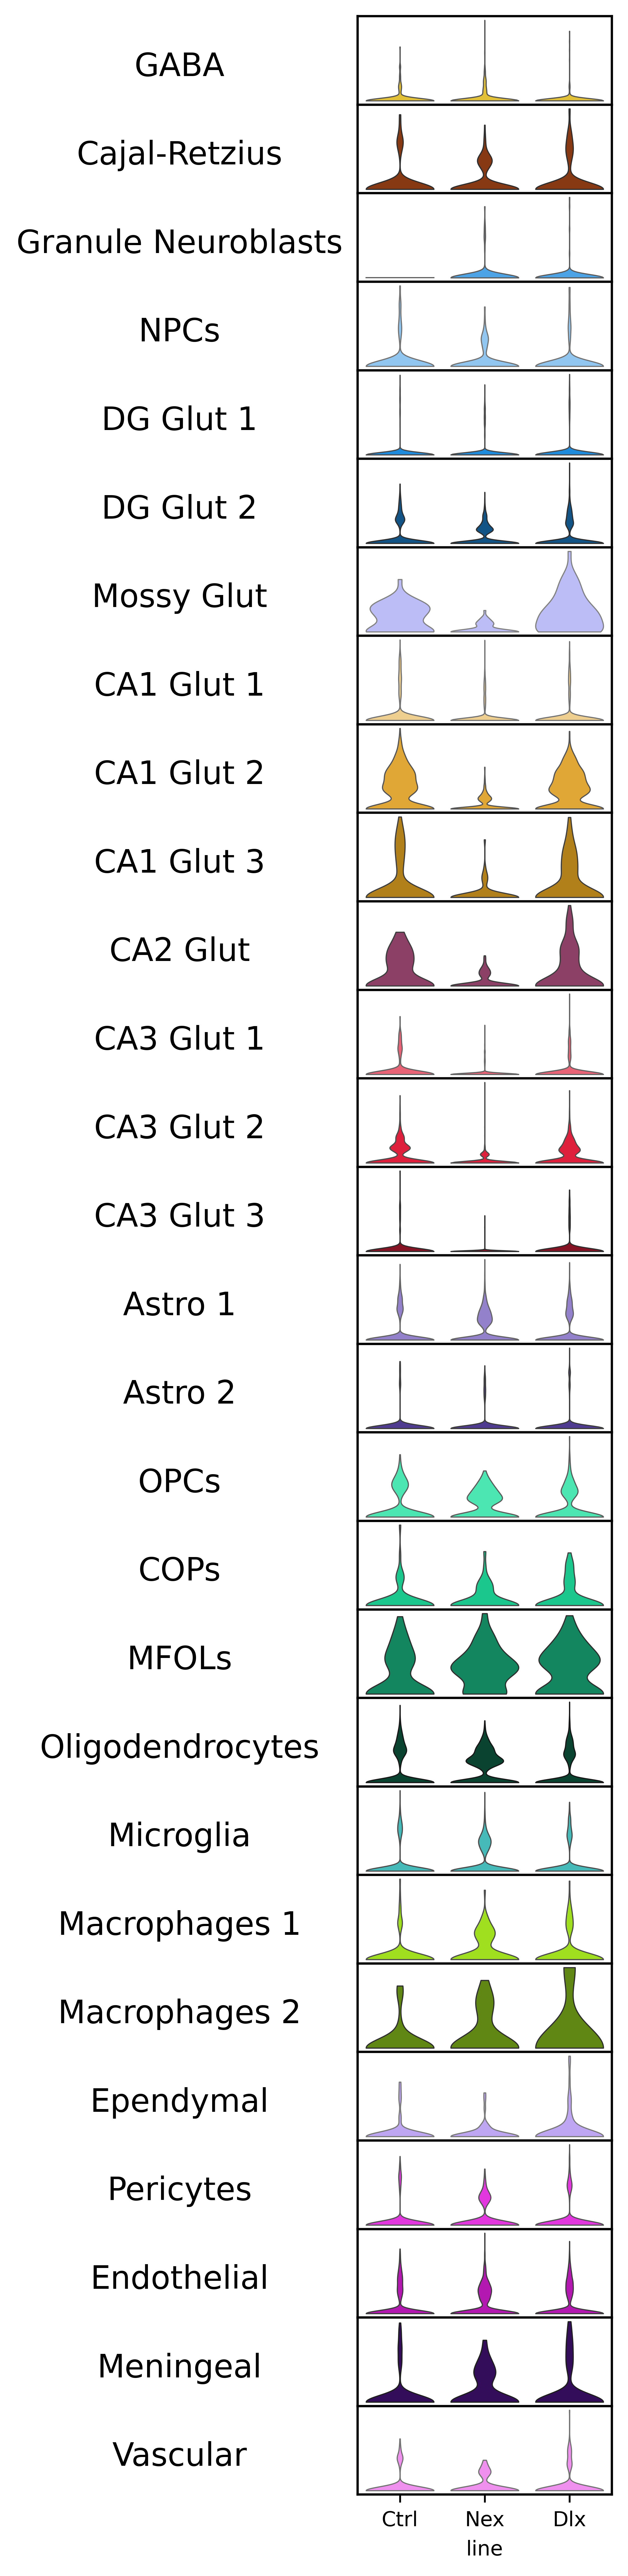

In [15]:
N = len(adata.obs.louvain_coarse.unique())
adata.obs['line'] = adata.obs['line'].cat.reorder_categories(['Ctrl', 'Nex', 'Dlx'])
fig, ax = plt.subplots(N-1, 1, figsize=(2, 20), sharex=False)
fig.subplots_adjust(hspace=0)
for i, cat in enumerate(adata.obs.louvain_coarse.cat.categories):
    if cat != 'Choroid Plexus':
        sc.pl.violin(
            adata[
                (adata.obs.louvain_coarse==cat)
                & (adata.obs.knockout=='GR')
            ],
            groupby='line',
            keys='Nr3c1',
            show=False,
            ax=ax[i],
            jitter=False,
            stripplot=False,
            palette=[adata.uns['louvain_coarse_colors'][i] for x in range(2)],
            scale='width',
            linewidth=0.5,
        )
        ax[i].set_ylabel(cat, rotation=0, fontsize=14)
        if i!=N-2:
            ax[i].set_xticks((),())
        ax[i].set_yticks((),())
        ax[i].yaxis.set_label_coords(-0.7, 0.25)

In [8]:
stress_ids = [
    'GR_Ctrl_393', 
    'GR_Ctrl_493', 
    'GR_Ctrl_499', 
    'GR_Dlx_495', 
    'GR_Dlx_497', 
    'GR_Dlx_505',
    'GR_Nex_395', 
    'GR_Nex_399', 
    'GR_Nex_405', 
    'MR_Ctrl_147', 
    'MR_Ctrl_149', 
    'MR_Ctrl_163',
    'MR_Dlx_143', 
    'MR_Dlx_145', 
    'MR_Dlx_153', 
    'MR_Nex_165', 
    'MR_Nex_173', 
    'MR_Nex_179'
]

ctrl_ids = [
    'GR_Ctrl_401', 
    'GR_Ctrl_503', 
    'GR_Ctrl_507', 
    'GR_Dlx_513', 
    'GR_Dlx_515', 
    'GR_Dlx_521',
    'GR_Nex_407', 
    'GR_Nex_409', 
    'GR_Nex_411', 
    'MR_Ctrl_151', 
    'MR_Ctrl_155', 
    'MR_Ctrl_171',
    'MR_Dlx_159',
    'MR_Dlx_163',
    'MR_Dlx_165', 
    'MR_Nex_181',
    'MR_Nex_187'
]
adata.obs['sample_id'] = [
    x[:-3] 
    + 'ctrl_' 
    + x[-3:] 
    if x in ctrl_ids 
    else x[:-3] + 'stress_' + x[-3:] 
    for x in adata.obs['sample'].values
]

col_dict = {
    'GR_Ctrl_ctrl_401': '#49eb34',
     'GR_Ctrl_stress_393': '#a6123a',
     'GR_Ctrl_ctrl_503': '#49eb34',
     'GR_Ctrl_stress_493': '#a6123a',
     'GR_Ctrl_ctrl_507': '#49eb34',
     'GR_Ctrl_stress_499': '#a6123a',
     'GR_Nex_ctrl_407': '#49eb34',
     'GR_Nex_ctrl_409': '#49eb34',
     'GR_Nex_stress_399': '#a6123a',
     'GR_Nex_stress_405': '#a6123a',
     'GR_Nex_ctrl_411': '#49eb34',
     'GR_Dlx_stress_495': '#a6123a',
     'GR_Dlx_ctrl_515': '#49eb34',
     'GR_Dlx_stress_505': '#a6123a',
     'GR_Dlx_ctrl_513': '#49eb34',
     'GR_Dlx_ctrl_521': '#49eb34',
     'GR_Dlx_stress_497': '#a6123a',
     'MR_Ctrl_ctrl_155': '#49eb34',
     'MR_Ctrl_stress_163': '#a6123a',
     'MR_Ctrl_ctrl_151': '#49eb34',
     'MR_Ctrl_stress_147': '#a6123a',
     'MR_Ctrl_ctrl_171': '#49eb34',
     'MR_Ctrl_stress_149': '#a6123a',
     'MR_Nex_stress_179': '#a6123a',
     'MR_Nex_stress_173': '#a6123a',
     'MR_Nex_ctrl_187': '#49eb34',
     'MR_Nex_stress_165': '#a6123a',
     'MR_Nex_ctrl_181': '#49eb34',
     'MR_Dlx_ctrl_159': '#49eb34',
     'MR_Dlx_stress_153': '#a6123a',
     'MR_Dlx_stress_143': '#a6123a',
     'MR_Dlx_ctrl_165': '#49eb34',
     'MR_Dlx_stress_145': '#a6123a',
     'MR_Dlx_ctrl_163': '#49eb34',
}

In [9]:
adata.obs['louvain_coarser'] = adata.obs.louvain_coarse.astype(str).copy()
adata.obs['louvain_coarser'][adata.obs.louvain_coarser.str.contains('DG|NPCs|Granule')] = 'DG Neurons'
adata.obs['louvain_coarser'][adata.obs.louvain_coarser.str.contains('CA1')] = 'CA1 Neurons'
adata.obs['louvain_coarser'][adata.obs.louvain_coarser.str.contains('CA3')] = 'CA3 Neurons'
adata.obs['louvain_coarser'][adata.obs.louvain_coarser.str.contains('CA2|Cajal|GABA|Glut')] = 'Other Neurons'
adata.obs['louvain_coarser'][adata.obs.louvain_coarser.str.contains('OPC|COP|MFOLs|Oligo')] = 'Oligo'
adata.obs['louvain_coarser'][adata.obs.louvain_coarser.str.contains('Astro')] = 'Astro'
adata.obs['louvain_coarser'][adata.obs.louvain_coarser.str.contains('Pericytes|Ependymal|Choroid|Vasc|Mening|Macro')] = 'Other (Glia)'
adata.obs.louvain_coarser = adata.obs.louvain_coarser.astype('category')

#cmap = [
#    '#5c5cd6', #Astro 2
#    '#d11aff', #CA1 2
#    '#ff1a1a', #CA3 2
#    '#0039e6', #DG 2
#    '#b38f00', #Endo
#    '#666633', #Microglia
#    '#00b36b', #Oligo
#    '#ffe680', #other glia
#    '#ff5050', #other neur
#]
#COLORBLIND
cmap = [
    '#007002', #Astro 2
    '#ef0096', #CA1 2
    '#cd022d', #CA3 2
    '#00489e', #DG 2
    '#65019f', #Endo
    '#86ffde', #Microglia
    '#00735c', #Oligo
    '#ffe680', #other glia
    '#ffac3b', #other neur
]
adata.uns['louvain_coarser_colors'] = cmap

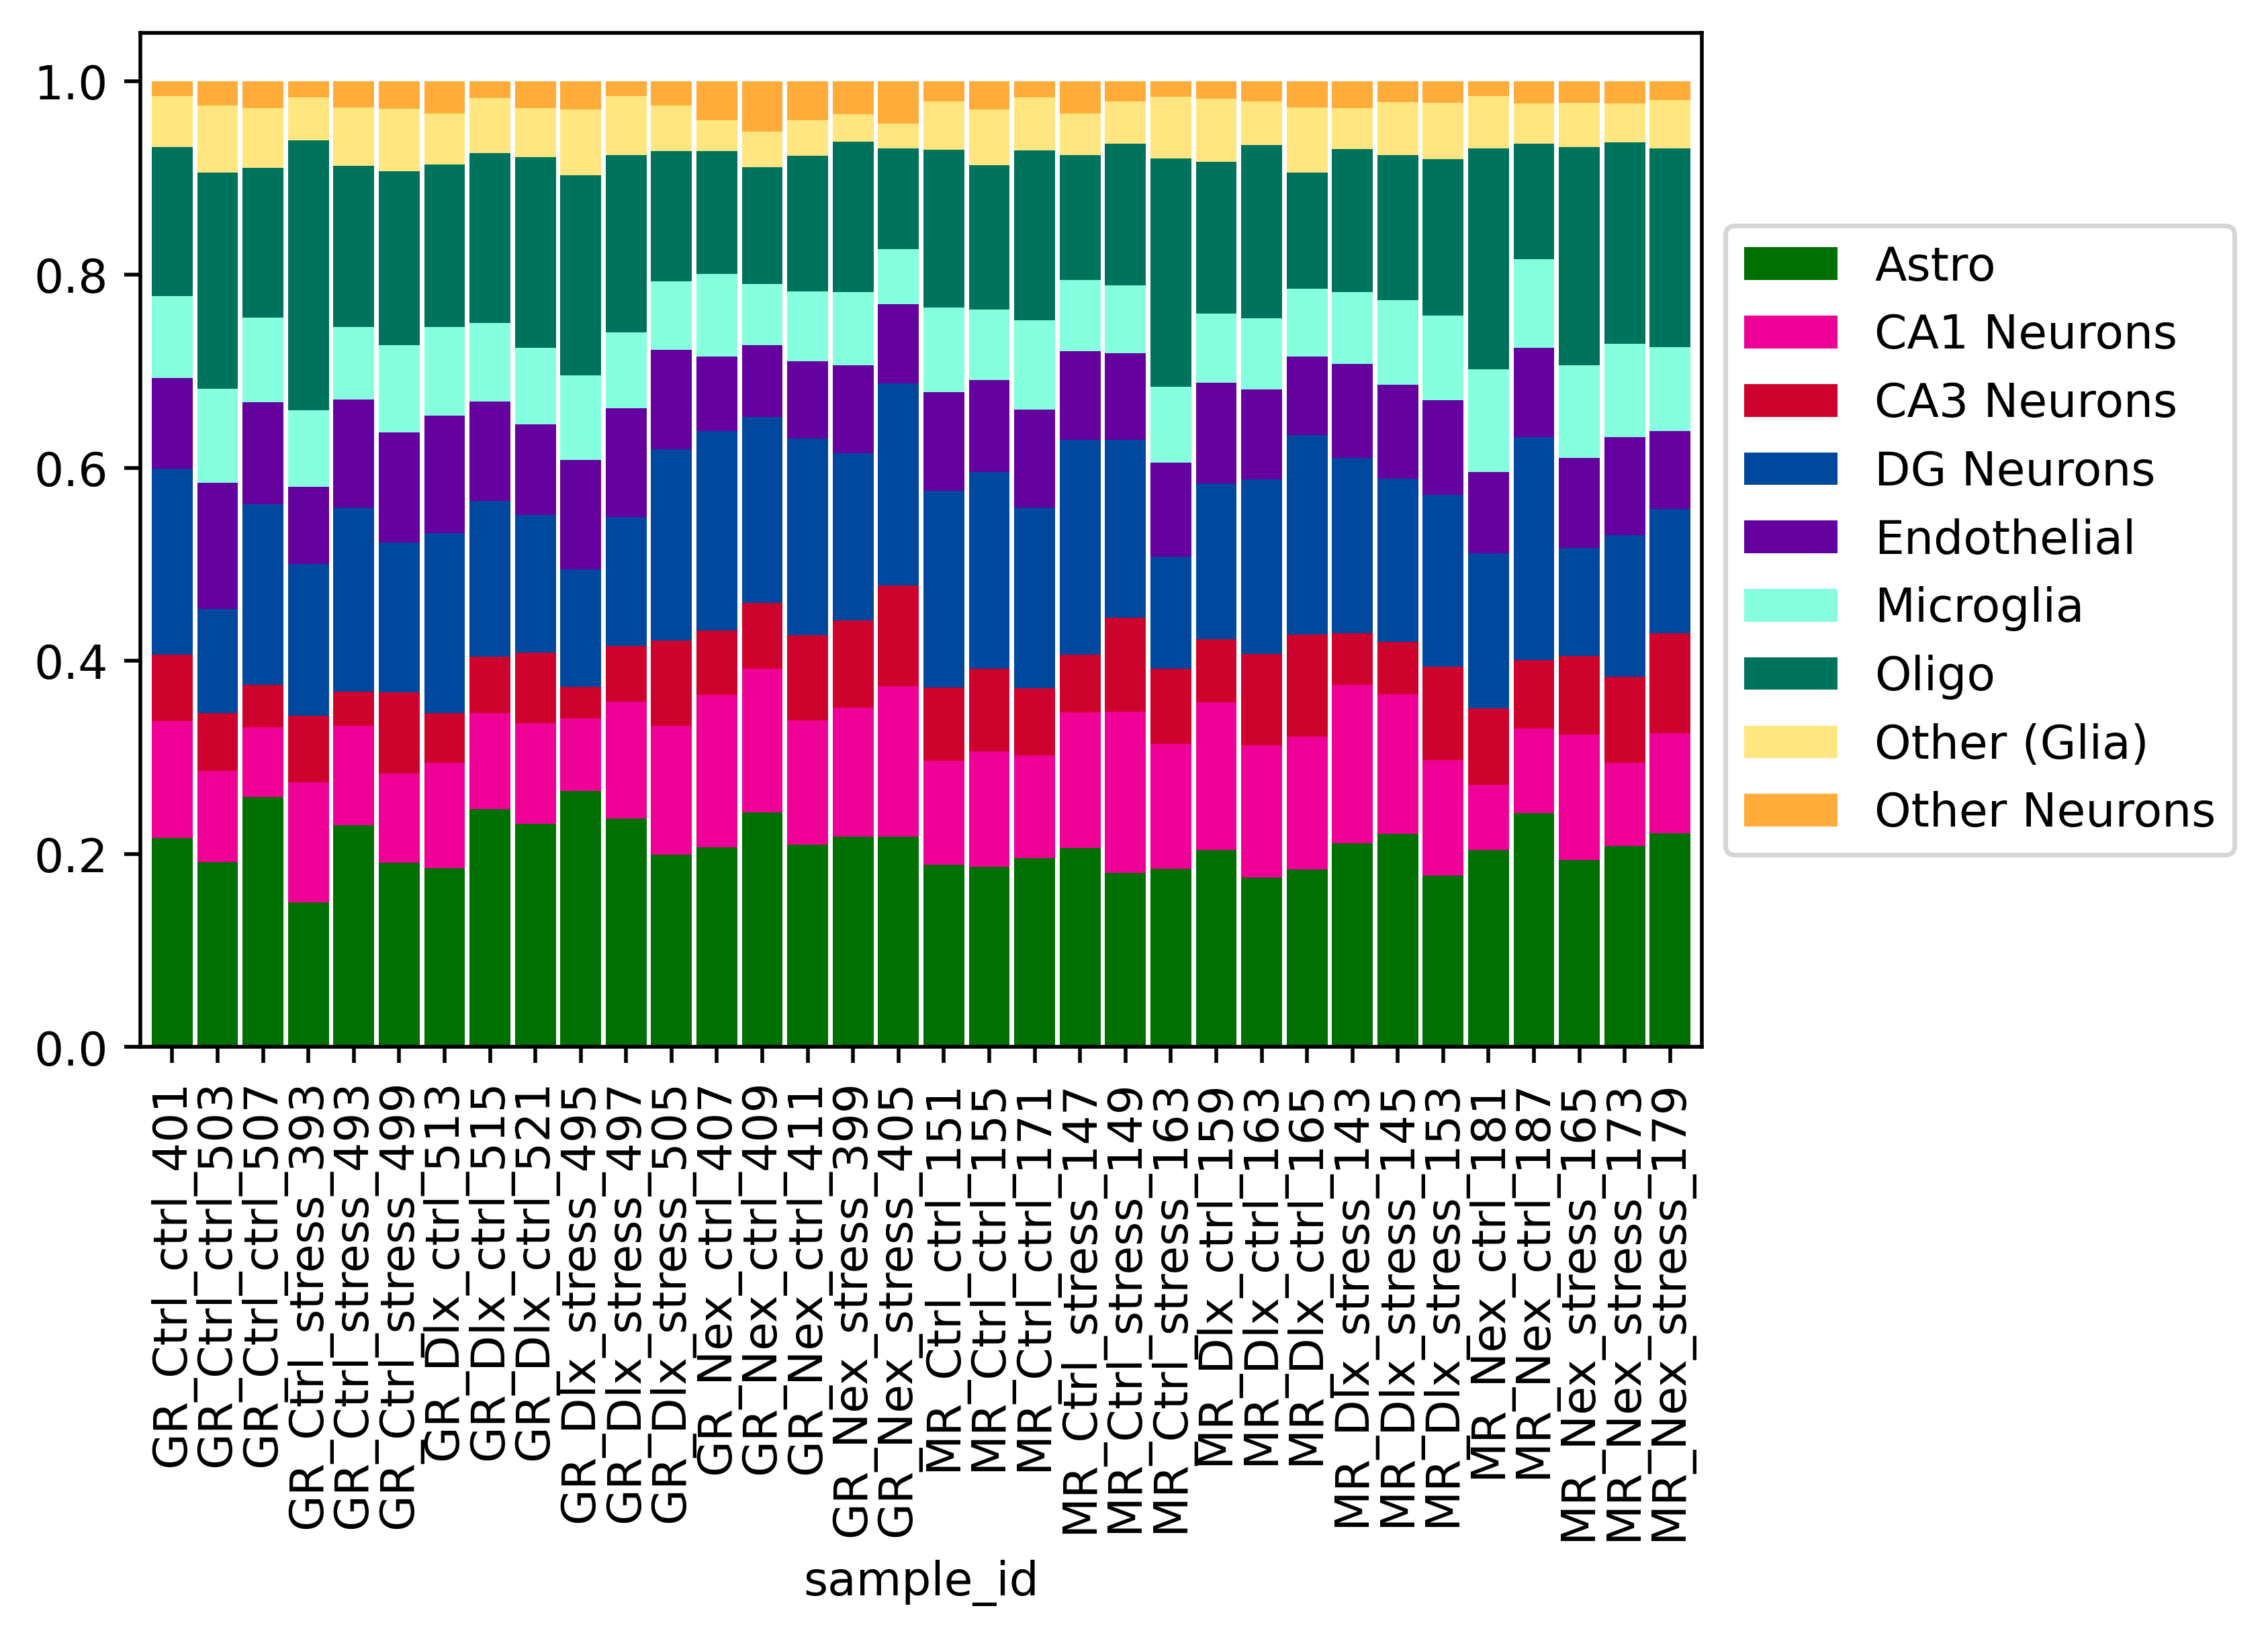

In [10]:
df = (
    adata#[adata.obs.knockout=='GR']
    .obs[['louvain_coarser', 'sample_id']]
    .groupby('sample_id')['louvain_coarser']
    .value_counts()
    .unstack('louvain_coarser')
)
df = pd.DataFrame(df)
df = df.div(df.sum(axis=1), axis=0)

fig, ax = plt.subplots(1, 1)
df.plot(kind='bar', 
        stacked=True, 
        ax=ax, 
        color=cmap,
        width=0.9).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
l = ax.get_legend()

In [11]:
col_series = pd.Series(col_dict, index=col_dict.keys())

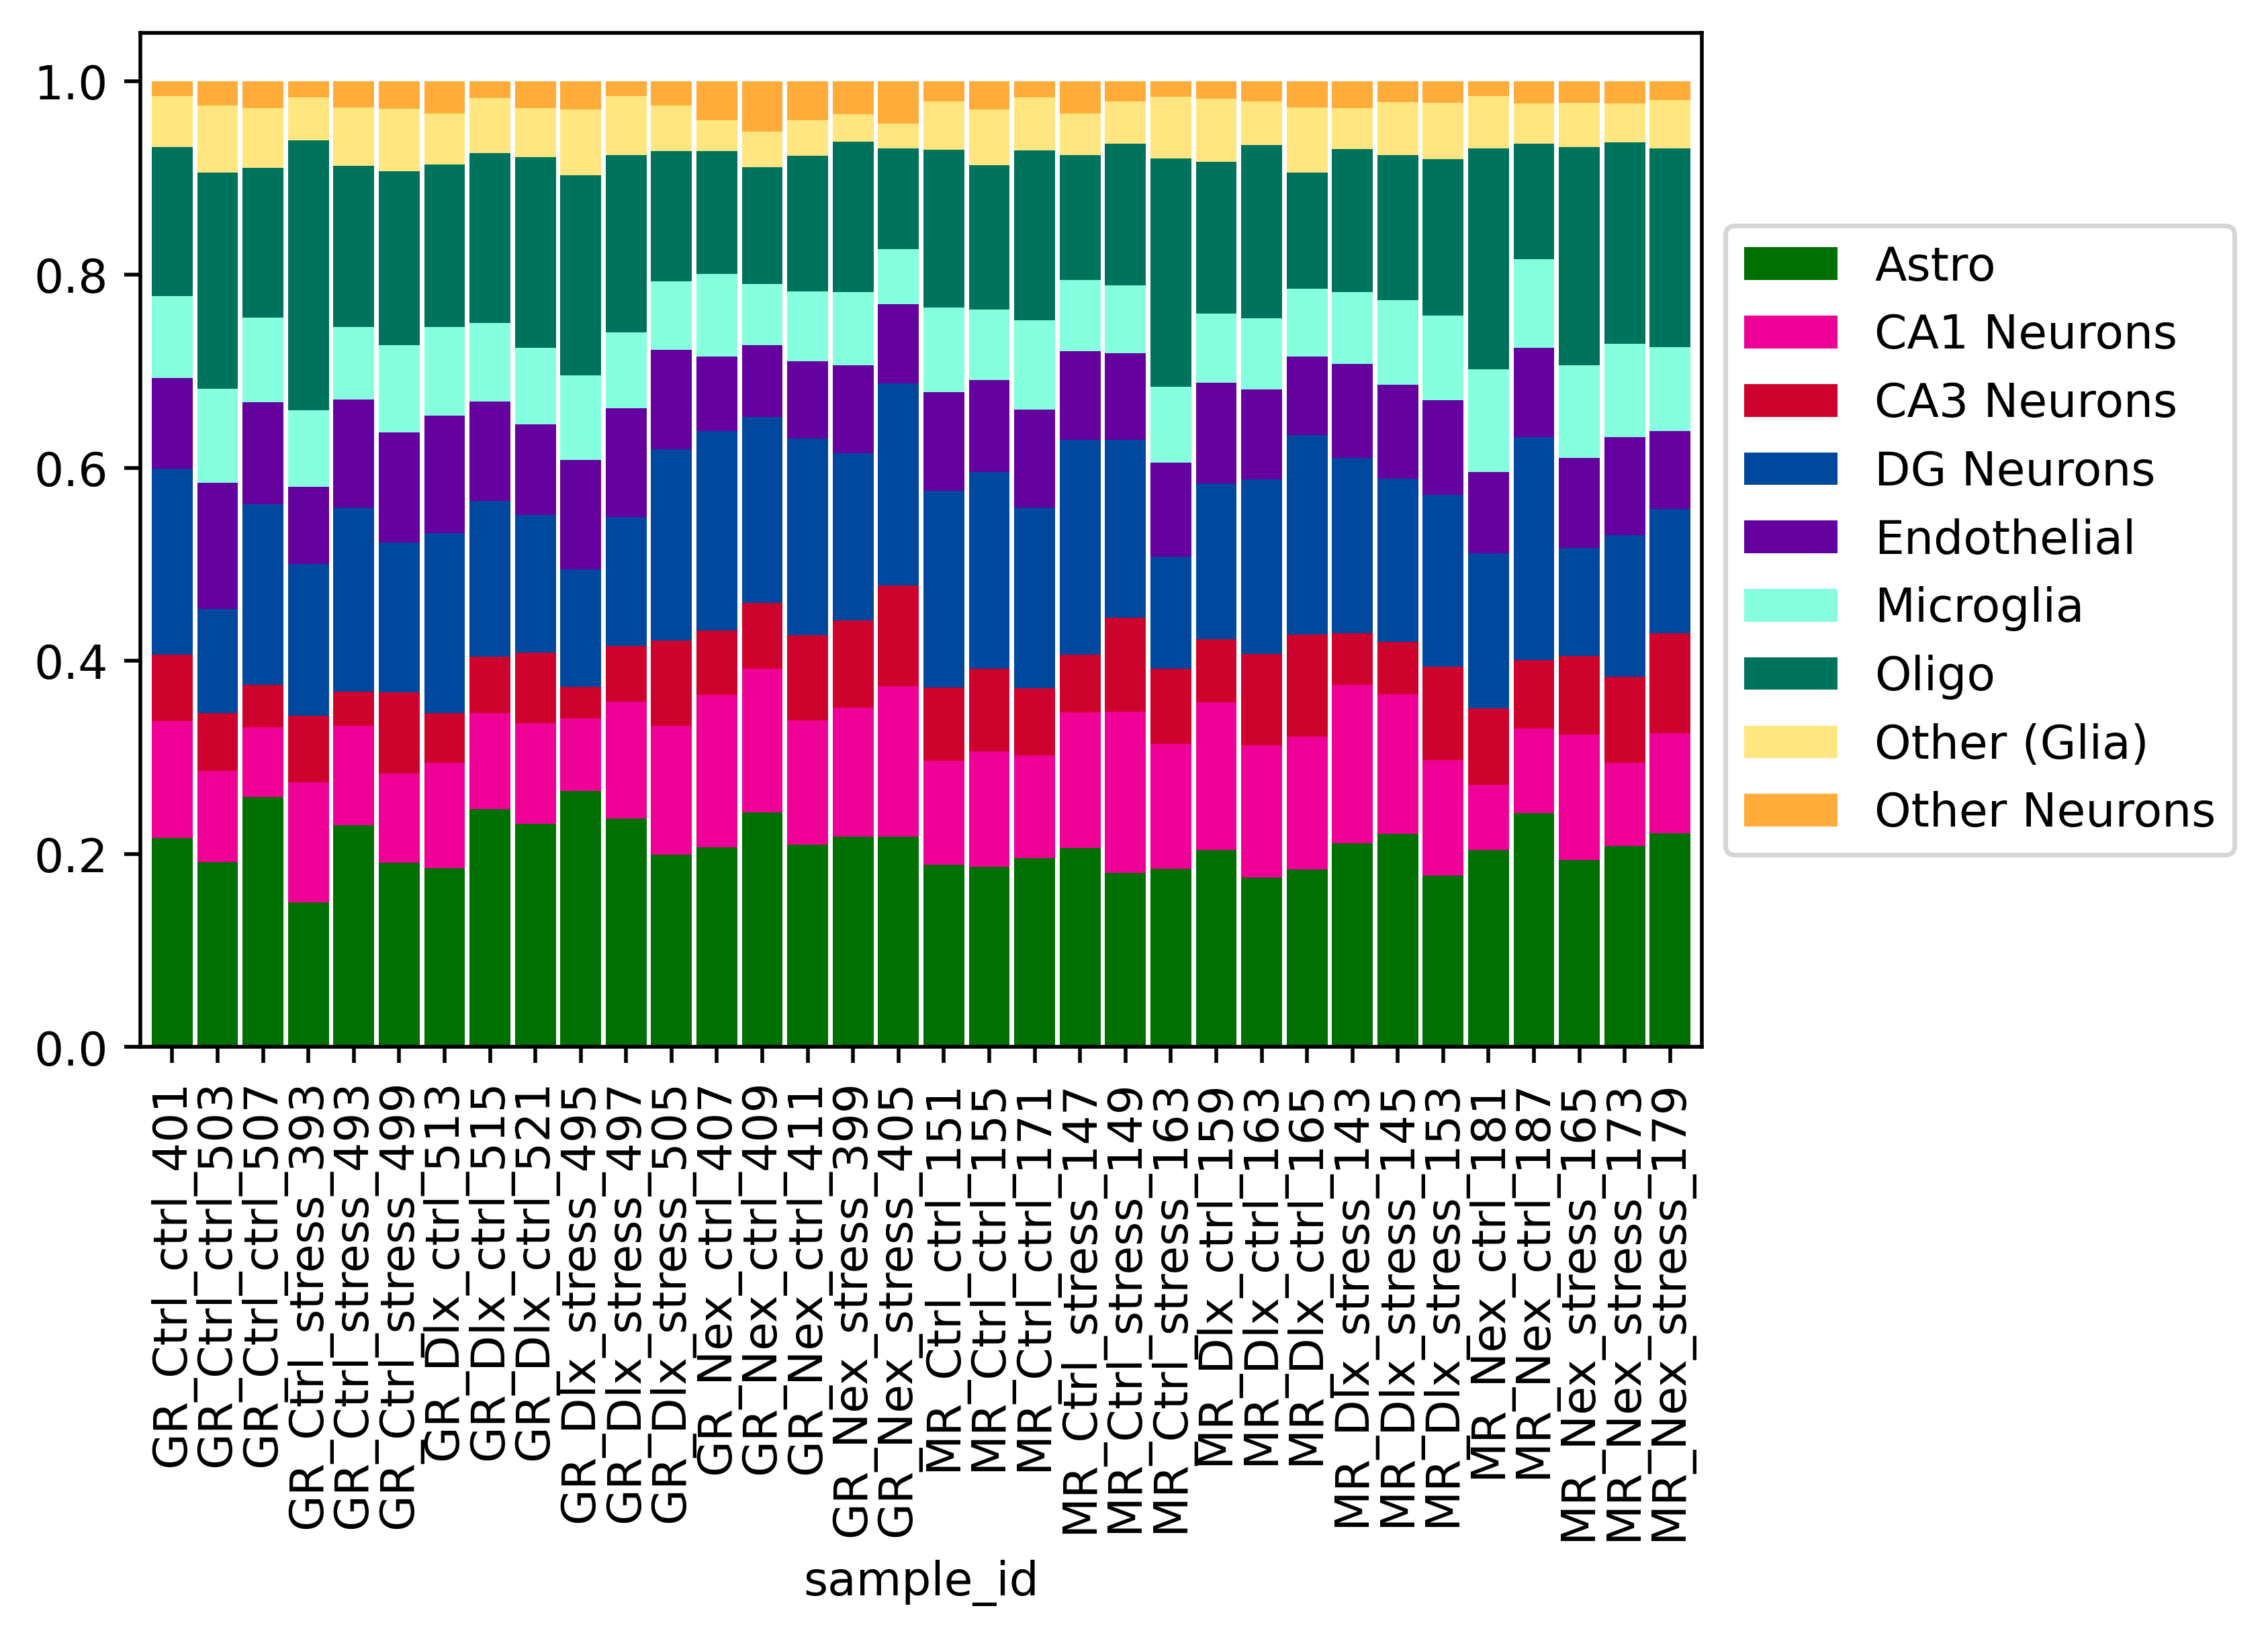

In [12]:
df = (
    adata#[adata.obs.knockout=='GR']
    .obs[['louvain_coarser', 'sample_id']]
    .groupby('sample_id')['louvain_coarser']
    .value_counts()
    .unstack('louvain_coarser')
)
df = pd.DataFrame(df)
df = df.div(df.sum(axis=1), axis=0)

fig, ax = plt.subplots(1, 1)
df.plot(kind='bar', 
        stacked=True, 
        ax=ax, 
        color=cmap,
        width=0.9).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
l = ax.get_legend()

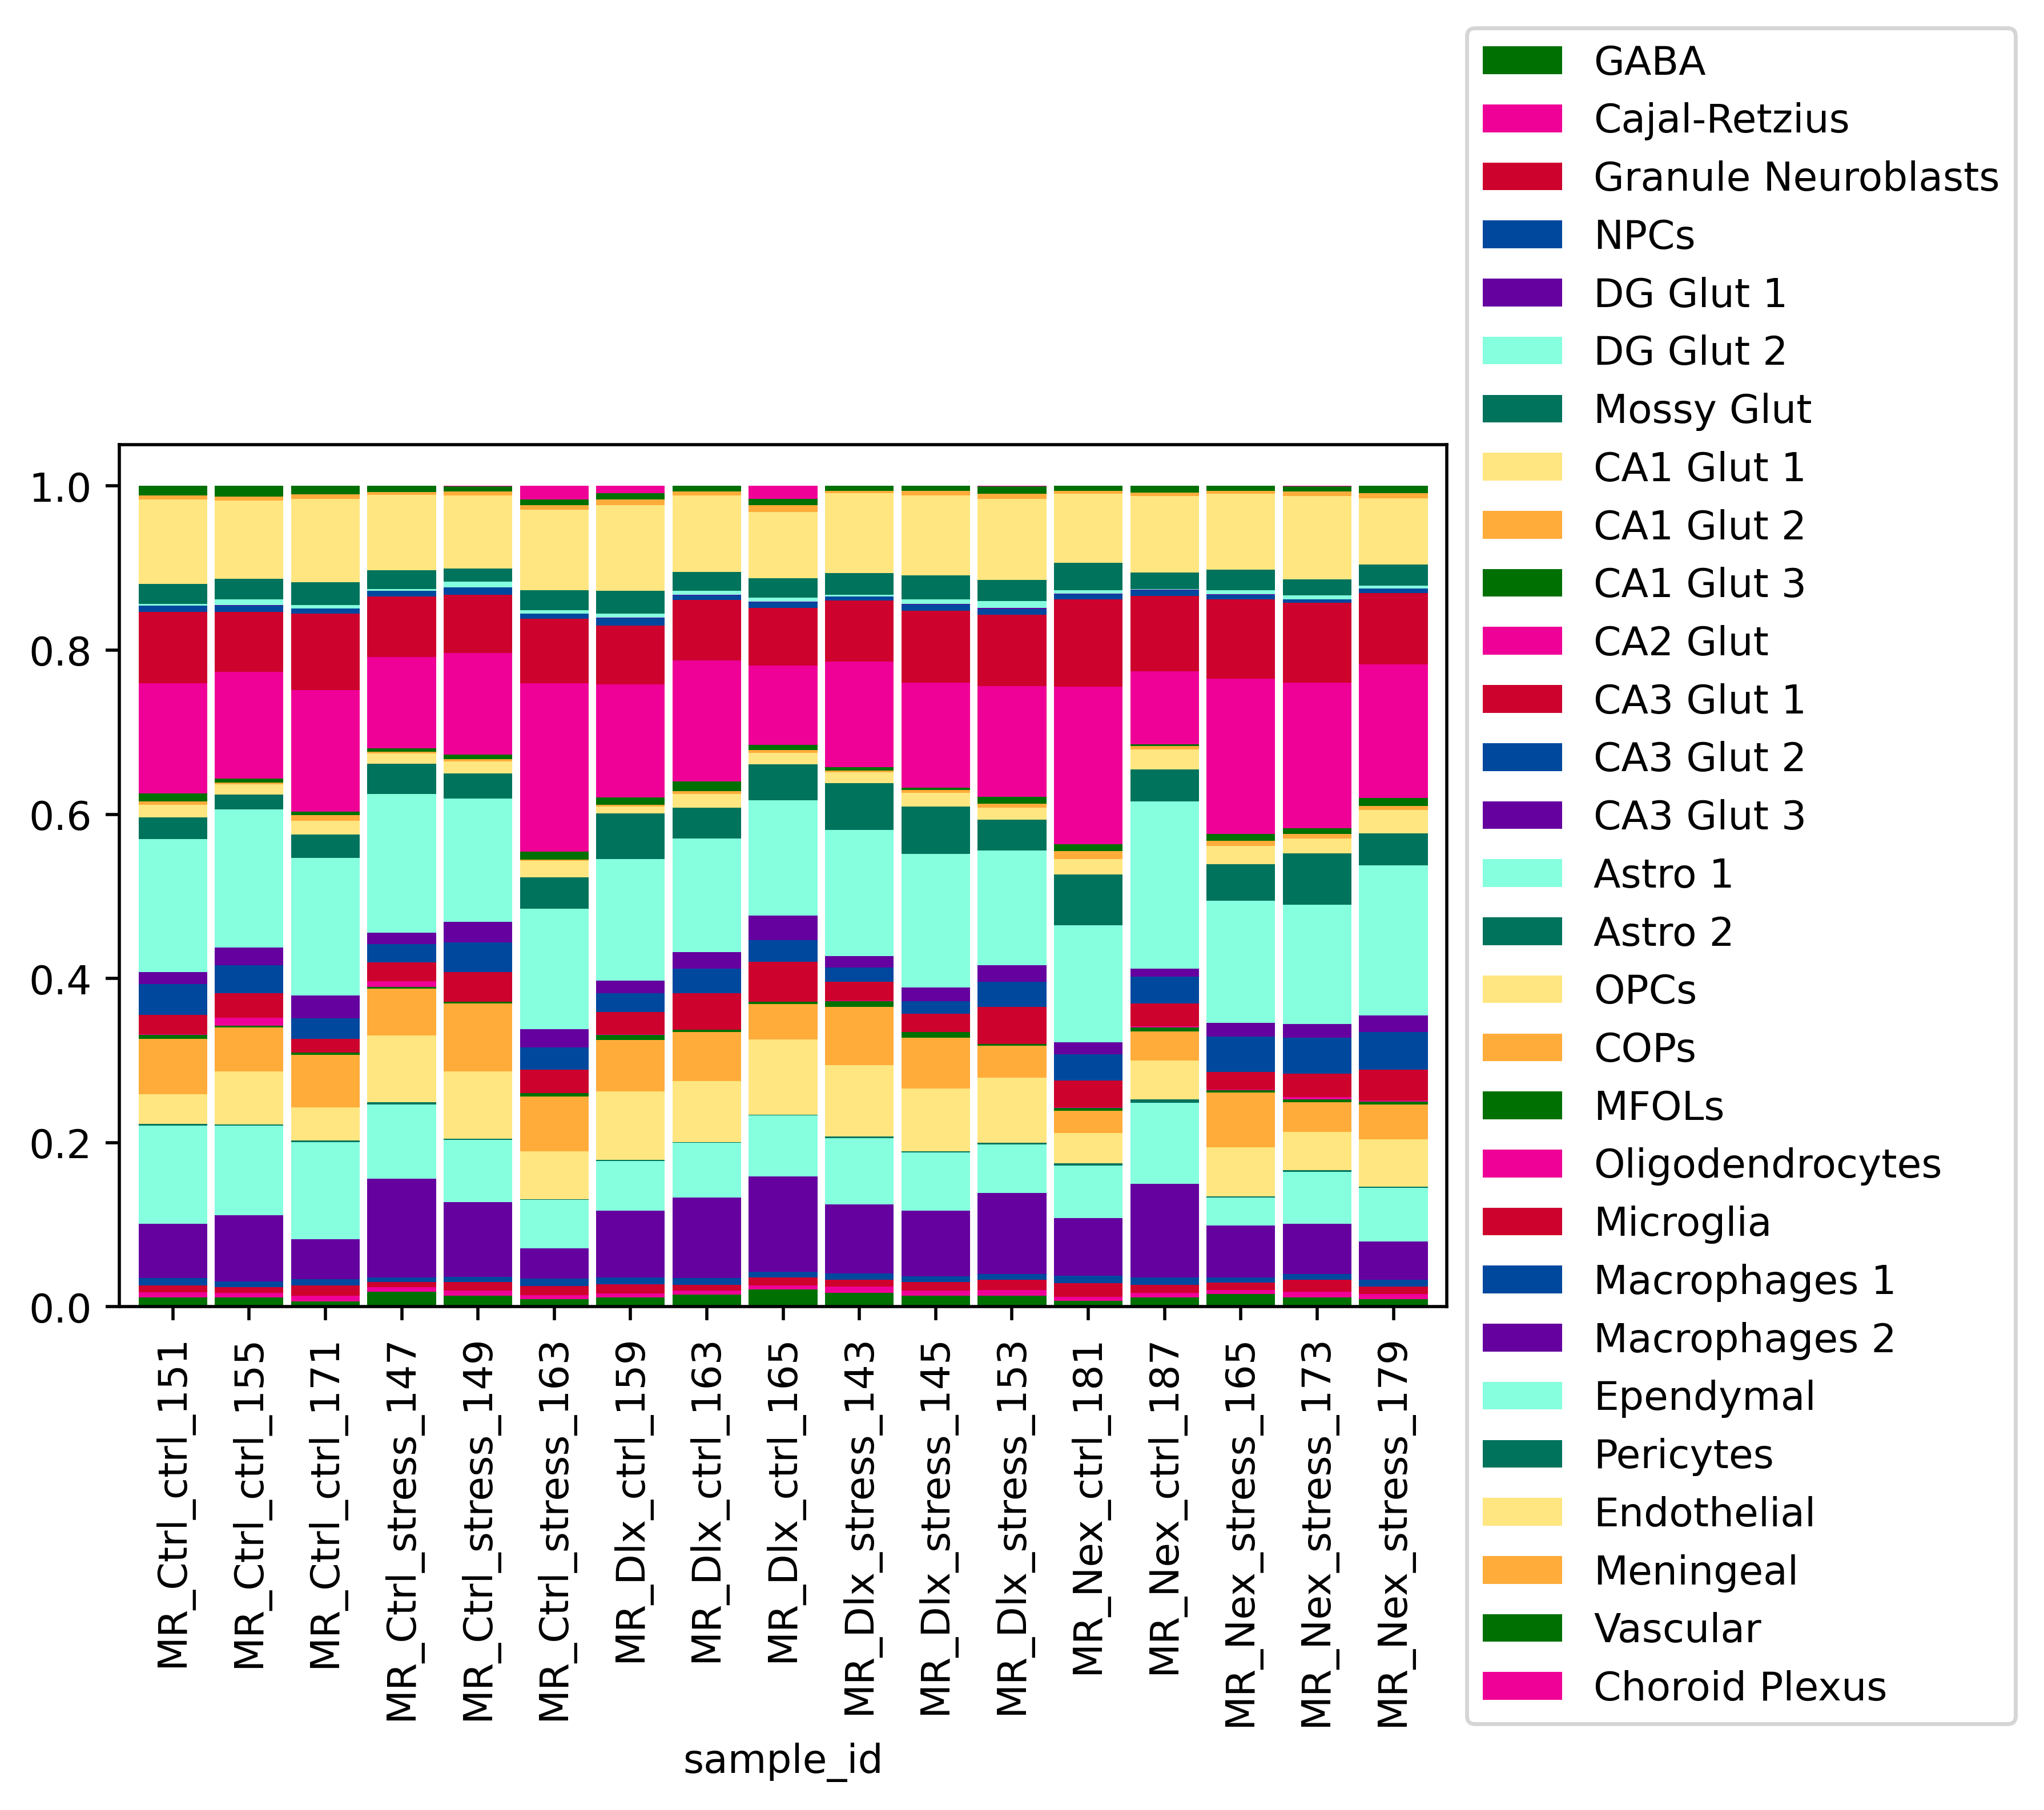

In [13]:
df = (
    adata[adata.obs.knockout=='MR']
    .obs[['louvain_coarse', 'sample_id']]
    .groupby('sample_id')['louvain_coarse']
    .value_counts()
    .unstack('louvain_coarse')
)
df = pd.DataFrame(df)
df = df.div(df.sum(axis=1), axis=0)

fig, ax = plt.subplots(1, 1)
df.plot(kind='bar', 
        stacked=True, 
        ax=ax, 
        color=cmap,
        width=0.9).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
l = ax.get_legend()

Text(0.5, 1.0, 'GR')

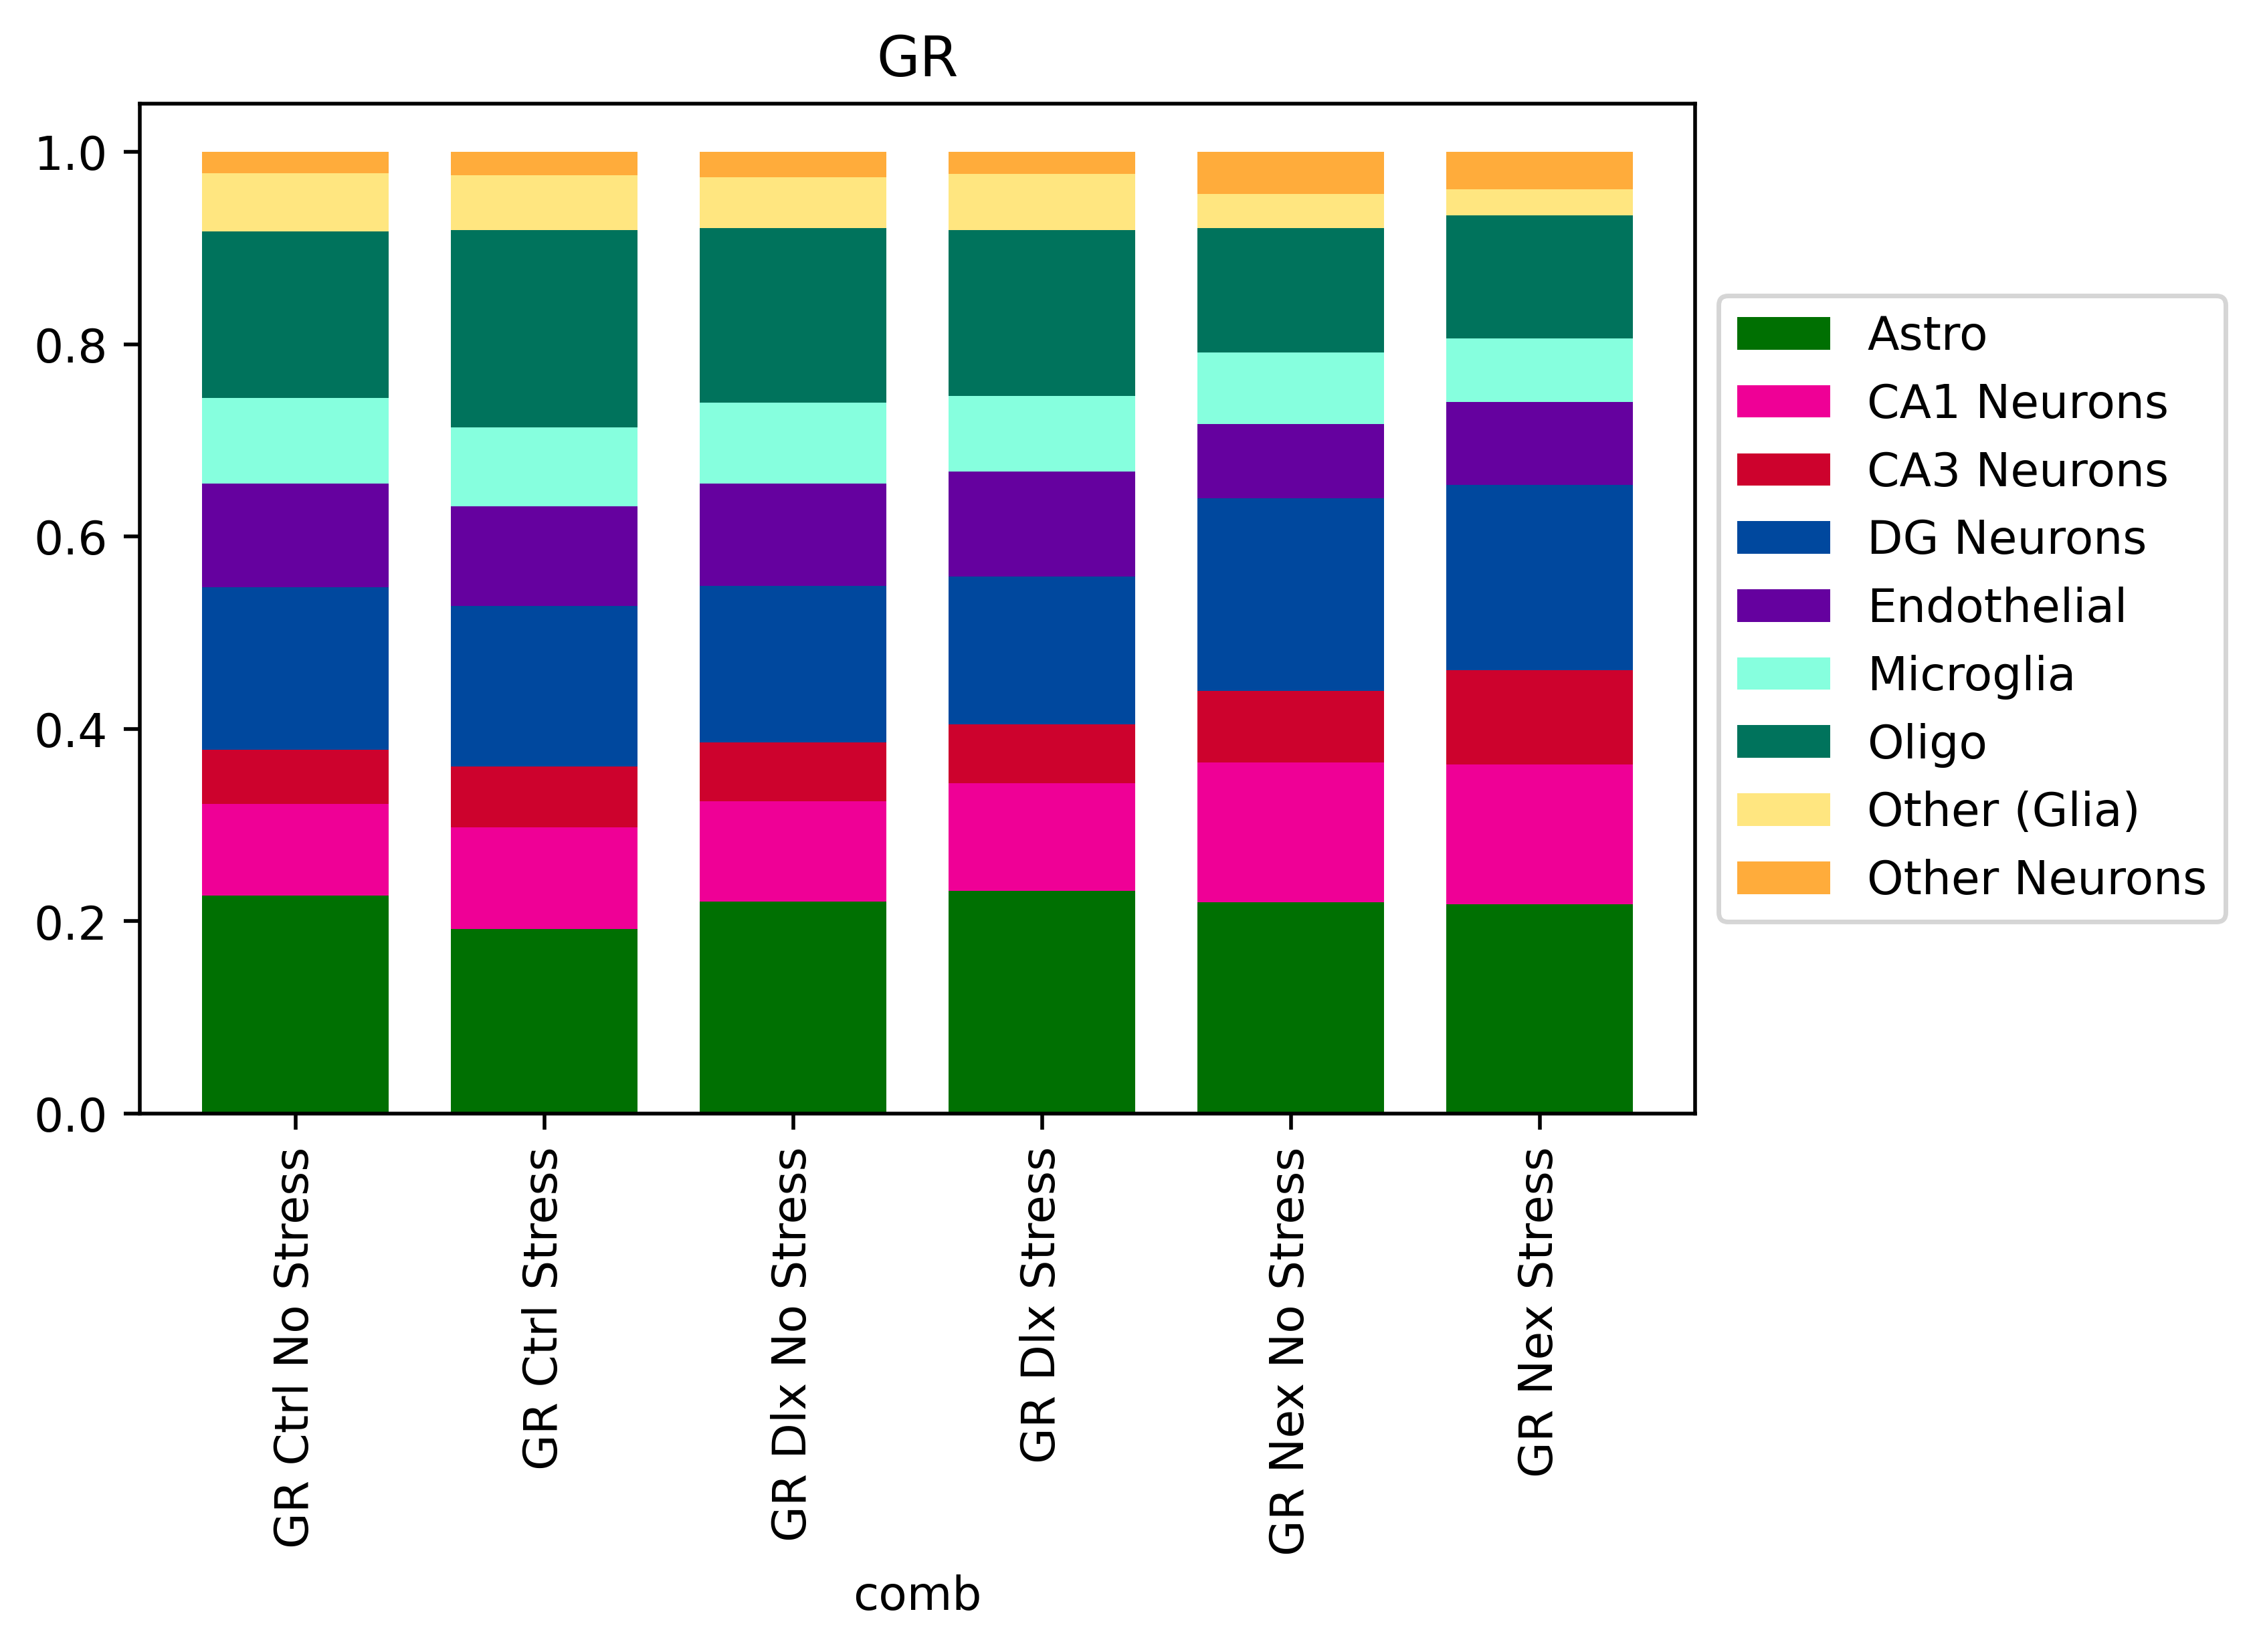

In [14]:
df = (
    adata[adata.obs.knockout=='GR']
    .obs[['louvain_coarser', 'comb']]
    .groupby('comb')['louvain_coarser']
    .value_counts()
    .unstack('louvain_coarser')
)
df = pd.DataFrame(df)
df = df.div(df.sum(axis=1), axis=0)

fig, ax = plt.subplots(1, 1)
df.plot(kind='bar', 
        stacked=True, 
        ax=ax, 
        color=adata.uns['louvain_coarser_colors'],
        width=0.75).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
l = ax.get_legend()
ax.set_title('GR')

Text(0.5, 1.0, 'MR')

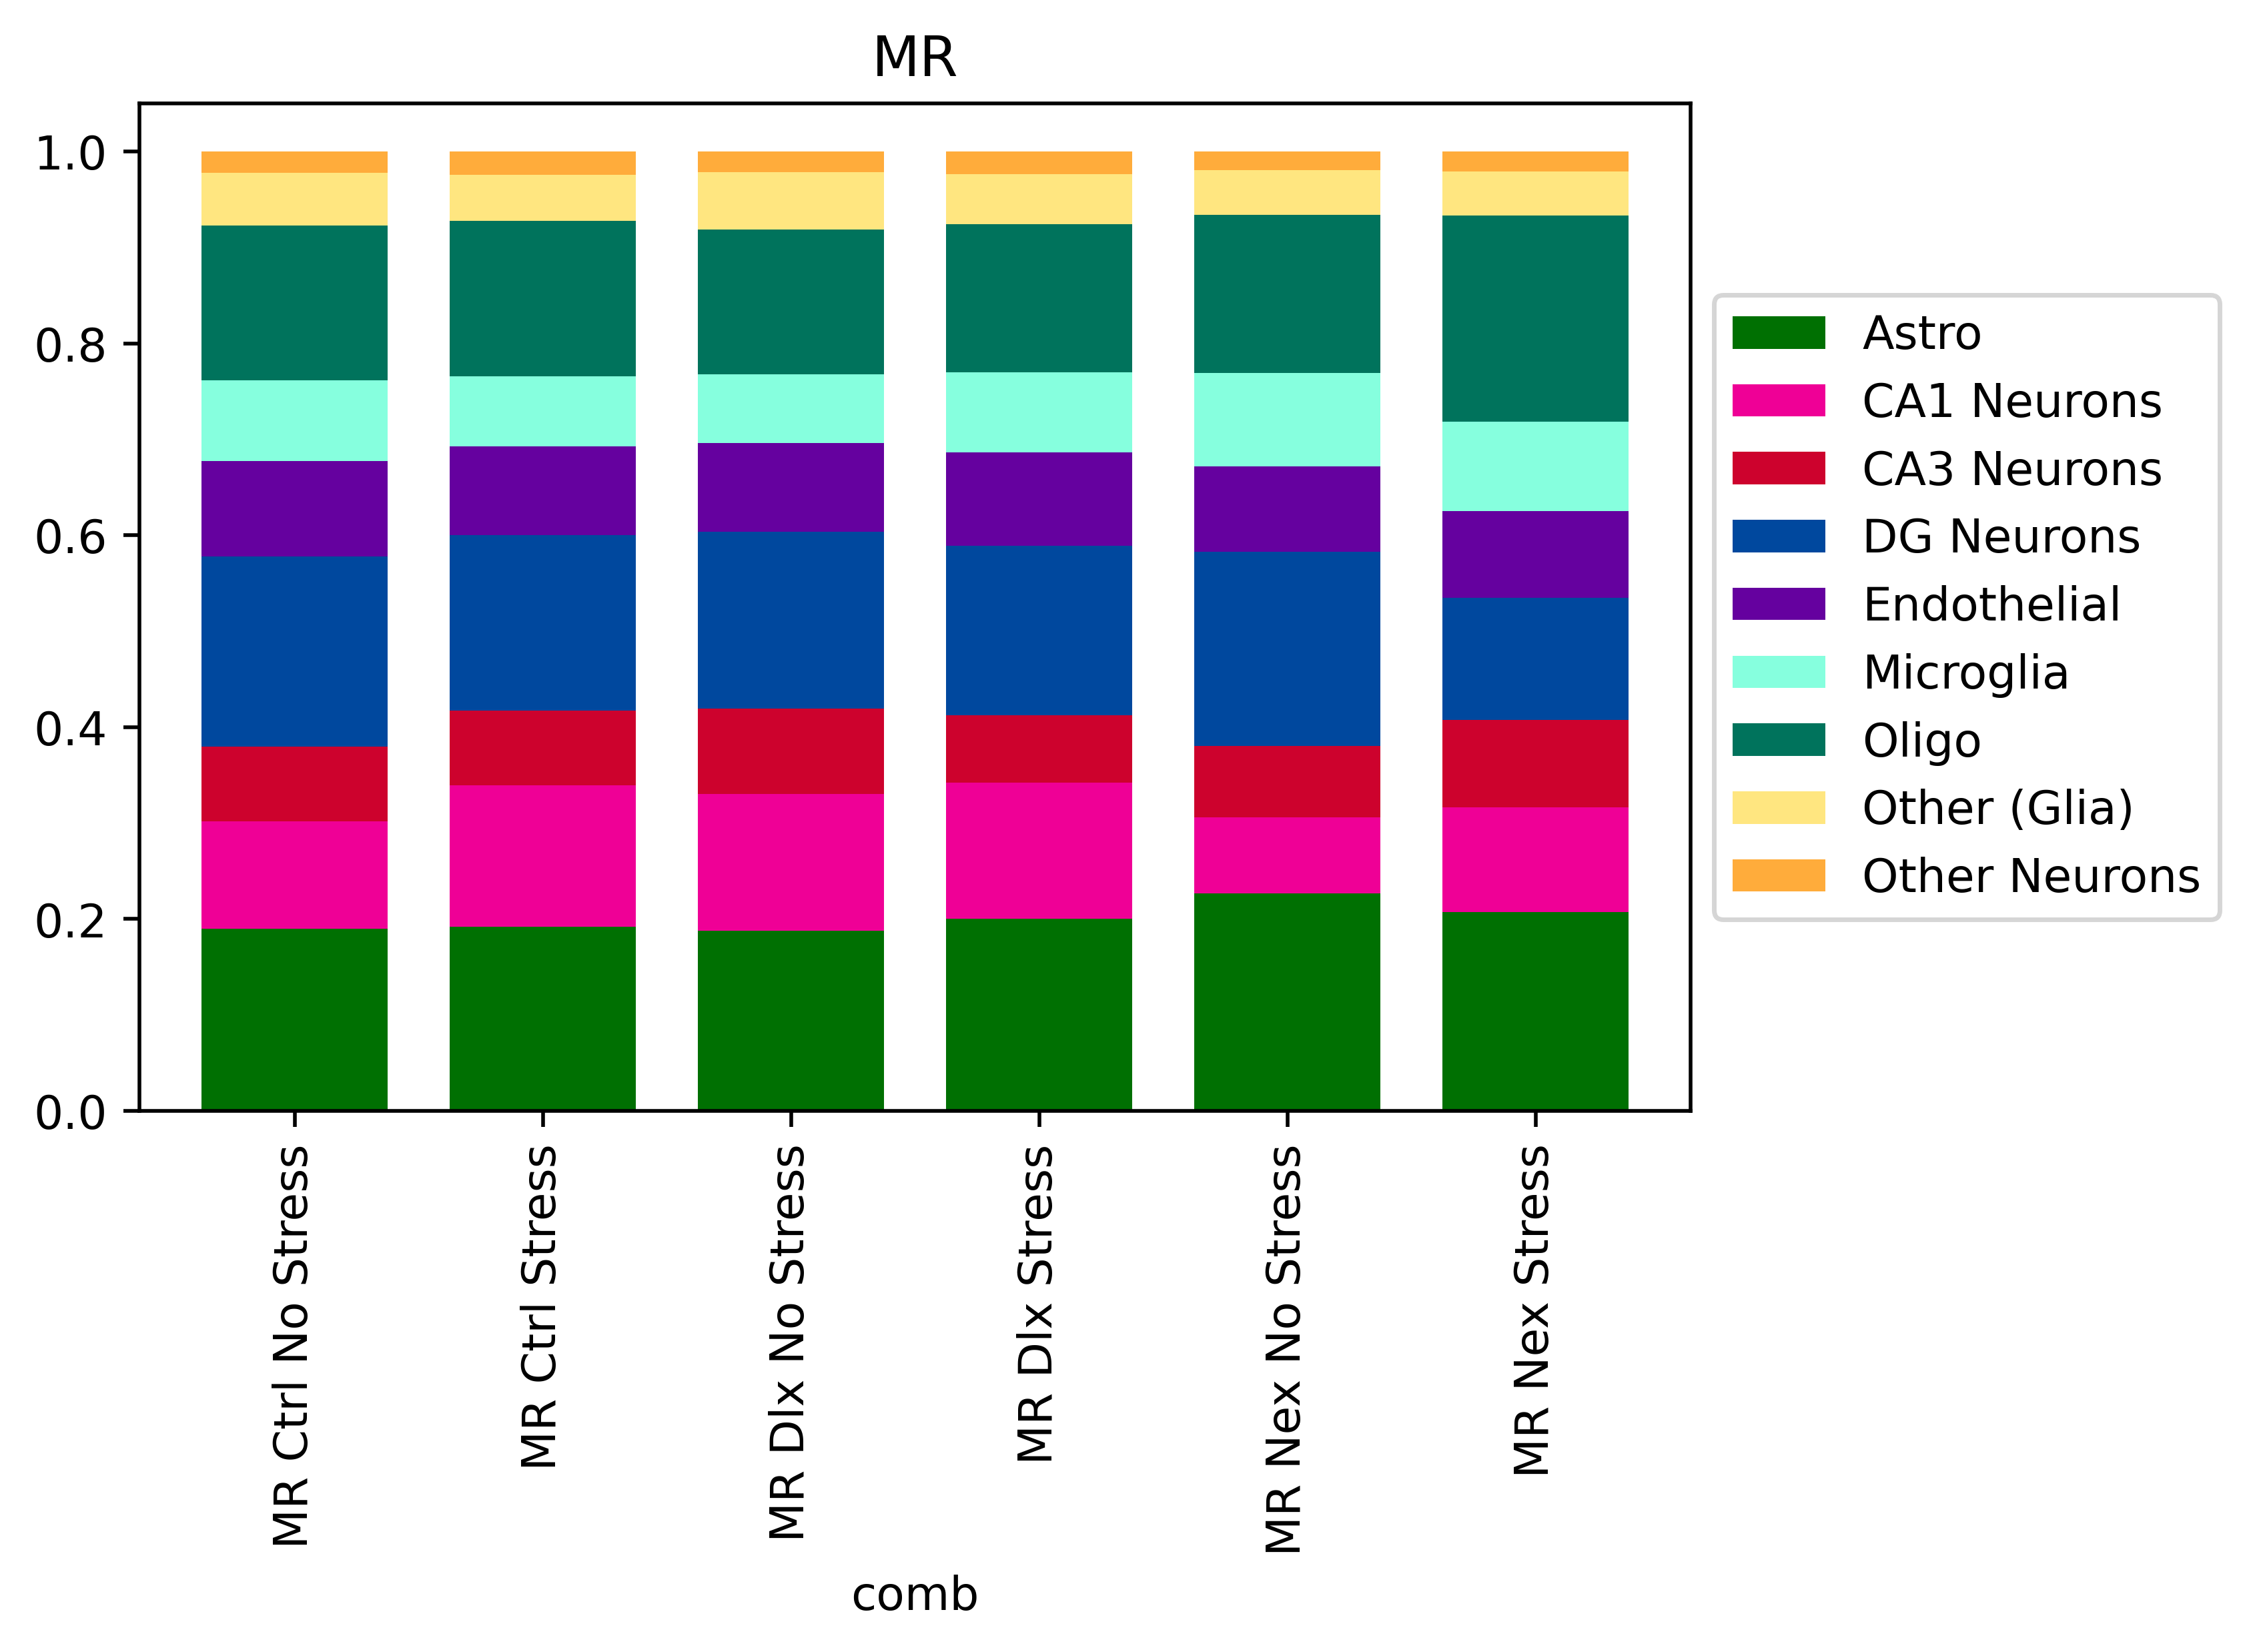

In [15]:
df = (
    adata[adata.obs.knockout=='MR']
    .obs[['louvain_coarser', 'comb']]
    .groupby('comb')['louvain_coarser']
    .value_counts()
    .unstack('louvain_coarser')
)
df = pd.DataFrame(df)
df = df.div(df.sum(axis=1), axis=0)

fig, ax = plt.subplots(1, 1)
df.plot(kind='bar', 
        stacked=True, 
        ax=ax, 
        color=adata.uns['louvain_coarser_colors'],
        width=0.75).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
l = ax.get_legend()
ax.set_title('MR')

In [16]:
df = adata.obs[['louvain_coarse', 'comb']].groupby('comb')['louvain_coarse'].value_counts().unstack('louvain_coarse')

In [17]:
df = pd.DataFrame(df)
df = df.div(df.sum(axis=1), axis=0)

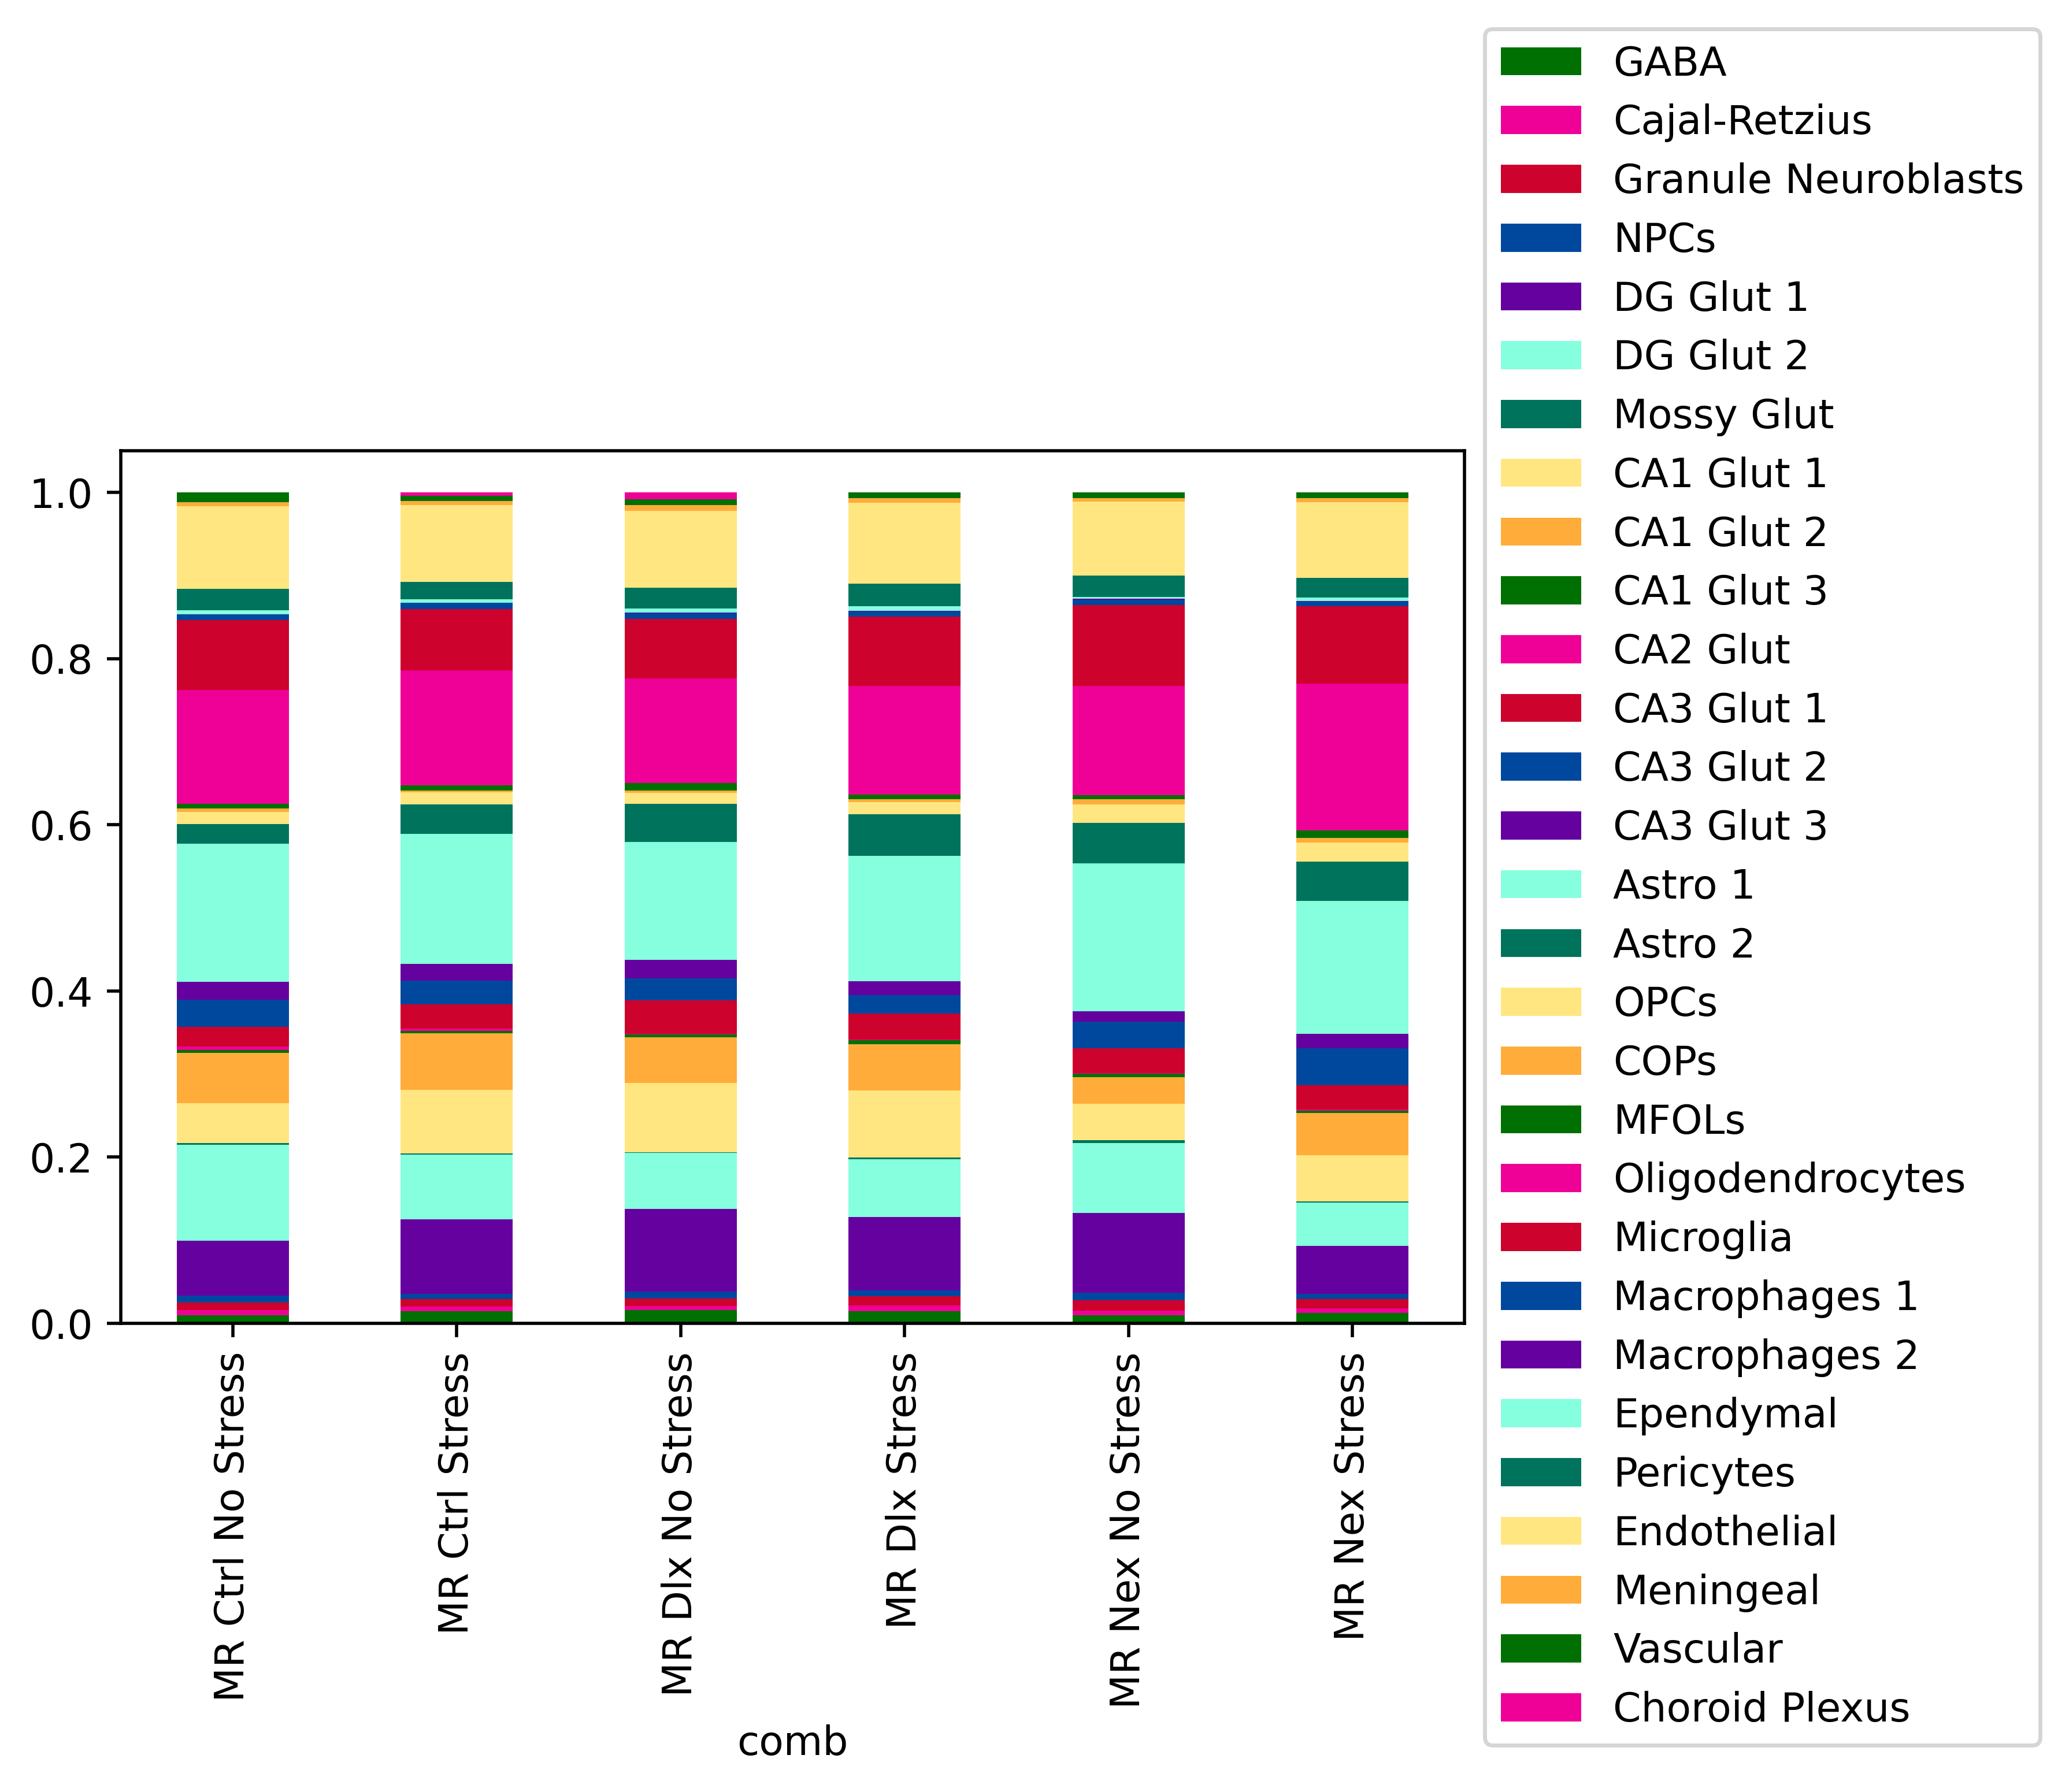

In [18]:
fig, ax = plt.subplots(1, 1)
df = df[df.index.str.contains("MR")]
df.plot(kind='bar', stacked=True, ax=ax, color=cmap).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
l = ax.get_legend()

# DE GR

In [15]:
de_genes = pd.read_pickle('./../../results/DE/de_stress_new/pickle/genes.pickle')
de_genes_sign = de_genes[de_genes['qval']<0.05]
de_genes_sign_mean = de_genes_sign[(de_genes_sign['mean_pert']>0.1) | (de_genes_sign['mean_ctrl']>0.1)]
de_genes_sign_mean = de_genes_sign_mean[np.abs(de_genes_sign_mean['log2fc'])>0.1]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


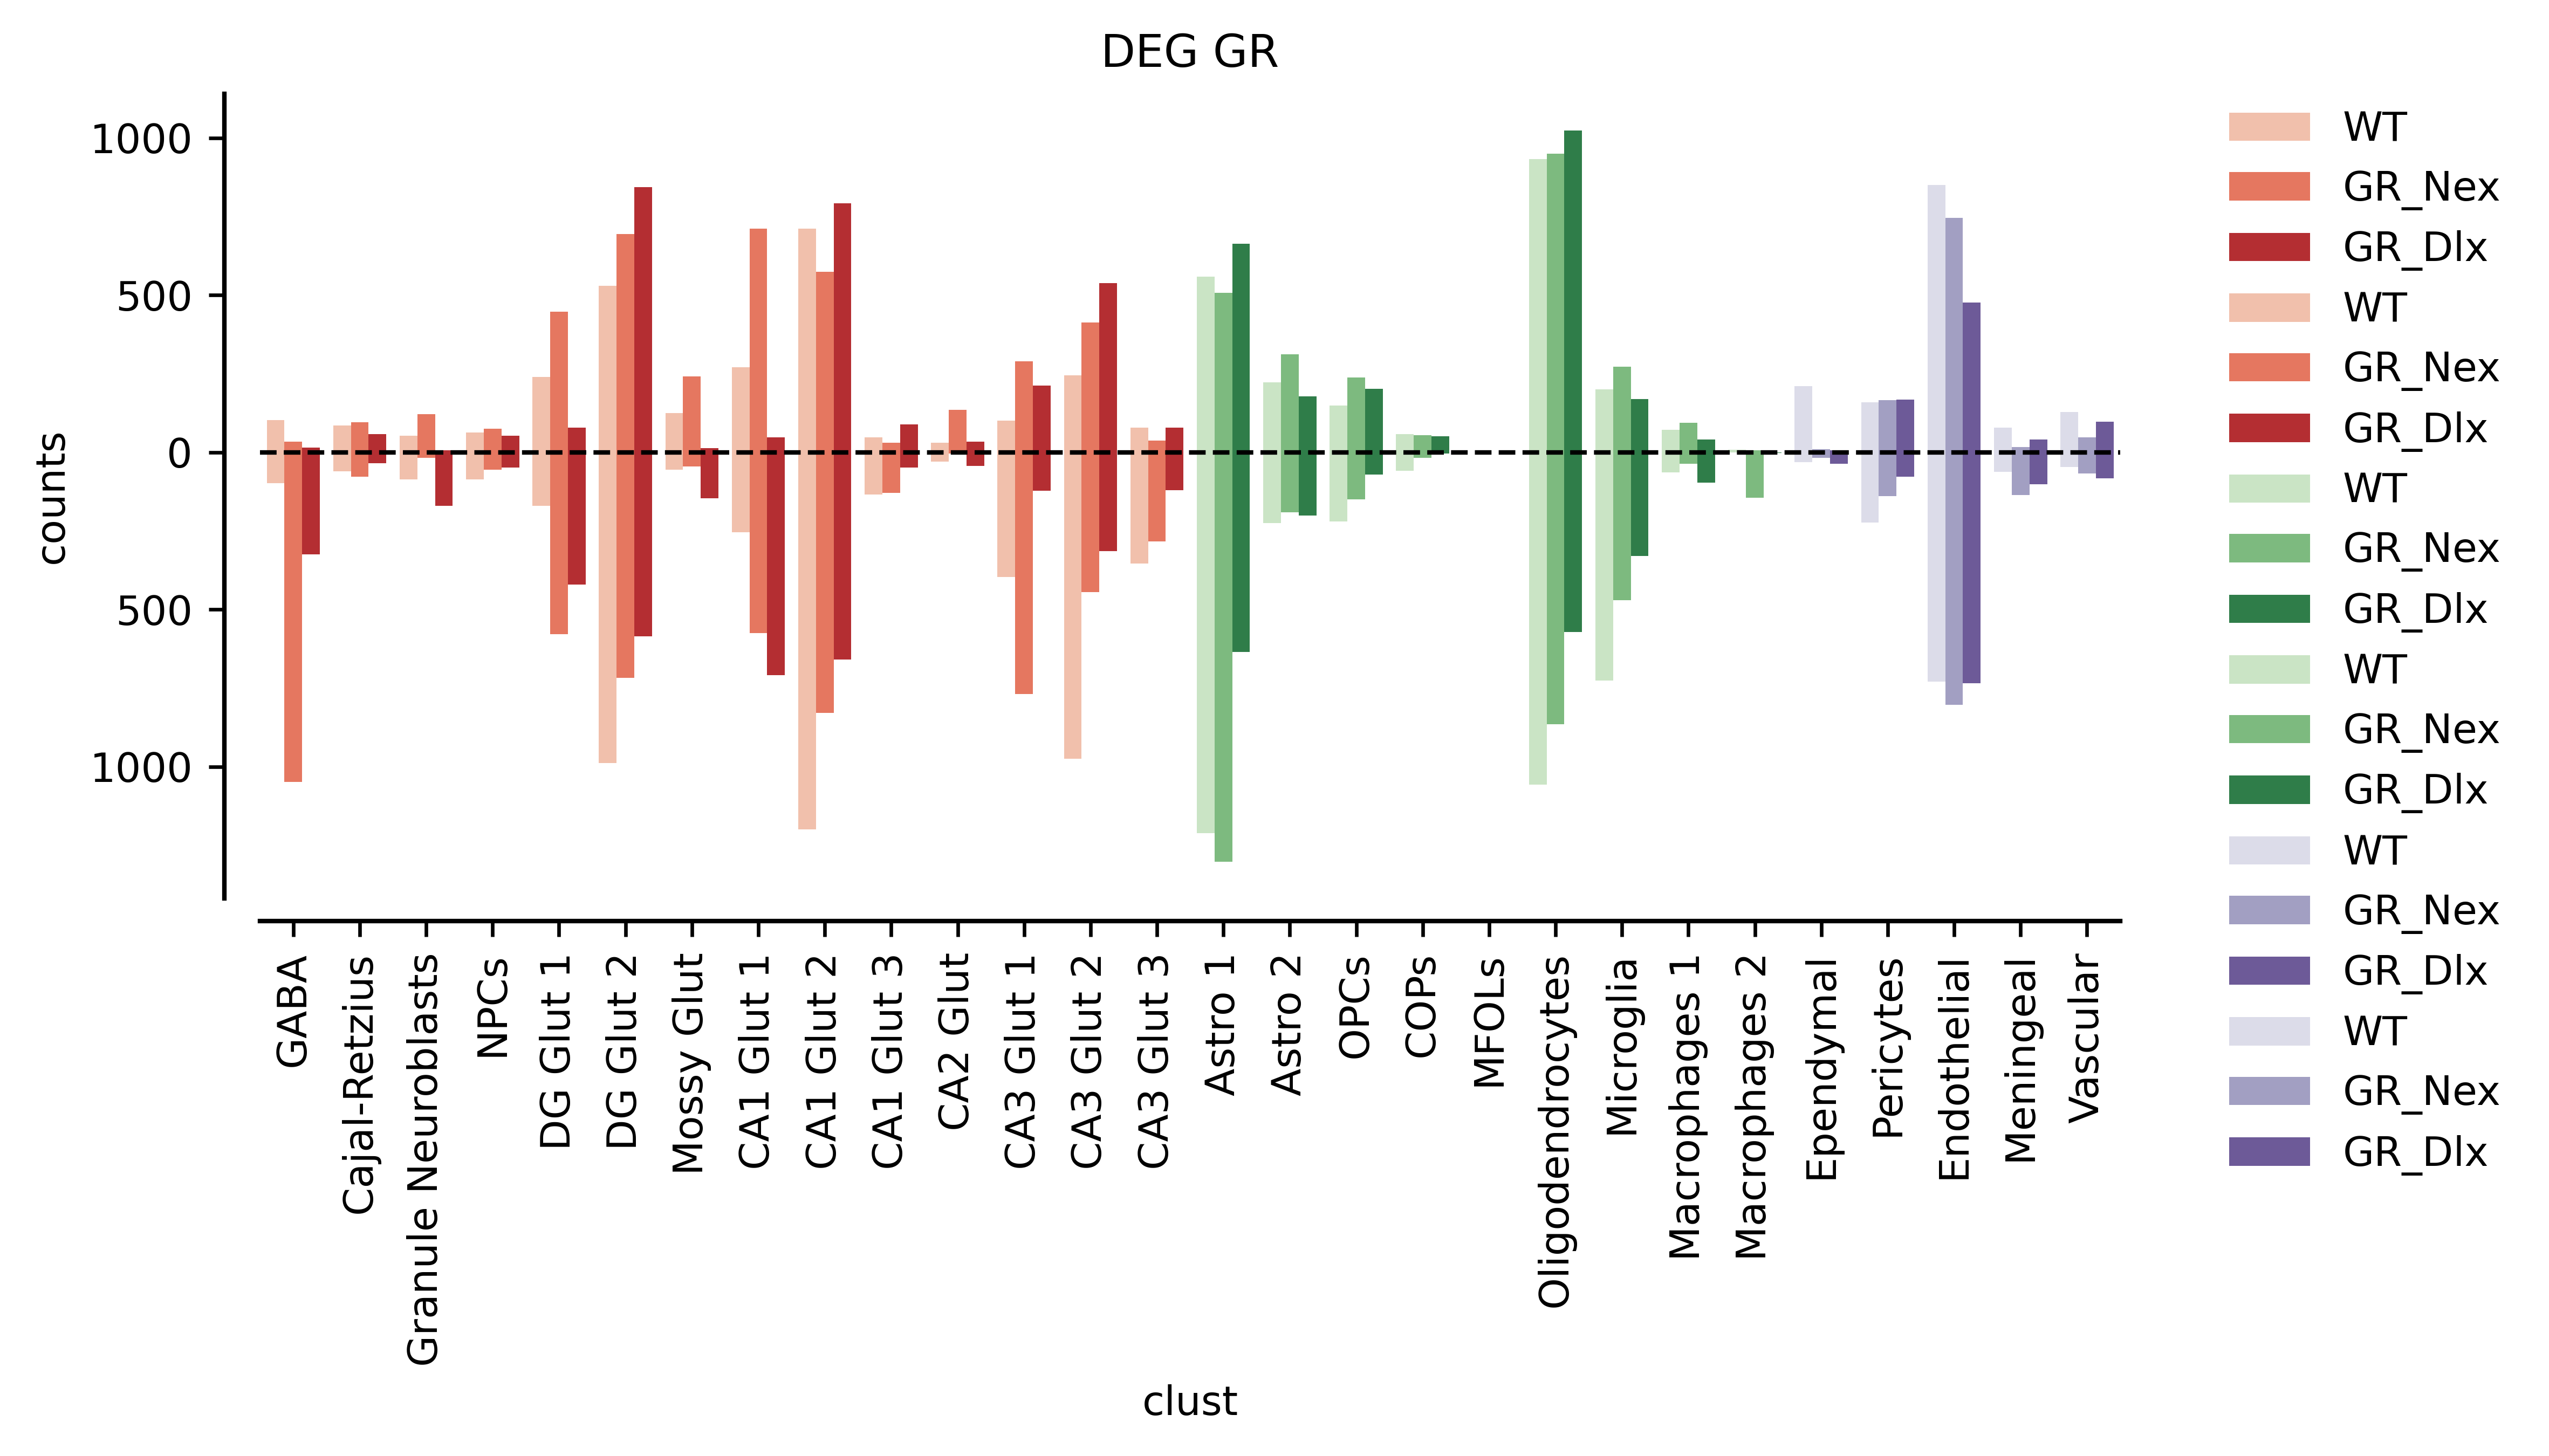

In [16]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(8, 5),
    sharey=True
)
df_up = de_genes_sign_mean[de_genes_sign_mean['log2fc'] > 0]
df_down = de_genes_sign_mean[de_genes_sign_mean['log2fc'] < 0]

deg_up = (
    df_up
    .groupby('clust')
    ['test']
    .value_counts()
)
deg_up = pd.DataFrame(deg_up)
deg_up.columns = ['counts']
deg_up.reset_index(inplace=True)
deg_up['clust'] = deg_up['clust'].astype('category')
cats = adata.obs['louvain_coarse'].cat.categories[adata.obs['louvain_coarse'].cat.categories.isin(deg_up['clust'].cat.categories)]
deg_up['clust'] = deg_up['clust'].cat.reorder_categories(cats)
deg_up = deg_up[deg_up['test'].isin(['WT', 'GR_Nex', 'GR_Dlx'])]
deg_up['test'] = deg_up['test'].astype('category')
deg_up['test'] = deg_up['test'].cat.reorder_categories(['WT', 'GR_Nex', 'GR_Dlx'])

deg_down = (
    df_down
    .groupby('clust')
    ['test']
    .value_counts()
)
deg_down = pd.DataFrame(deg_down)
deg_down.columns = ['counts']
deg_down.reset_index(inplace=True)
deg_down['clust'] = deg_down['clust'].astype('category')
cats = adata.obs['louvain_coarse'].cat.categories[adata.obs['louvain_coarse'].cat.categories.isin(deg_down['clust'].cat.categories)]
deg_down['clust'] = deg_down['clust'].cat.reorder_categories(cats)
deg_down = deg_down[deg_down['test'].isin(['WT', 'GR_Nex', 'GR_Dlx'])]
deg_down['test'] = deg_down['test'].astype('category')
deg_down['test'] = deg_down['test'].cat.reorder_categories(['WT', 'GR_Nex', 'GR_Dlx'])

d = deg_down[deg_down['clust'].str.contains('GABA|Cajal|Glut|NPC|Neuro', regex=True)]
d_up = deg_up[deg_up['clust'].str.contains('GABA|Cajal|Glut|NPC|Neuro', regex=True)]
sns.barplot(x='clust', y='counts', hue='test', palette='Reds', data=d_up, ax=ax)
sns.barplot(x='clust', y=-d['counts'],  hue='test', palette='Reds', data=d, ax=ax)

d = deg_down[deg_down['clust'].str.contains('Astro|OPCs|COPs|Oligo|Macro|Micro', regex=True)]
d_up = deg_up[deg_up['clust'].str.contains('Astro|OPCs|COPs|Oligo|Macro|Micro', regex=True)]
sns.barplot(x='clust', y='counts', hue='test', palette='Greens', data=d_up, ax=ax)
sns.barplot(x='clust', y=-d['counts'],  hue='test', palette='Greens', data=d, ax=ax)

d = deg_down[deg_down['clust'].str.contains('Ependymal|Endo|Peri|Meni|Vascu|Choro', regex=True)]
d_up = deg_up[deg_up['clust'].str.contains('Ependymal|Endo|Peri|Meni|Vascu|Choro', regex=True)]
sns.barplot(x='clust', y='counts', hue='test', palette='Purples', data=d_up, ax=ax)
sns.barplot(x='clust', y=-d['counts'],  hue='test', palette='Purples', data=d, ax=ax)

ax.set_title('DEG GR')
ax.set_yticklabels([str(int(abs(x))) for x in ax.get_yticks()])
ax.axhline(0, linestyle='--', linewidth=1, color='black')
labels = ax.get_xticklabels()
set_axis_style(ax)
ax.set_xticklabels(labels, rotation=90)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [25]:
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['figure.dpi'] = 600
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']
plt.rcParams['axes.facecolor'] = (1,1,1,0)

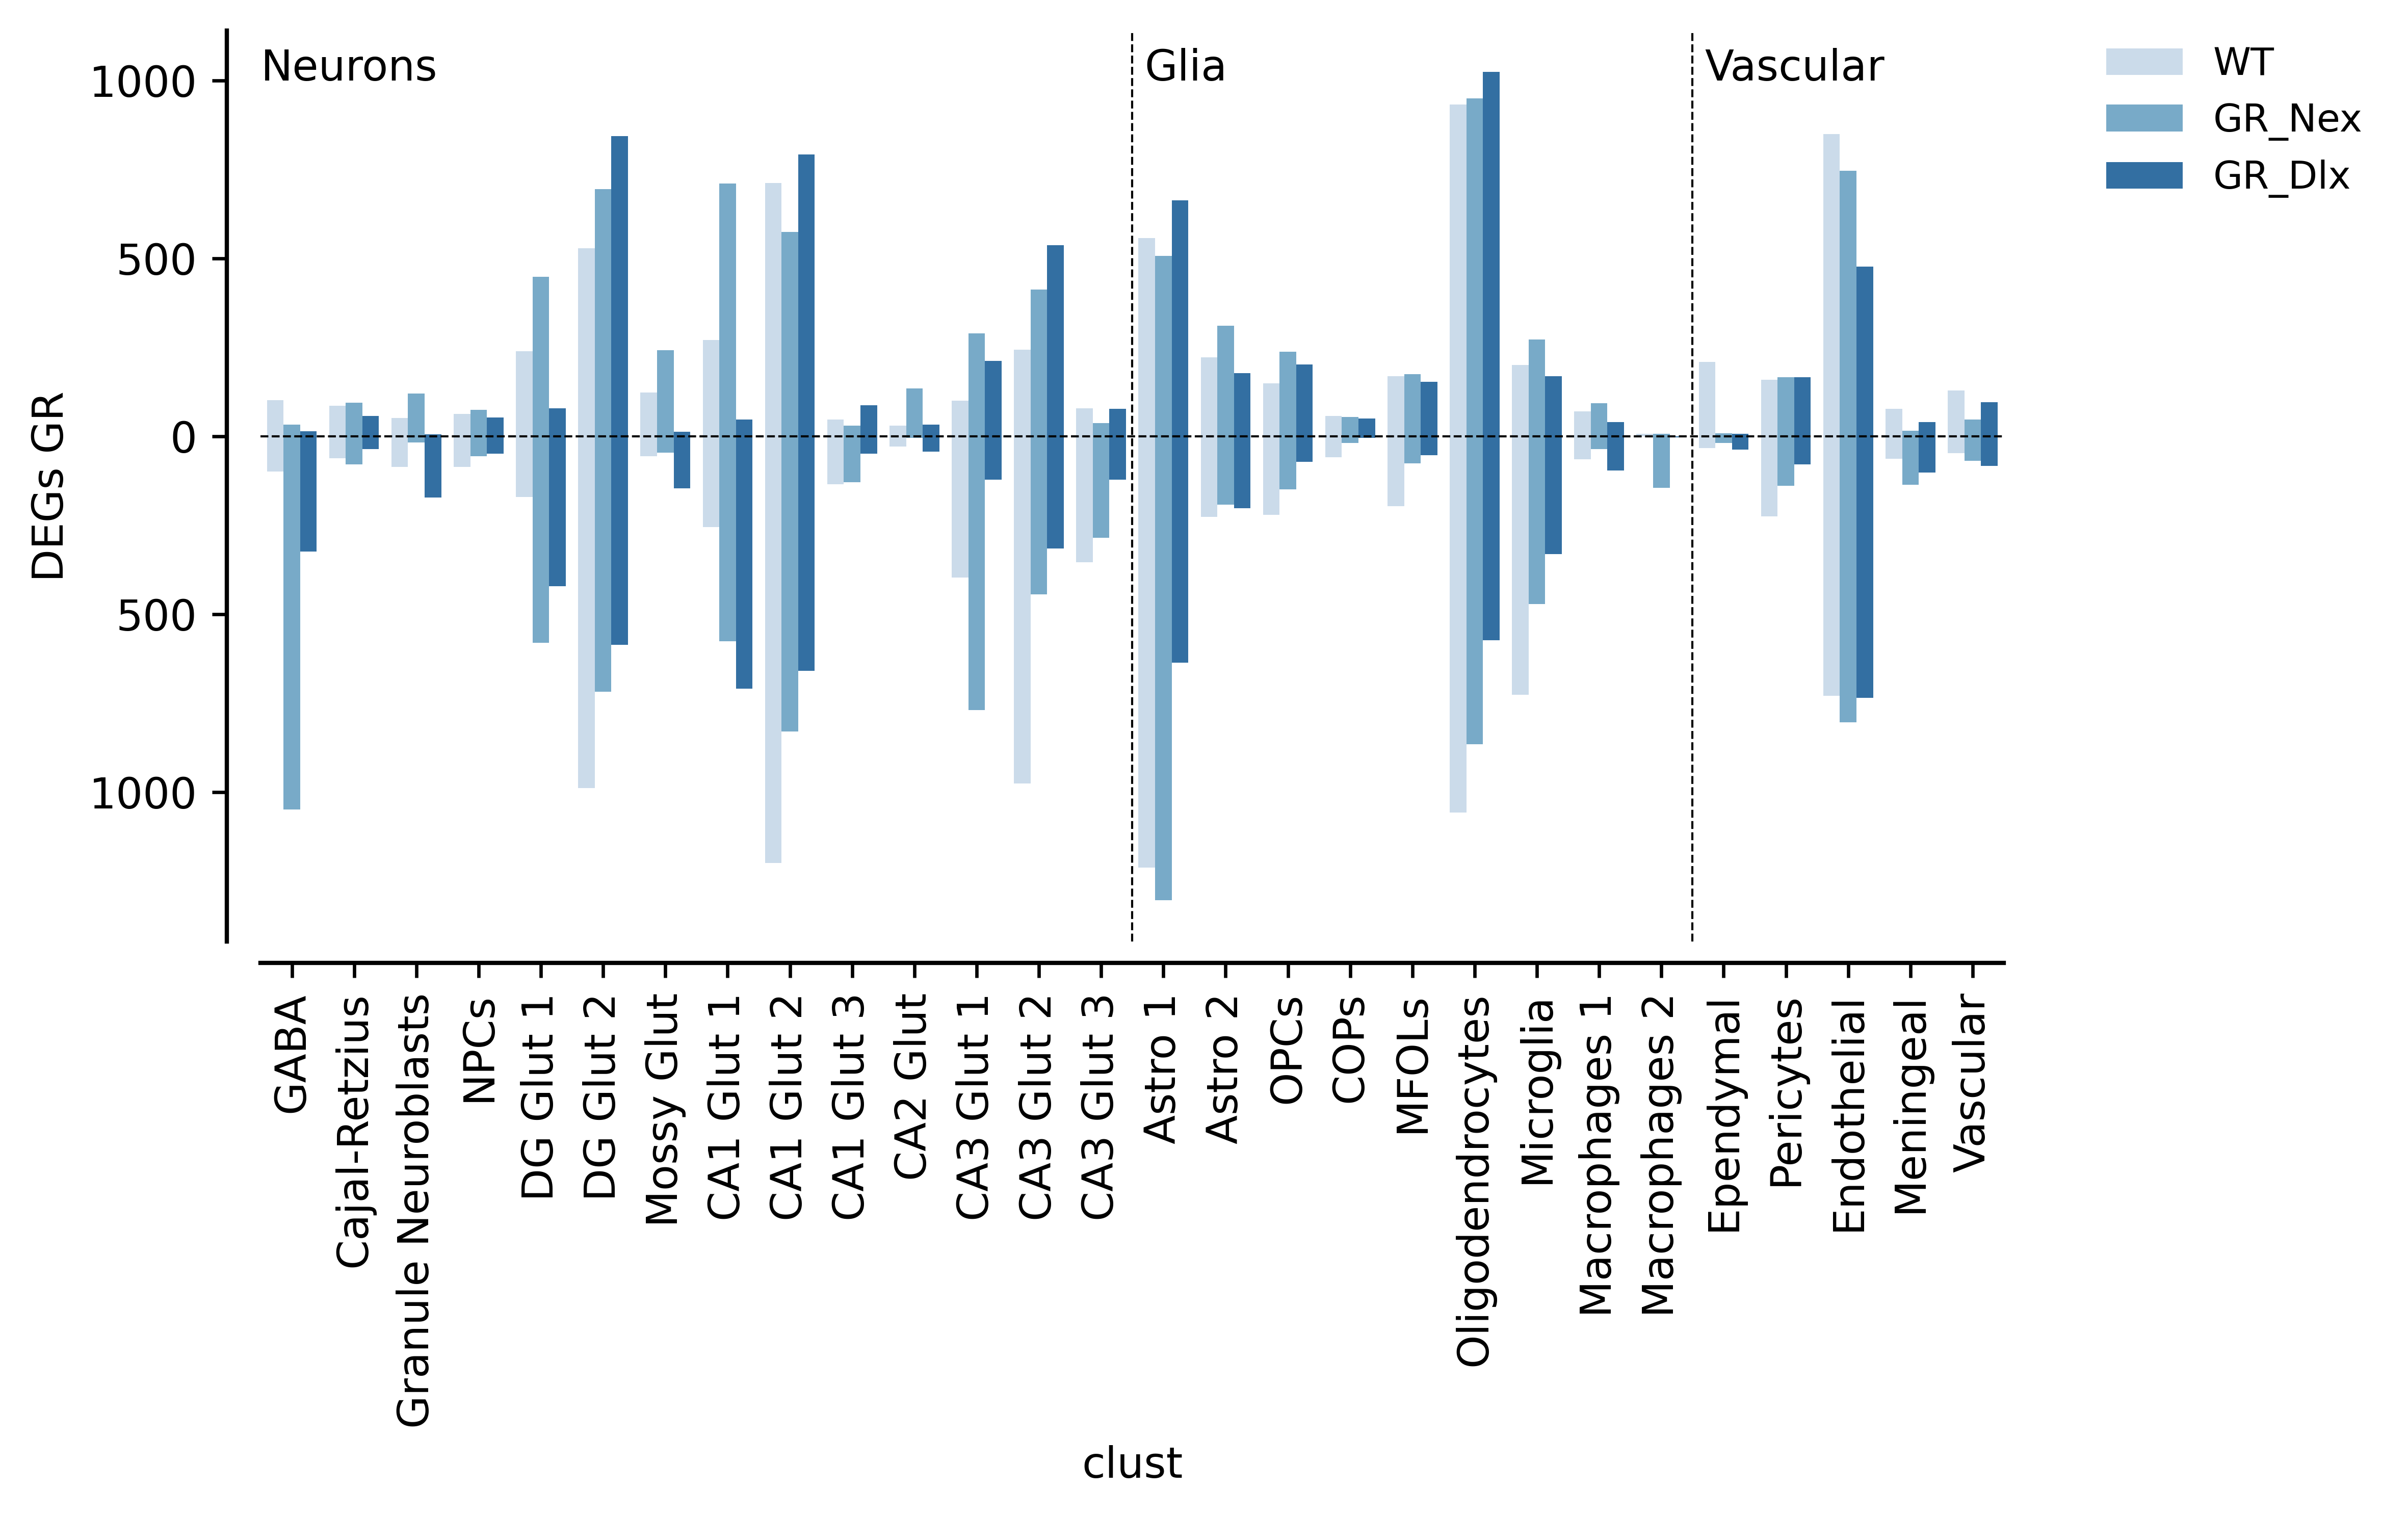

In [30]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(8, 5.5),
    sharey=True
)
df_up = de_genes_sign_mean[de_genes_sign_mean['log2fc'] > 0]
df_down = de_genes_sign_mean[de_genes_sign_mean['log2fc'] < 0]

deg_up = (
    df_up
    .groupby('clust')
    ['test']
    .value_counts()
)
deg_up = pd.DataFrame(deg_up)
deg_up.columns = ['counts']
deg_up.reset_index(inplace=True)
deg_up['clust'] = deg_up['clust'].astype('category')
cats = adata.obs['louvain_coarse'].cat.categories[adata.obs['louvain_coarse'].cat.categories.isin(deg_up['clust'].cat.categories)]
deg_up['clust'] = deg_up['clust'].cat.reorder_categories(cats)
deg_up = deg_up[deg_up['test'].isin(['WT', 'GR_Nex', 'GR_Dlx'])]
deg_up['test'] = deg_up['test'].astype('category')
deg_up['test'] = deg_up['test'].cat.reorder_categories(['WT', 'GR_Nex', 'GR_Dlx'])

deg_down = (
    df_down
    .groupby('clust')
    ['test']
    .value_counts()
)
deg_down = pd.DataFrame(deg_down)
deg_down.columns = ['counts']
deg_down.reset_index(inplace=True)
deg_down['clust'] = deg_down['clust'].astype('category')
cats = adata.obs['louvain_coarse'].cat.categories[adata.obs['louvain_coarse'].cat.categories.isin(deg_down['clust'].cat.categories)]
deg_down['clust'] = deg_down['clust'].cat.reorder_categories(cats)
deg_down = deg_down[deg_down['test'].isin(['WT', 'GR_Nex', 'GR_Dlx'])]
deg_down['test'] = deg_down['test'].astype('category')
deg_down['test'] = deg_down['test'].cat.reorder_categories(['WT', 'GR_Nex', 'GR_Dlx'])

d = deg_down
d_up = deg_up
sns.barplot(x='clust', y='counts', hue='test', palette='Blues', data=d_up, ax=ax)
sns.barplot(x='clust', y=-d['counts'],  hue='test', palette='Blues', data=d, ax=ax)

ax.set_ylabel('DEGs GR')
ax.set_title('')
ax.set_yticklabels([str(int(abs(x))) for x in ax.get_yticks()])
ax.axhline(0, linestyle='--', linewidth=0.5, color='black')
ax.axvline(13.5, linestyle='--', linewidth=0.5, color='black')
ax.axvline(22.5, linestyle='--', linewidth=0.5, color='black')
ax.text(-0.5, 1000, 'Neurons', fontsize=10)
ax.text(13.7, 1000, 'Glia', fontsize=10)
ax.text(22.7, 1000, 'Vascular', fontsize=10)
labels = ax.get_xticklabels()
set_axis_style(ax)
ax.set_xticklabels(labels, rotation=90)
h, l = ax.get_legend_handles_labels()
ax.legend(handles = h[:3], labels = l[:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9, ncol=1, frameon=False)
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

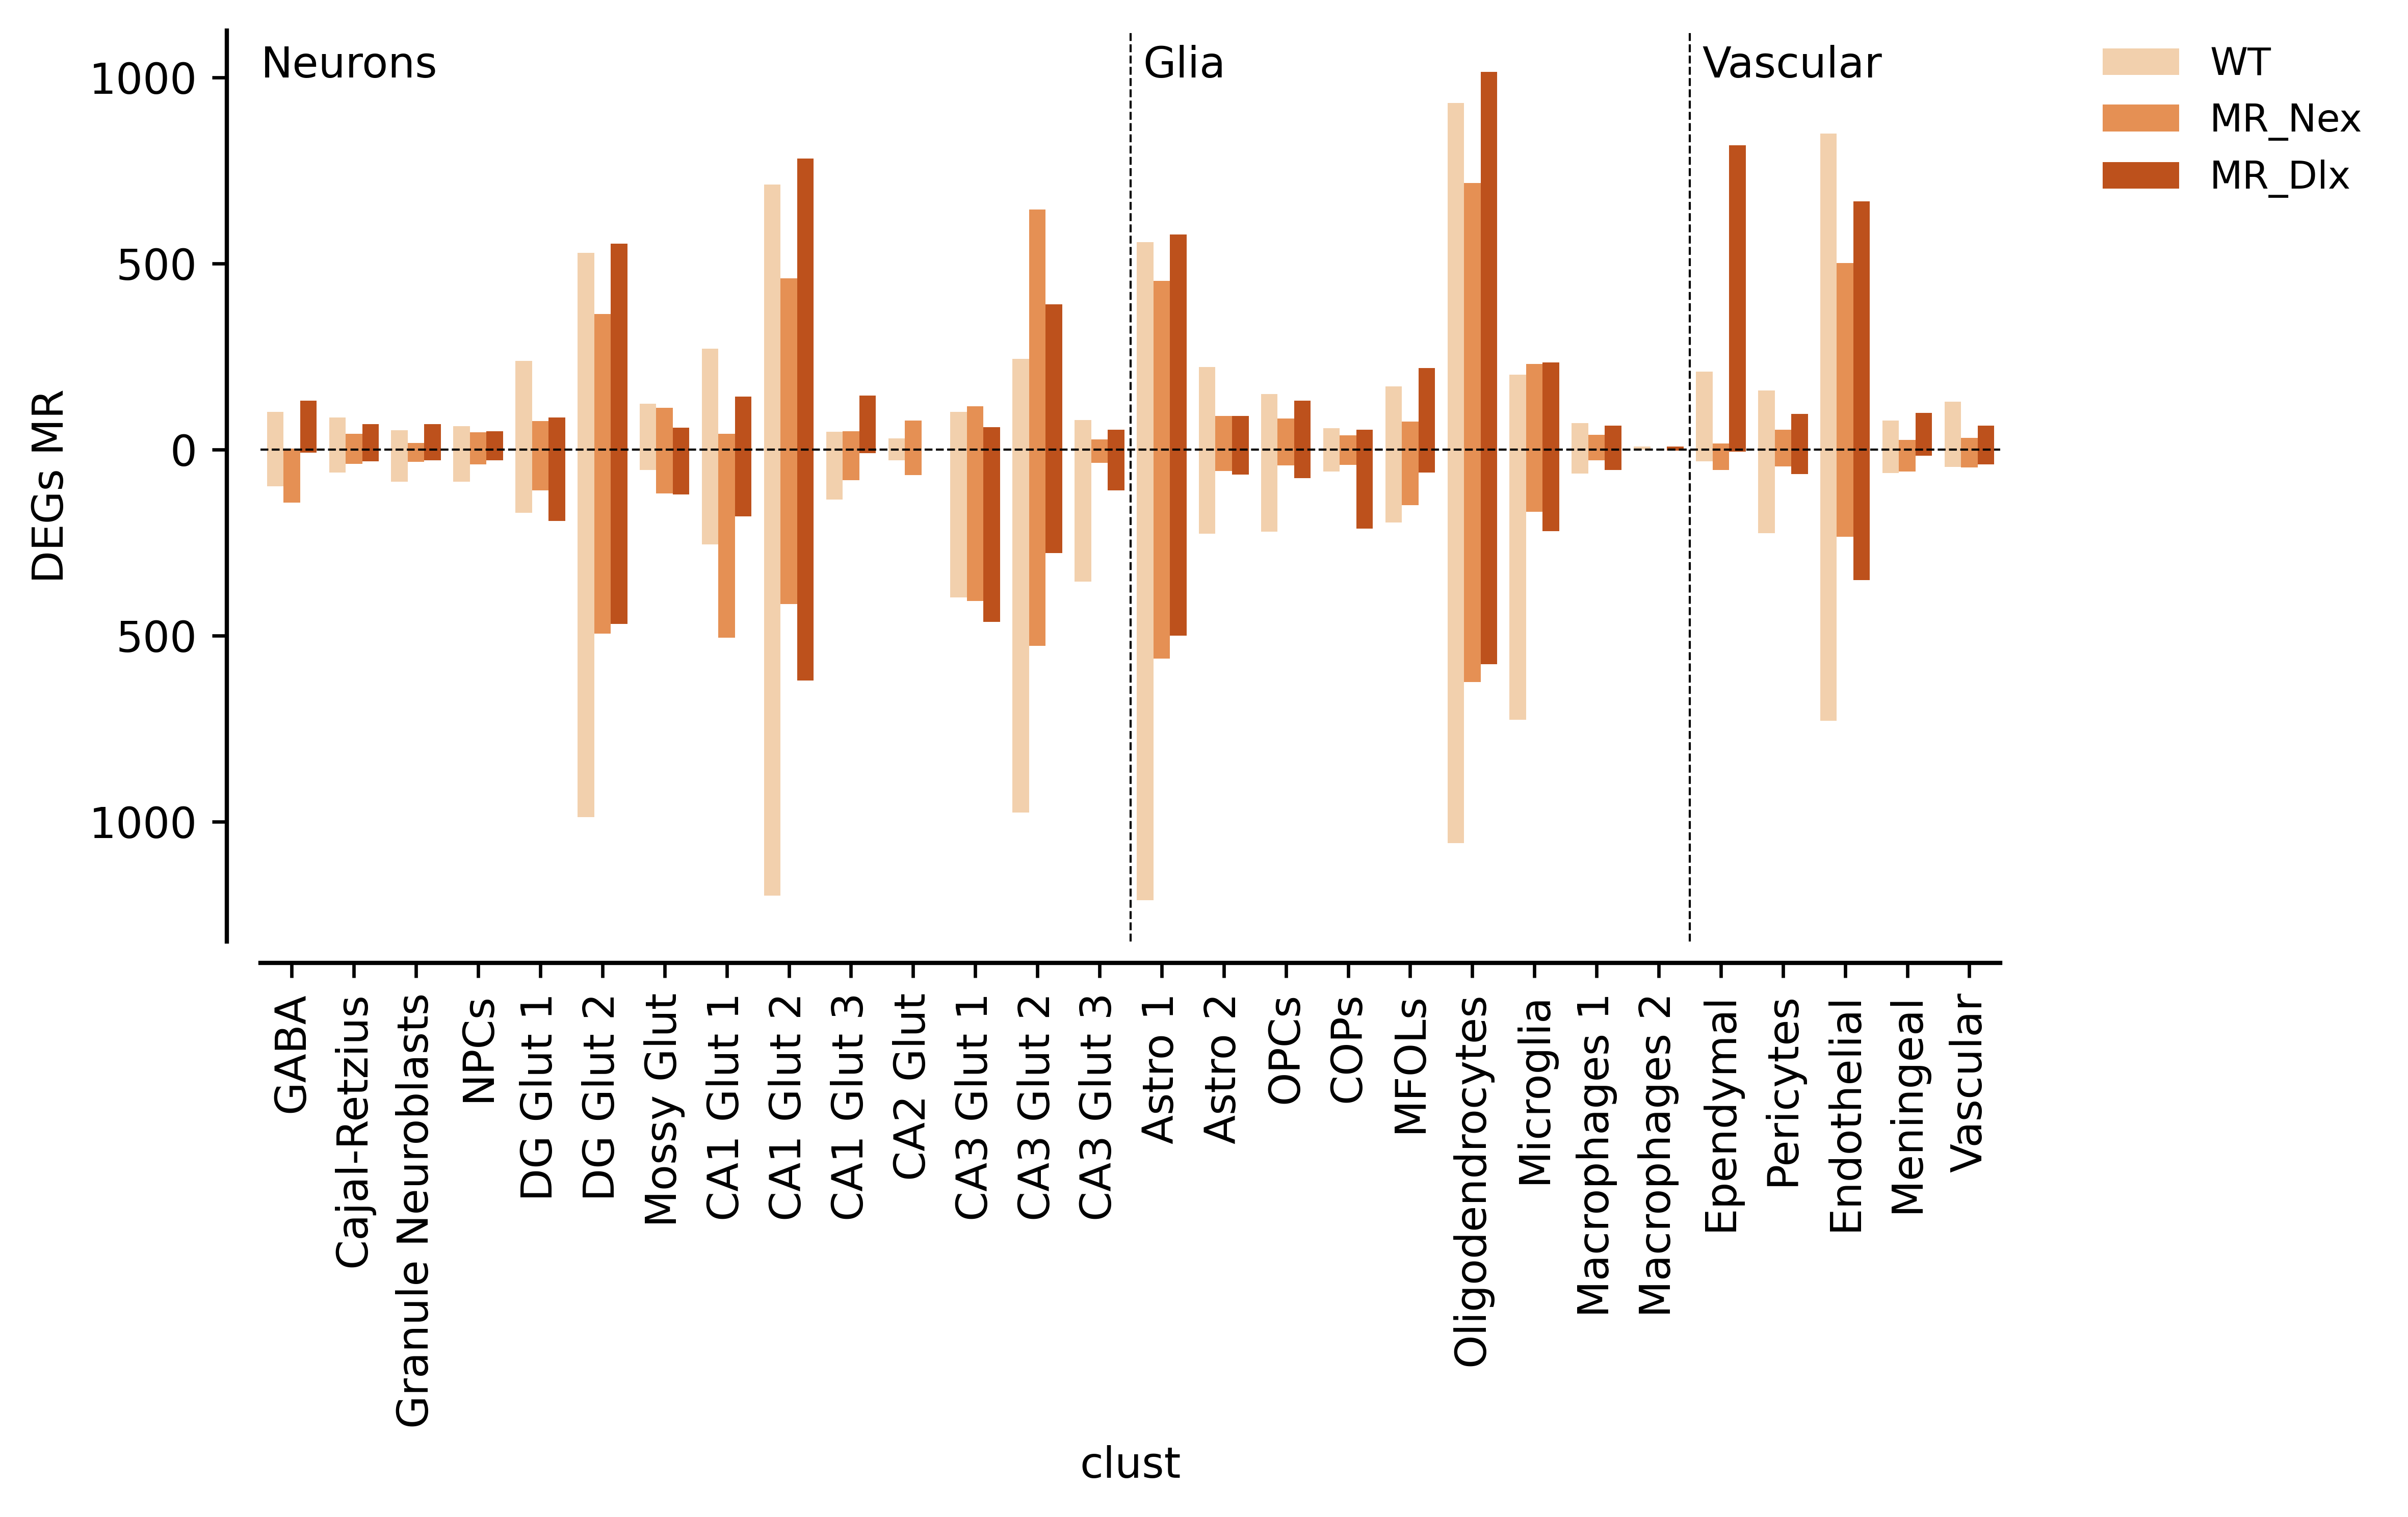

In [31]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(8, 5.5),
    sharey=True
)
df_up = de_genes_sign_mean[de_genes_sign_mean['log2fc'] > 0]
df_down = de_genes_sign_mean[de_genes_sign_mean['log2fc'] < 0]

deg_up = (
    df_up
    .groupby('clust')
    ['test']
    .value_counts()
)
deg_up = pd.DataFrame(deg_up)
deg_up.columns = ['counts']
deg_up.reset_index(inplace=True)
deg_up['clust'] = deg_up['clust'].astype('category')
cats = adata.obs['louvain_coarse'].cat.categories[adata.obs['louvain_coarse'].cat.categories.isin(deg_up['clust'].cat.categories)]
deg_up['clust'] = deg_up['clust'].cat.reorder_categories(cats)
deg_up = deg_up[deg_up['test'].isin(['WT', 'MR_Nex', 'MR_Dlx'])]
deg_up['test'] = deg_up['test'].astype('category')
deg_up['test'] = deg_up['test'].cat.reorder_categories(['WT', 'MR_Nex', 'MR_Dlx'])

deg_down = (
    df_down
    .groupby('clust')
    ['test']
    .value_counts()
)
deg_down = pd.DataFrame(deg_down)
deg_down.columns = ['counts']
deg_down.reset_index(inplace=True)
deg_down['clust'] = deg_down['clust'].astype('category')
cats = adata.obs['louvain_coarse'].cat.categories[adata.obs['louvain_coarse'].cat.categories.isin(deg_down['clust'].cat.categories)]
deg_down['clust'] = deg_down['clust'].cat.reorder_categories(cats)
deg_down = deg_down[deg_down['test'].isin(['WT', 'MR_Nex', 'MR_Dlx'])]
deg_down['test'] = deg_down['test'].astype('category')
deg_down['test'] = deg_down['test'].cat.reorder_categories(['WT', 'MR_Nex', 'MR_Dlx'])

d = deg_down
d_up = deg_up
sns.barplot(x='clust', y='counts', hue='test', palette='Oranges', data=d_up, ax=ax)
sns.barplot(x='clust', y=-d['counts'],  hue='test', palette='Oranges', data=d, ax=ax)

ax.set_ylabel('DEGs MR')
ax.set_title('')
ax.set_yticklabels([str(int(abs(x))) for x in ax.get_yticks()])
ax.axhline(0, linestyle='--', linewidth=0.5, color='black')
ax.axvline(13.5, linestyle='--', linewidth=0.5, color='black')
ax.axvline(22.5, linestyle='--', linewidth=0.5, color='black')
ax.text(-0.5, 1000, 'Neurons', fontsize=10)
ax.text(13.7, 1000, 'Glia', fontsize=10)
ax.text(22.7, 1000, 'Vascular', fontsize=10)
labels = ax.get_xticklabels()
set_axis_style(ax)
ax.set_xticklabels(labels, rotation=90)
h, l = ax.get_legend_handles_labels()
ax.legend(handles = h[:3], labels = l[:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9, ncol=1, frameon=False)
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

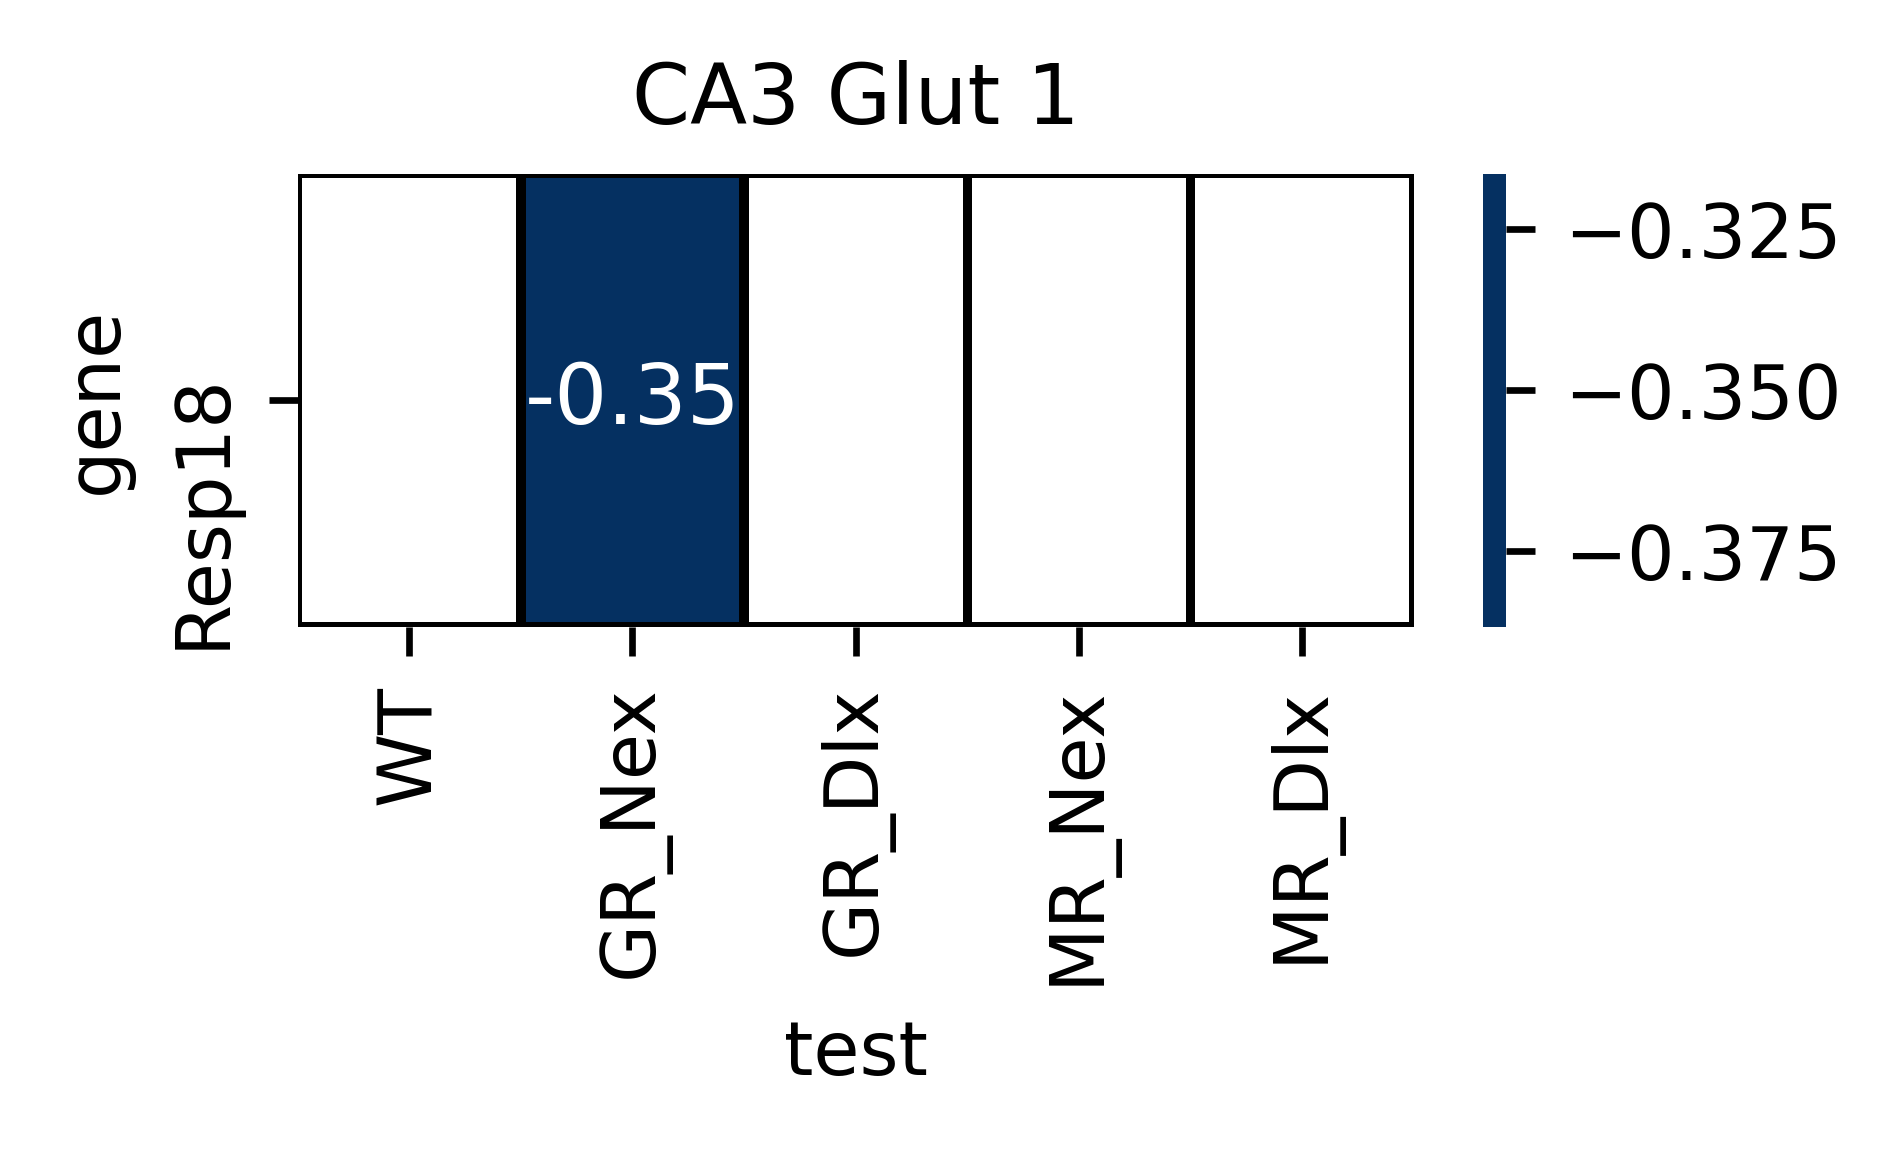

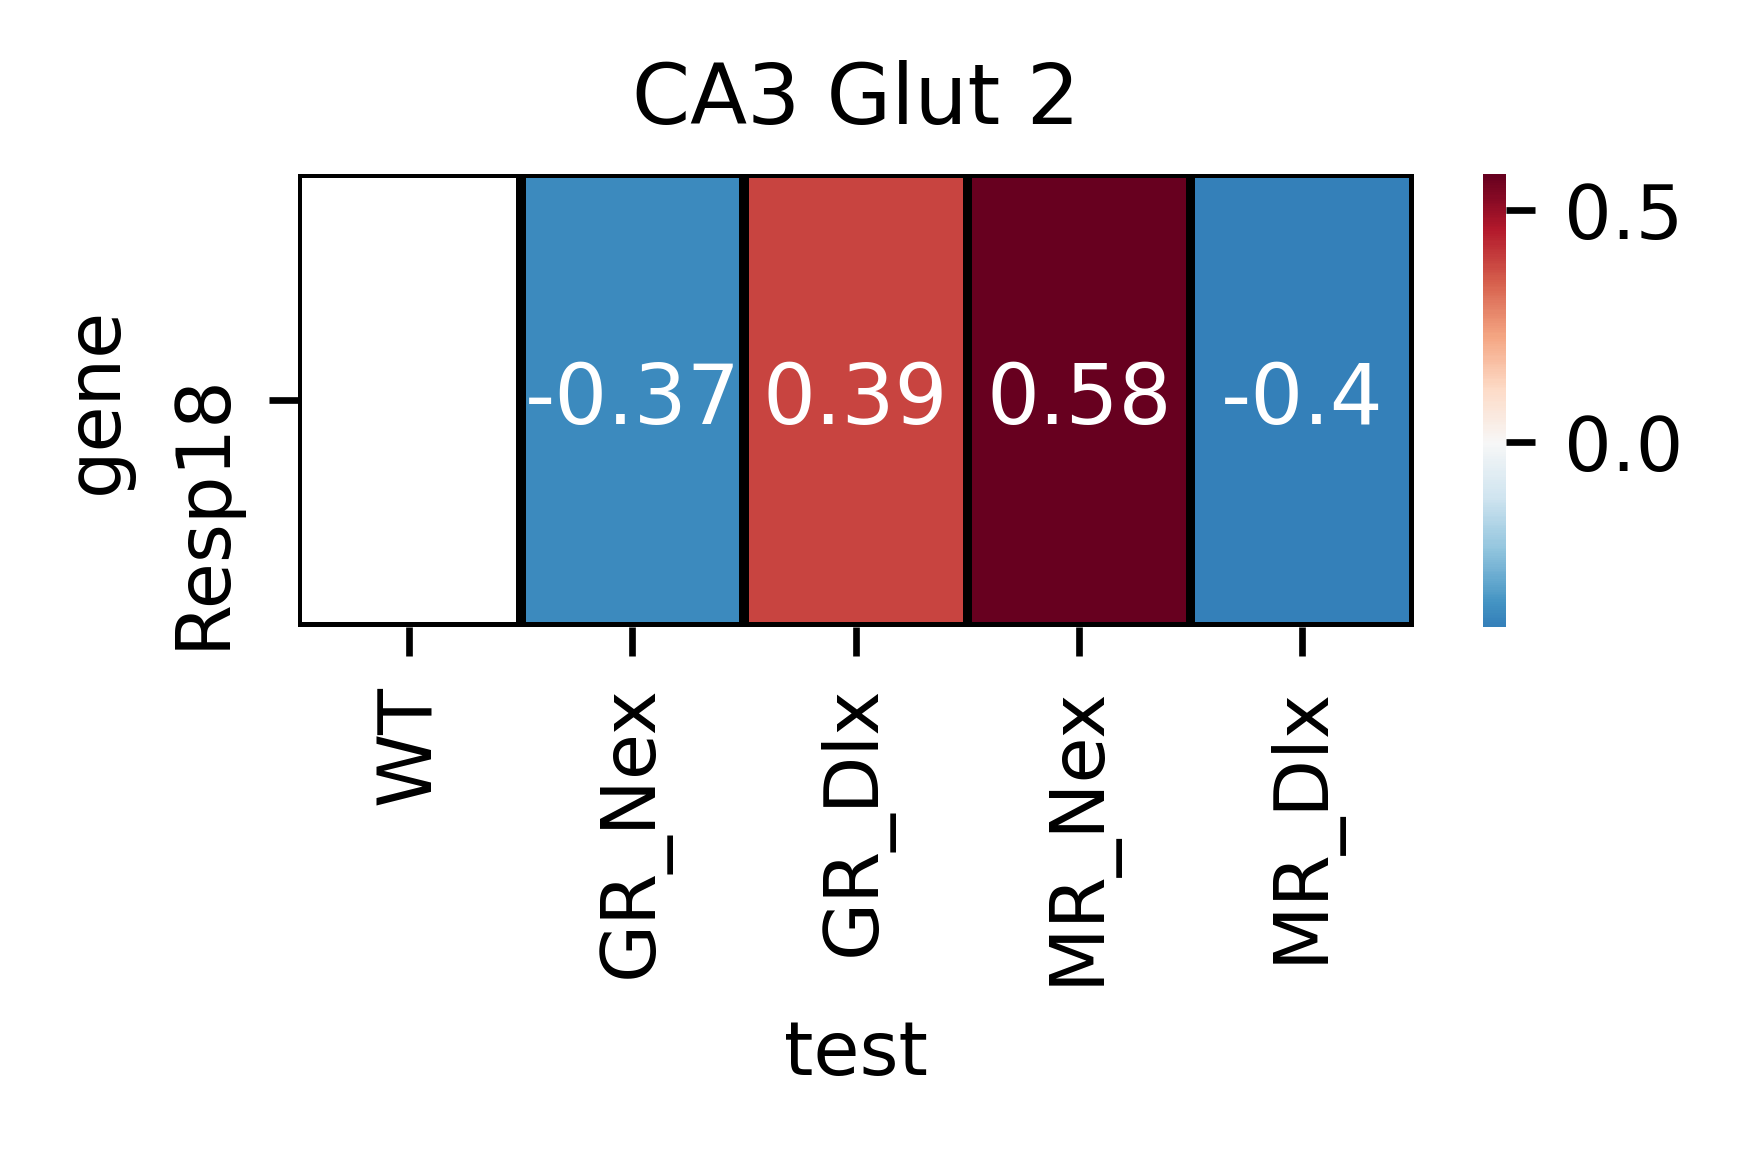

In [19]:
gene_list = ['Resp18', 'Resp18']
cell_type_list = ['CA3', 'CA3',]
cell_type_adata_list = ['CA3 Glut 1', 'CA3 Glut 2']

for i in range(len(gene_list)):
    fig, ax = plt.subplots(1, 1, figsize=(3, 1))
    de_genes_plot = de_genes[
        (de_genes['gene']==gene_list[i])
        & (de_genes['clust']==cell_type_adata_list[i])
    ]
    de_genes_plot = de_genes_plot[
        ~de_genes_plot['test'].isin(['WT_GR','WT_MR'])
    ]
    de_genes_plot['test'] = de_genes_plot['test'].astype('category')
    de_genes_plot['test'] = de_genes_plot['test'].cat.reorder_categories([
        'WT',
        'GR_Nex',
        'GR_Dlx',
        'MR_Nex',
        'MR_Dlx'
    ])
    pivot_mean_pert = de_genes_plot.pivot(columns='test', index='gene', values='mean_pert')
    pivot_mean_ctrl = de_genes_plot.pivot(columns='test', index='gene', values='mean_ctrl')
    pivot_qval = de_genes_plot.pivot(columns='test', index='gene', values='qval')
    pivot_log2fc = de_genes_plot.pivot(columns='test', index='gene', values='log2fc')
    qval_mask = (
        (pivot_qval < 0.05) 
        #& ((pivot_mean_pert > 0.1) | (pivot_mean_ctrl > 0.1)) 
        #& (np.abs(pivot_log2fc) > 0.1)
    )
    sns.heatmap(
        pivot_log2fc,
        annot=True,
        cmap='RdBu_r',
        center=0,
        ax=ax,
        mask=~qval_mask,
        linewidth=1,
        linecolor='black'
    )
    ax.set_title(cell_type_adata_list[i])

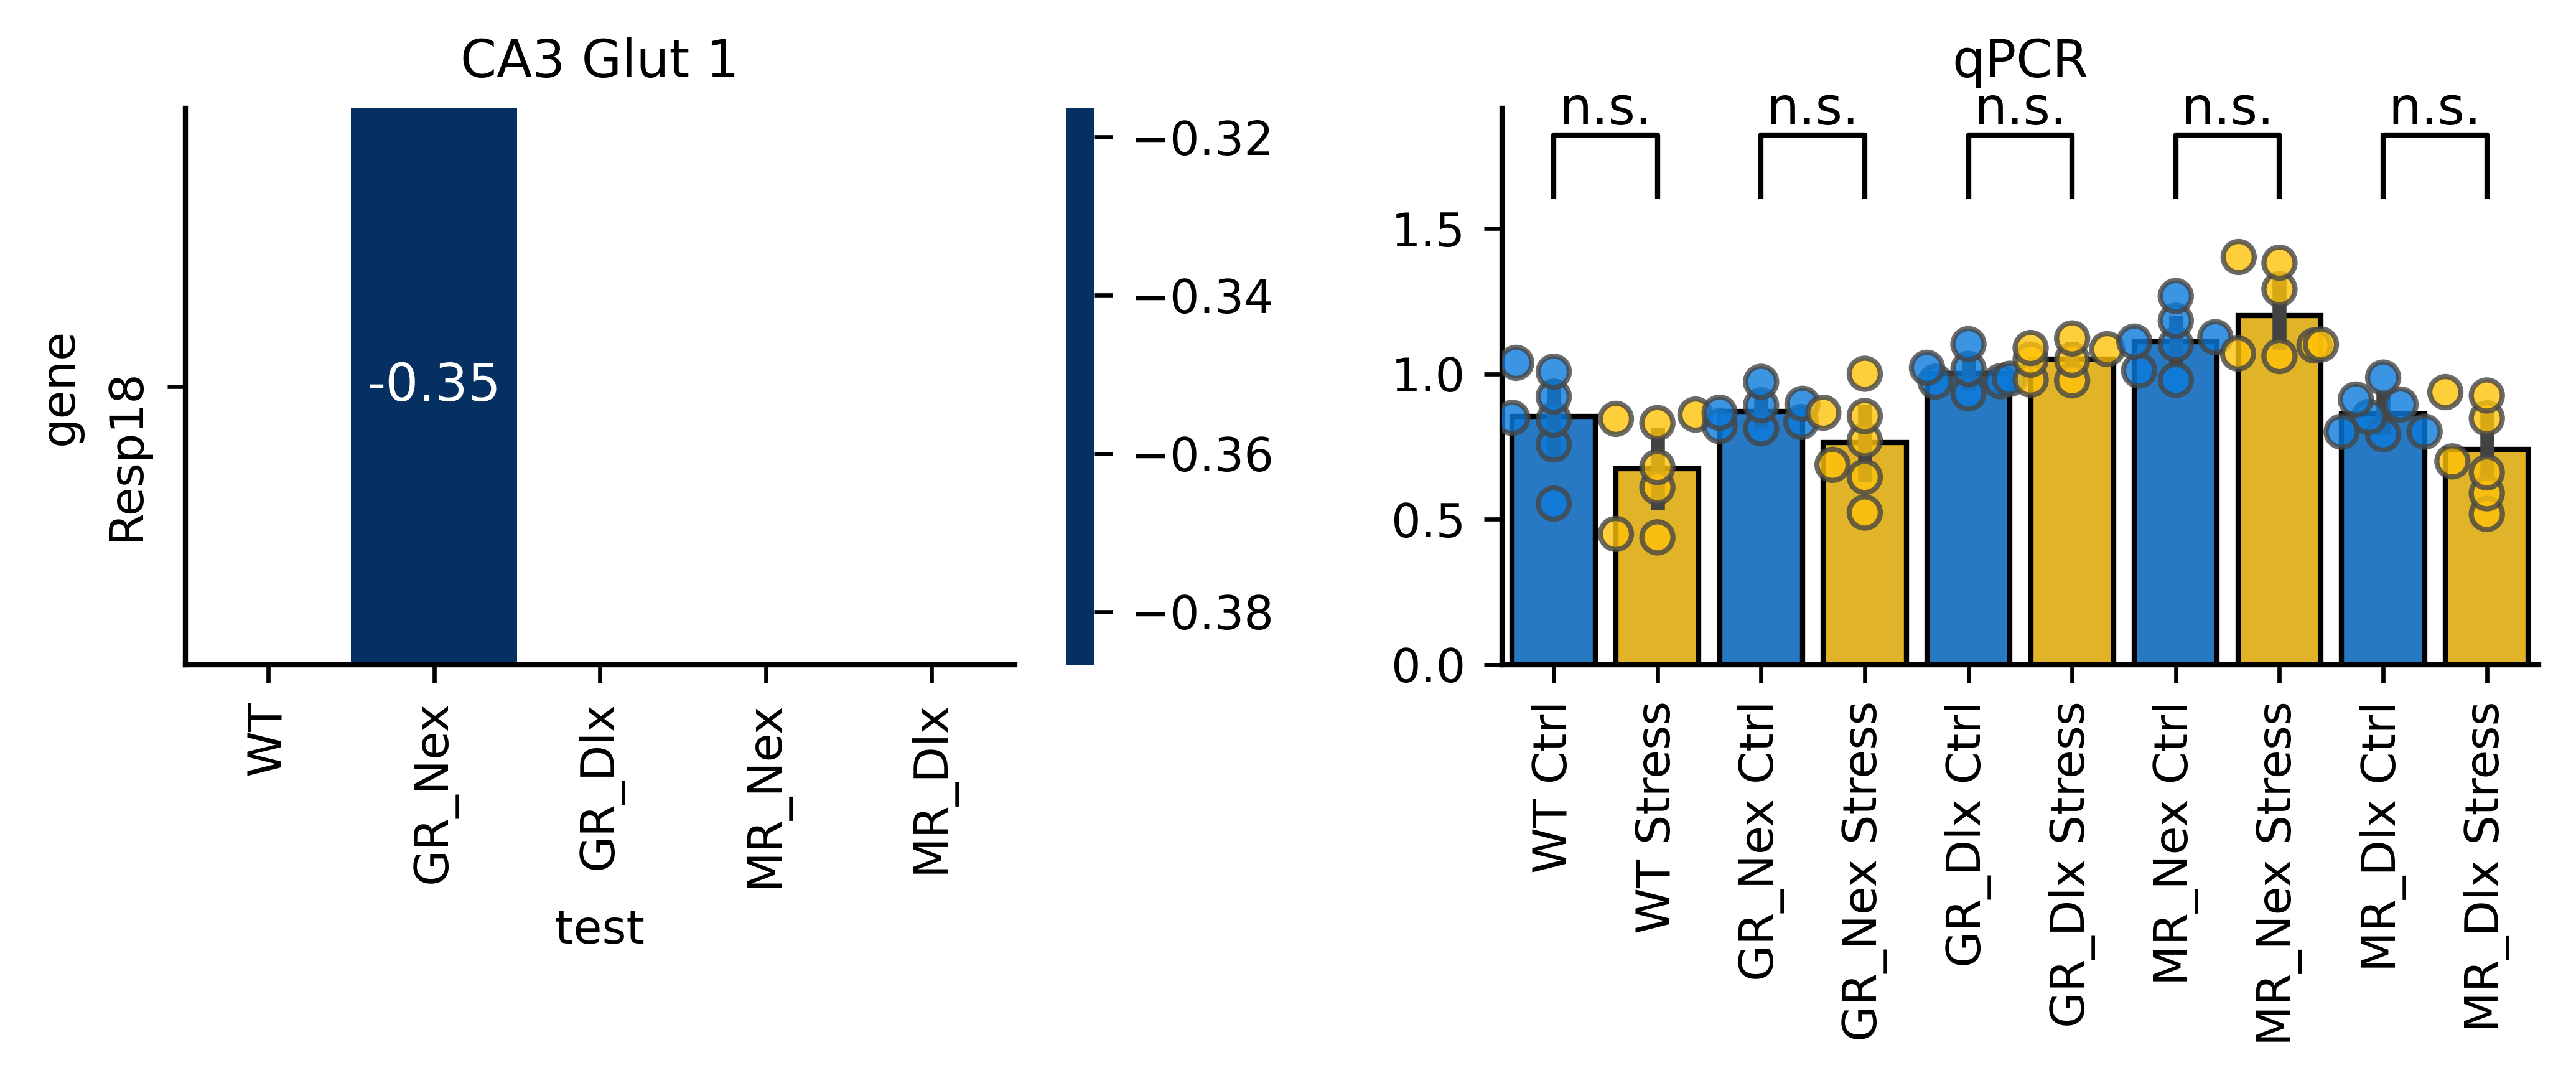

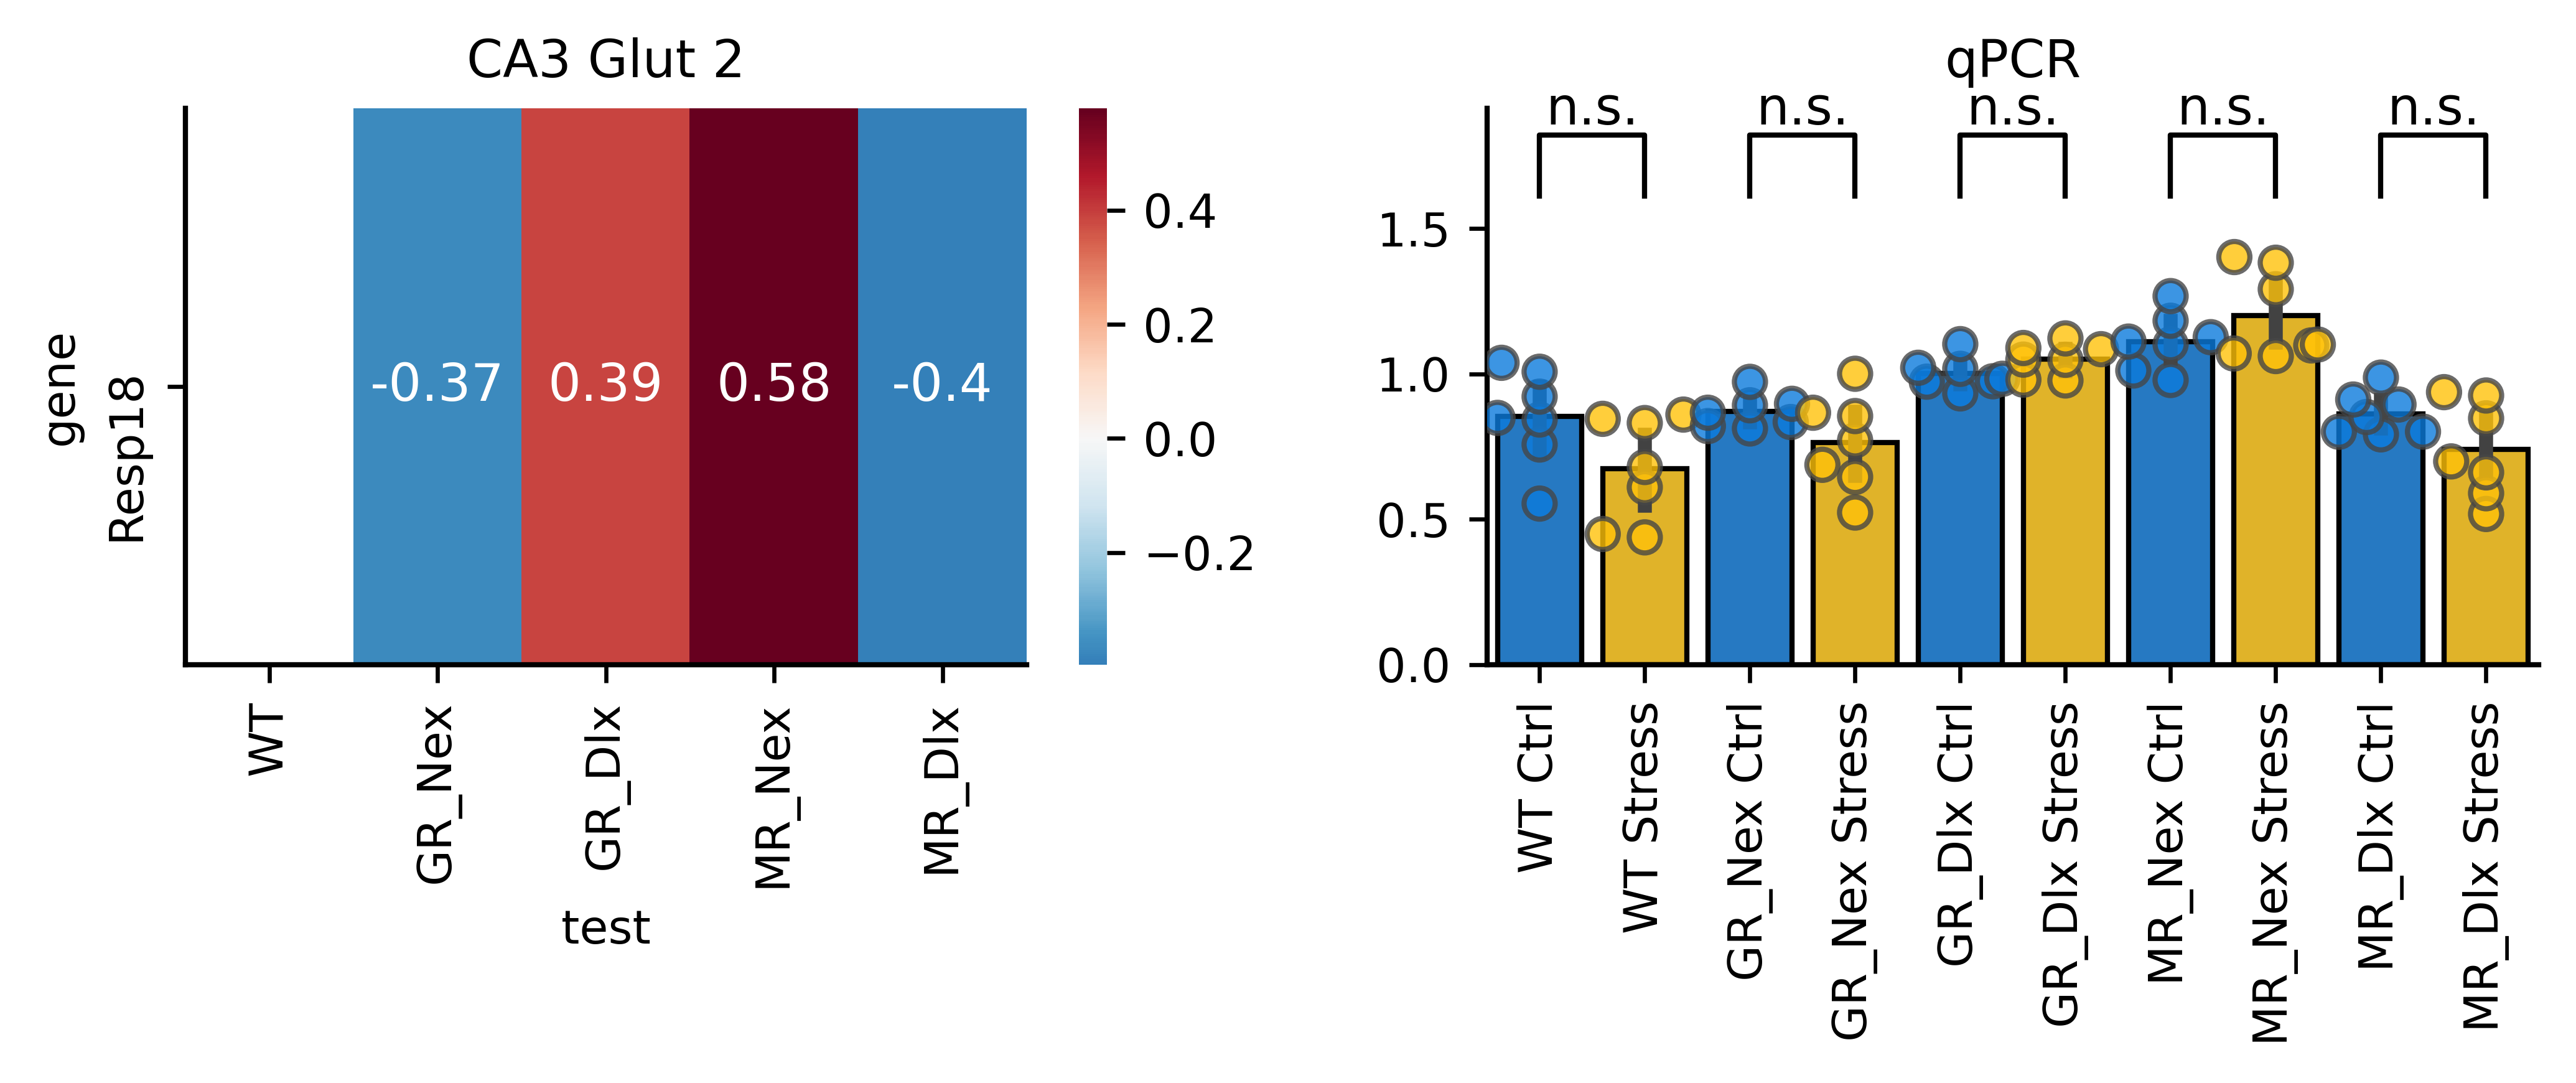

In [15]:
gene_list = ['Resp18', 'Resp18']
cell_type_list = ['CA3', 'CA3',]
cell_type_adata_list = ['CA3 Glut 1', 'CA3 Glut 2']

for i in range(len(gene_list)):
    fig, ax = plt.subplots(1, 2, figsize=(7, 3))
    de_genes_plot = de_genes[
        (de_genes['gene']==gene_list[i])
        & (de_genes['clust']==cell_type_adata_list[i])
    ]
    de_genes_plot = de_genes_plot[
        ~de_genes_plot['test'].isin(['WT_GR','WT_MR'])
    ]
    de_genes_plot['test'] = de_genes_plot['test'].astype('category')
    de_genes_plot['test'] = de_genes_plot['test'].cat.reorder_categories([
        'WT',
        'GR_Nex',
        'GR_Dlx',
        'MR_Nex',
        'MR_Dlx'
    ])
    pivot_mean_pert = de_genes_plot.pivot(columns='test', index='gene', values='mean_pert')
    pivot_mean_ctrl = de_genes_plot.pivot(columns='test', index='gene', values='mean_ctrl')
    pivot_qval = de_genes_plot.pivot(columns='test', index='gene', values='qval')
    pivot_log2fc = de_genes_plot.pivot(columns='test', index='gene', values='log2fc')
    qval_mask = (
        (pivot_qval < 0.05) 
        #& ((pivot_mean_pert > 0.1) | (pivot_mean_ctrl > 0.1)) 
        #& (np.abs(pivot_log2fc) > 0.1)
    )
    sns.heatmap(
        pivot_log2fc,
        annot=True,
        cmap='RdBu_r',
        center=0,
        ax=ax[0],
        mask=~qval_mask
    )
    ax[0].set_title(cell_type_adata_list[i])

    sns.barplot(
        x='Comb', 
        y='Value', 
        data=valid_data[
            (valid_data['Gene']==gene_list[i]) 
            & (valid_data['Cell Type']==cell_type_list[i]) 
            #& (valid_data['Genotype']=='WT')
        ],
        palette=adata.uns['condition_colors'],
        ax=ax[1],
        edgecolor='Black',
        linewidth=1,
    )
    sns.swarmplot(
        x='Comb', 
        y='Value', 
        data=valid_data[
            (valid_data['Gene']==gene_list[i]) 
            & (valid_data['Cell Type']==cell_type_list[i]) 
            #& (valid_data['Genotype']=='WT')
        ],
        size=6,
        palette=adata.uns['condition_colors'],
        alpha=0.8,
        edgecolor='gray',
        linewidth=1,
        ax=ax[1]
    )
    
    df = valid_data[
            (valid_data['Gene']==gene_list[i]) 
            & (valid_data['Cell Type']==cell_type_list[i]) 
            #& (valid_data['Genotype']=='WT')
    ]

    x = df[df['Comb']=='WT Ctrl']['Value']
    y = df[df['Comb']=='WT Stress']['Value']
    _, p = sp.stats.ttest_ind(x, y)
    x1, x2 = 0, 1 
    scale = df['Value'].max()
    y, h, col = scale + 0.15*scale, 0.15*scale, 'k'
    ax[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    ax[1].text((x1+x2)*.5, y+h, pval_to_asterisk(p), ha='center', va='bottom', color=col)
    
    x = df[df['Comb']=='GR_Nex Ctrl']['Value']
    y = df[df['Comb']=='GR_Nex Stress']['Value']
    _, p = sp.stats.ttest_ind(x, y)
    x1, x2 = 2, 3 
    scale = df['Value'].max()
    y, h, col = scale + 0.15*scale, 0.15*scale, 'k'
    ax[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    ax[1].text((x1+x2)*.5, y+h, pval_to_asterisk(p), ha='center', va='bottom', color=col)
    
    x = df[df['Comb']=='GR_Dlx Ctrl']['Value']
    y = df[df['Comb']=='GR_Dlx Stress']['Value']
    _, p = sp.stats.ttest_ind(x, y)
    x1, x2 = 4, 5 
    scale = df['Value'].max()
    y, h, col = scale + 0.15*scale, 0.15*scale, 'k'
    ax[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    ax[1].text((x1+x2)*.5, y+h, pval_to_asterisk(p), ha='center', va='bottom', color=col)
    
    x = df[df['Comb']=='MR_Nex Ctrl']['Value']
    y = df[df['Comb']=='MR_Nex Stress']['Value']
    _, p = sp.stats.ttest_ind(x, y)
    x1, x2 = 6, 7 
    scale = df['Value'].max()
    y, h, col = scale + 0.15*scale, 0.15*scale, 'k'
    ax[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    ax[1].text((x1+x2)*.5, y+h, pval_to_asterisk(p), ha='center', va='bottom', color=col)
    
    x = df[df['Comb']=='MR_Dlx Ctrl']['Value']
    y = df[df['Comb']=='MR_Dlx Stress']['Value']
    _, p = sp.stats.ttest_ind(x, y)
    x1, x2 = 8, 9 
    scale = df['Value'].max()
    y, h, col = scale + 0.15*scale, 0.15*scale, 'k'
    ax[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    ax[1].text((x1+x2)*.5, y+h, pval_to_asterisk(p), ha='center', va='bottom', color=col)
    

    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')
    ax[1].set_ylim(bottom=0)
    ax[1].set_title('qPCR')
    sns.despine()
    fig.tight_layout()
    #fig.savefig(f'figs/log2fc_{cell_type_adata_list[i]}_{gene_list[i]}.png', dpi=300)

In [37]:
def paired_boxplot(group, title=None):
    fig, ax = plt.subplots(1, 2, figsize=(2.5, 3), sharey=True)
    df = rnascope[f'Resp18_{group}'][rnascope[f'Resp18_{group}']['Group'] == 'Low']
    var = 'Resp18/Area'
    sns.barplot(
        x='Condition', 
        y='Resp18/Area', 
        data=df, 
        ax=ax[0], 
        edgecolor='black', 
        linewidth=1,
        palette=adata.uns['condition_colors']
    )
    sns.swarmplot(
        x='Condition',
        y=var, 
        data=df,
        edgecolor='gray', 
        linewidth=1,
        palette=adata.uns['condition_colors'],
        ax=ax[0])

    x = df[df['Condition']=='Ctrl'][var]
    y = df[df['Condition']=='AD'][var]
    _, p = sp.stats.ttest_ind(x, y)


    x1, x2 = 0, 1 
    #scale = adata_.X[:, adata_.var_names == gene].max()
    scale = ax[0].get_ylim()[1]
    y, h, col = scale, 0.15*scale, 'k'
    y = df[df['Condition']=='AD'][var].max()
    #ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    ax[0].text(x2, 0.98*y, pval_to_asterisk(p), fontsize=12, ha='center', va='bottom', color=col)
    ax[0].set_xticklabels(['Ctrl', 'Stress'])
    ax[0].set_xlabel('')
    ax[0].set_title('Low Nrgn')
    df = rnascope[f'Resp18_{group}'][rnascope[f'Resp18_{group}']['Group'] == 'High']
    var = 'Resp18/Area'
    sns.barplot(
        x='Condition', 
        y='Resp18/Area', 
        data=df, 
        ax=ax[1], 
        edgecolor='black', 
        linewidth=1,
        palette=adata.uns['condition_colors']
    )
    sns.swarmplot(
        x='Condition',
        y=var, 
        data=df,
        edgecolor='gray', 
        linewidth=1,
        palette=adata.uns['condition_colors'],
        ax=ax[1])

    x = df[df['Condition']=='Ctrl'][var]
    y = df[df['Condition']=='AD'][var]
    _, p = sp.stats.ttest_ind(x, y)


    x1, x2 = 0, 1 
    #scale = adata_.X[:, adata_.var_names == gene].max()
    scale = ax[1].get_ylim()[1]
    y, h, col = scale, 0.15*scale, 'k'
    y = df[df['Condition']=='AD'][var].max()
    #ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    ax[1].text(x2, 0.98*y, pval_to_asterisk(p), fontsize=12, ha='center', va='bottom', color=col)
    ax[1].set_ylabel('')
    ax[1].set_xlabel('')
    ax[1].set_xticklabels(['Ctrl', 'Stress'])
    ax[1].set_title('High Nrgn')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.suptitle(title)

    sns.despine()

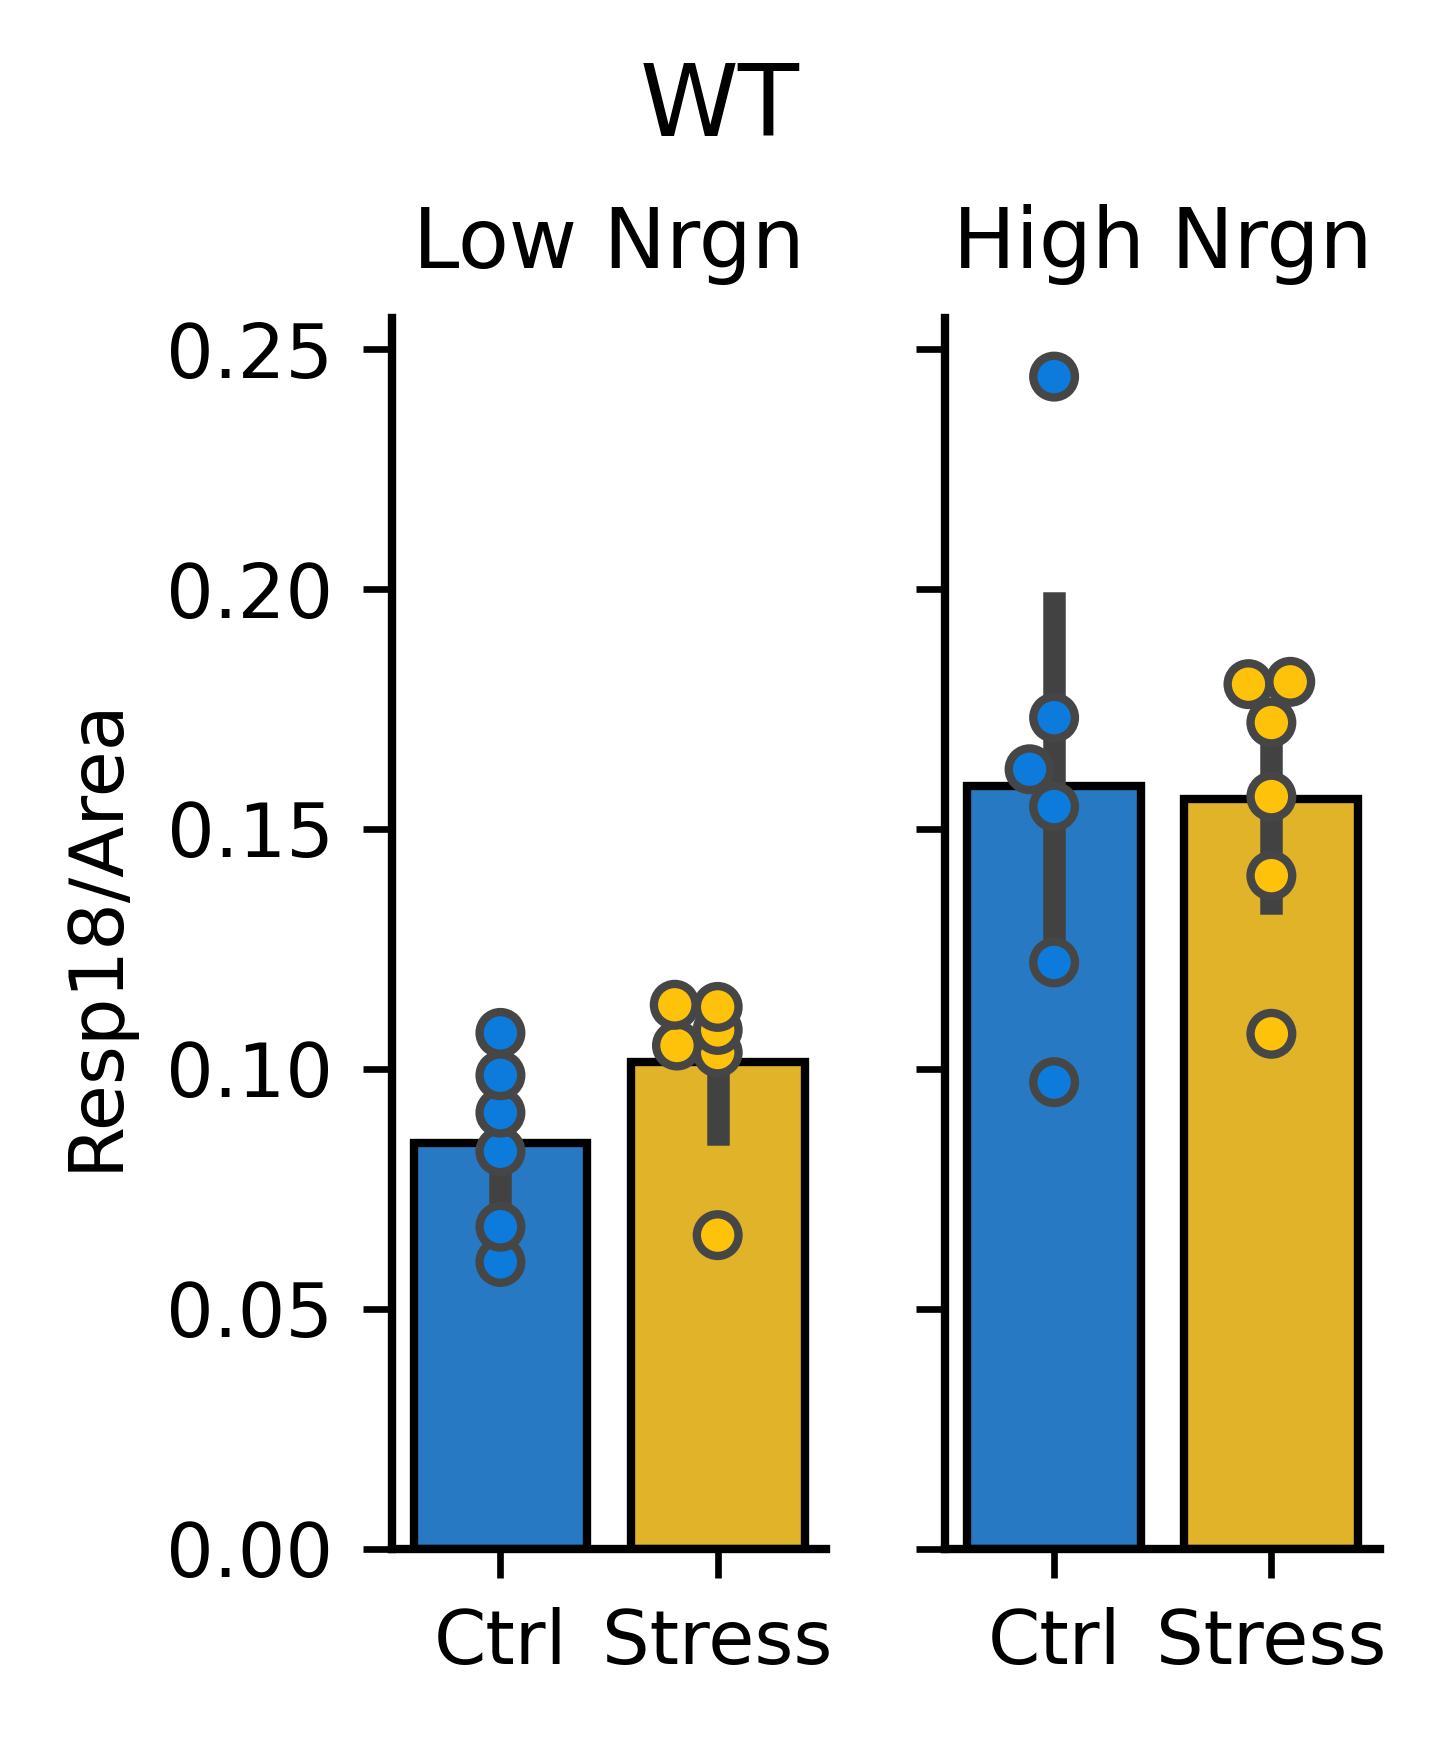

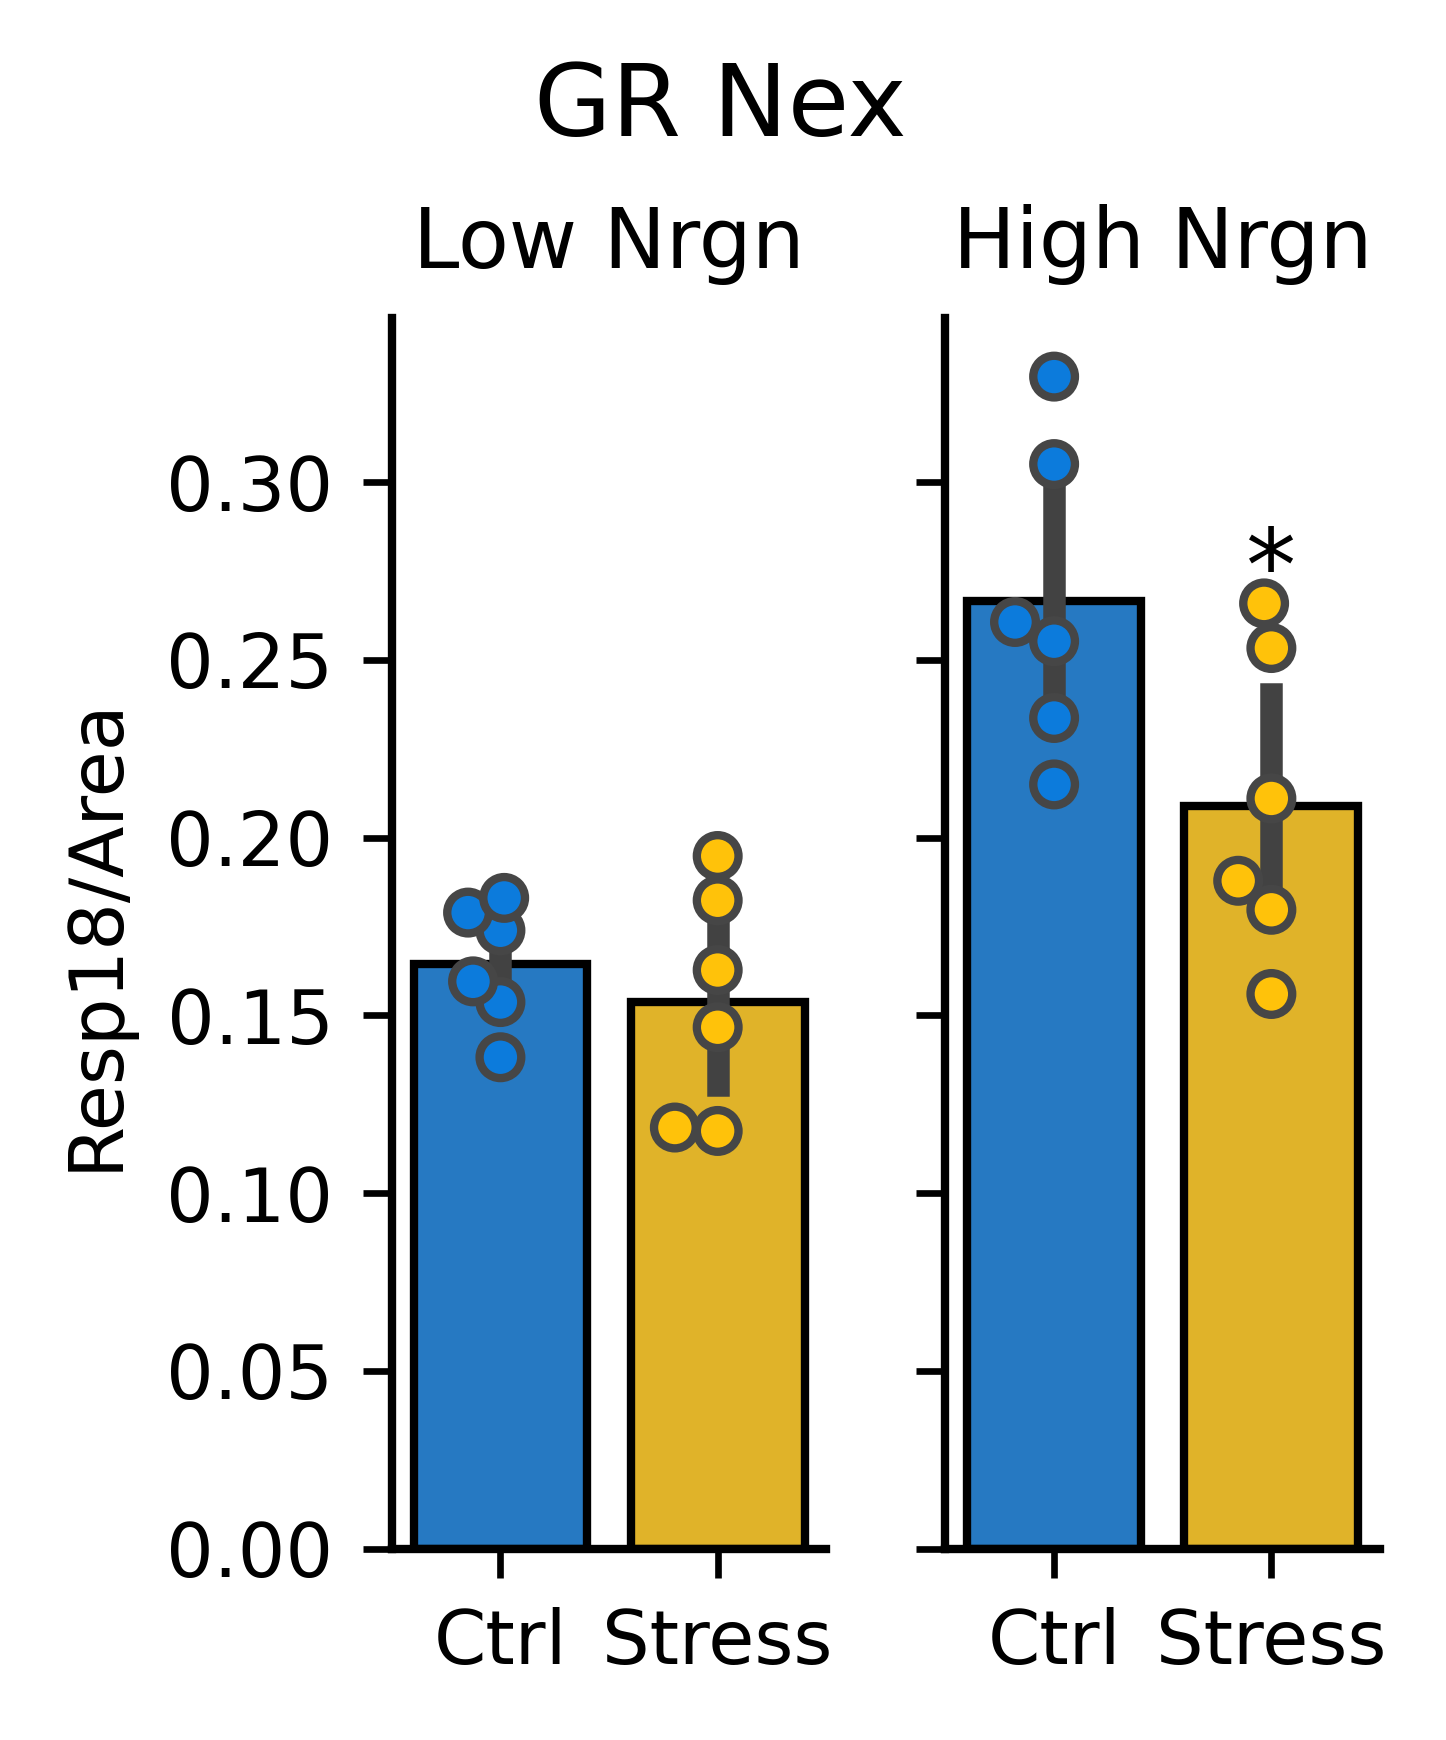

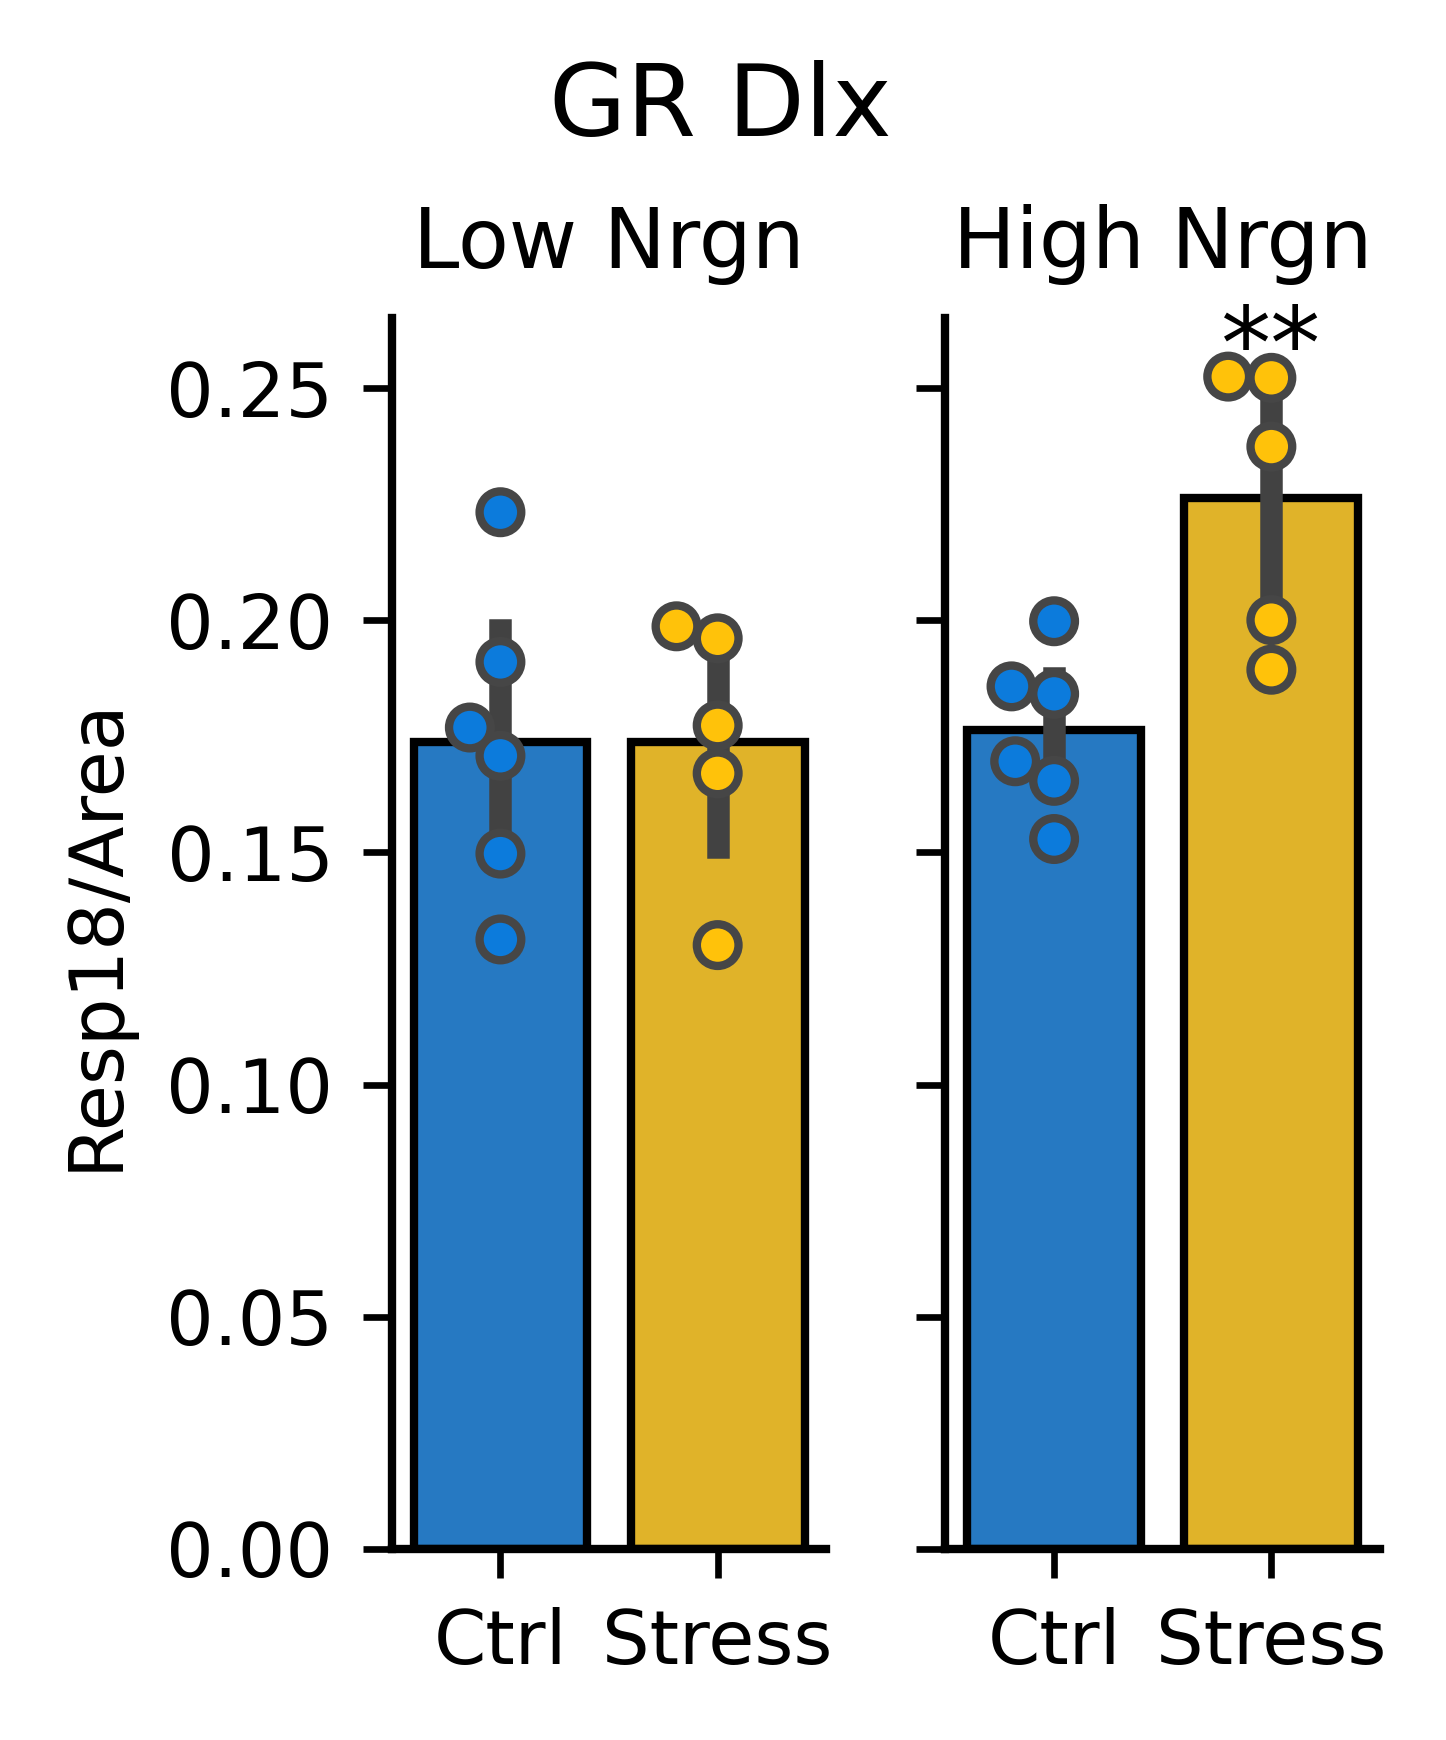

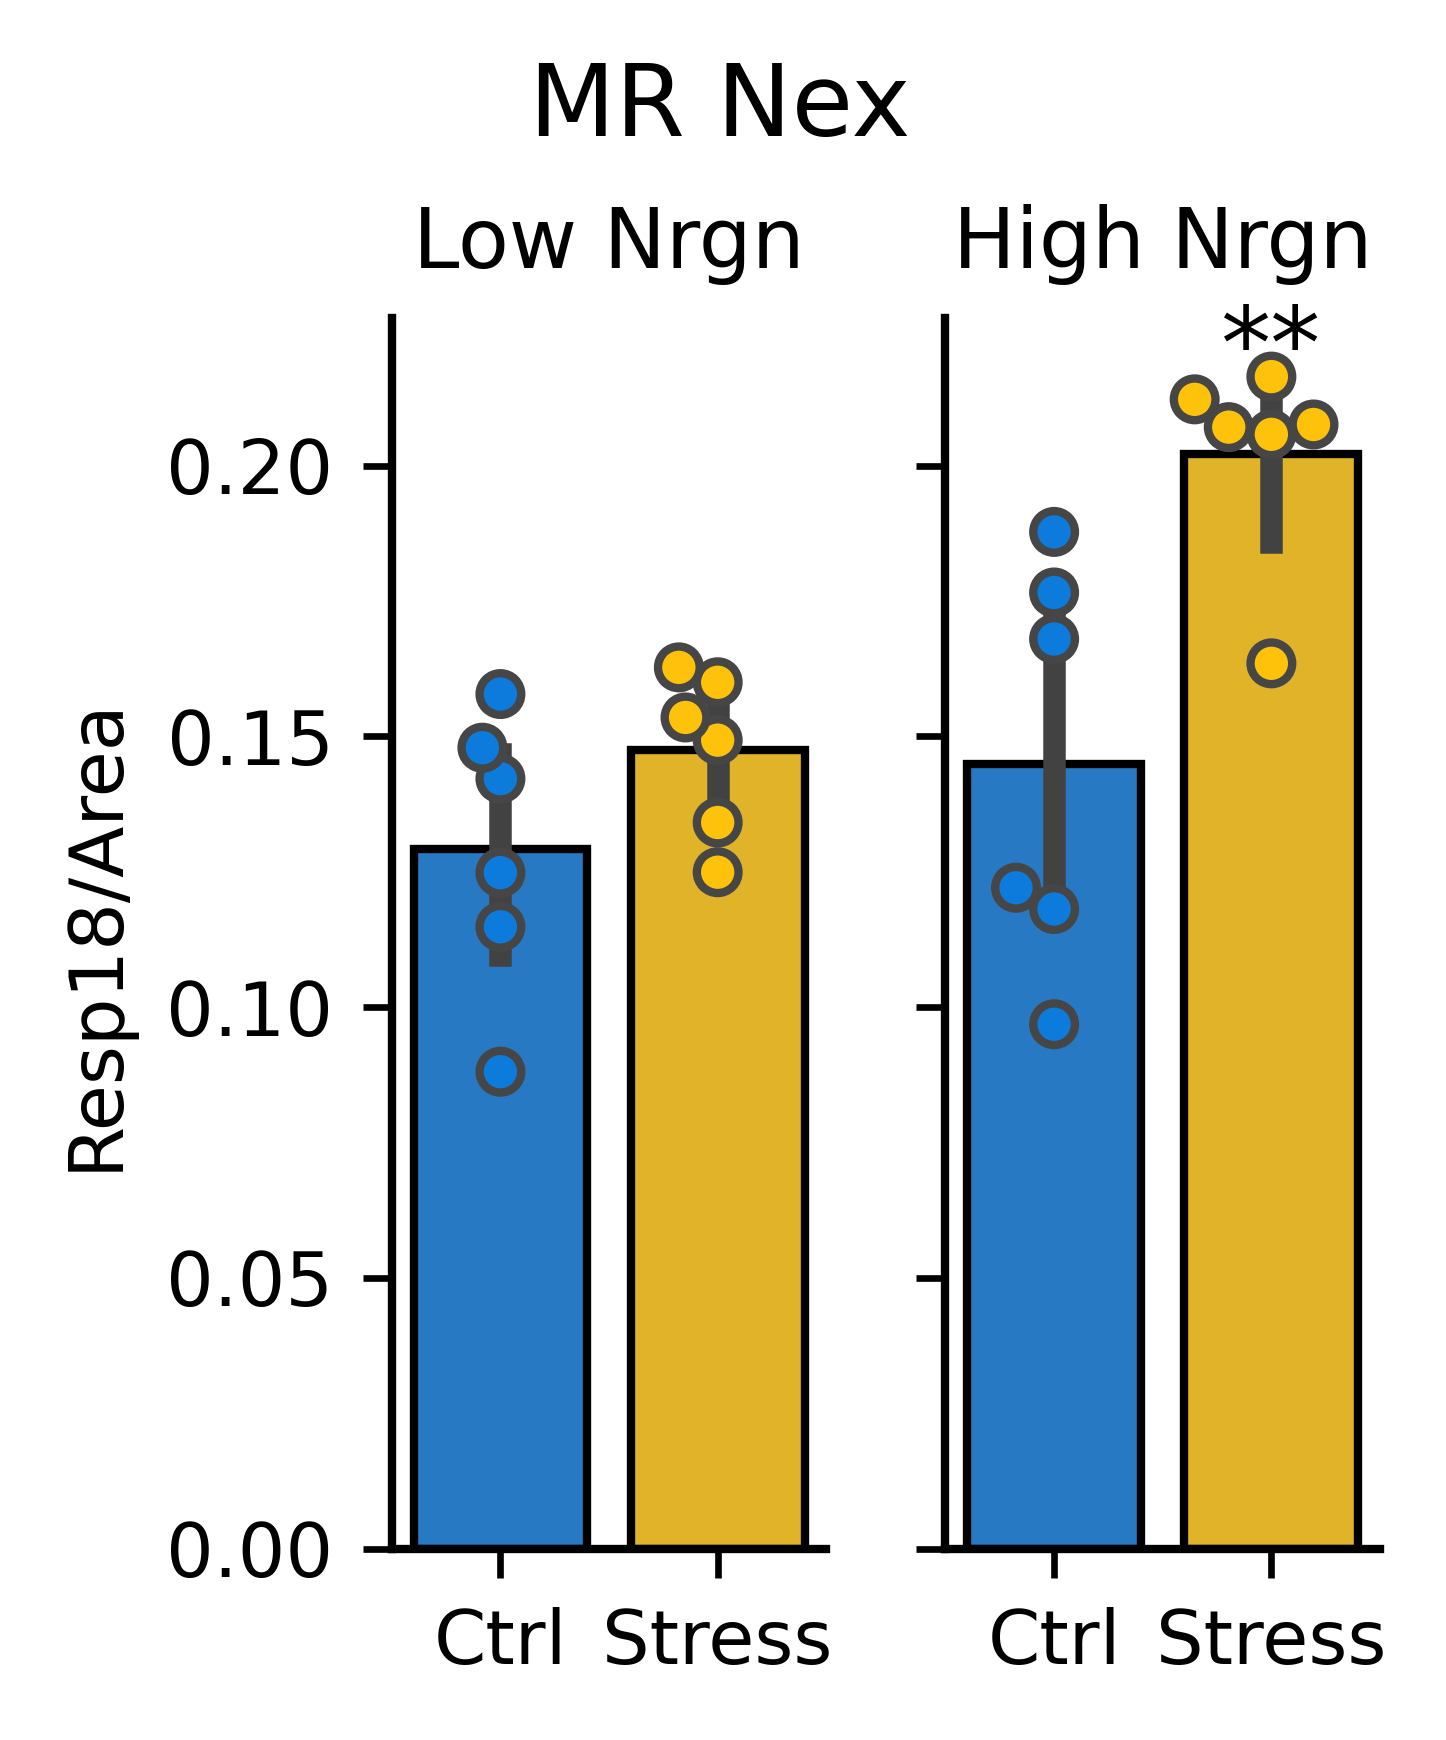

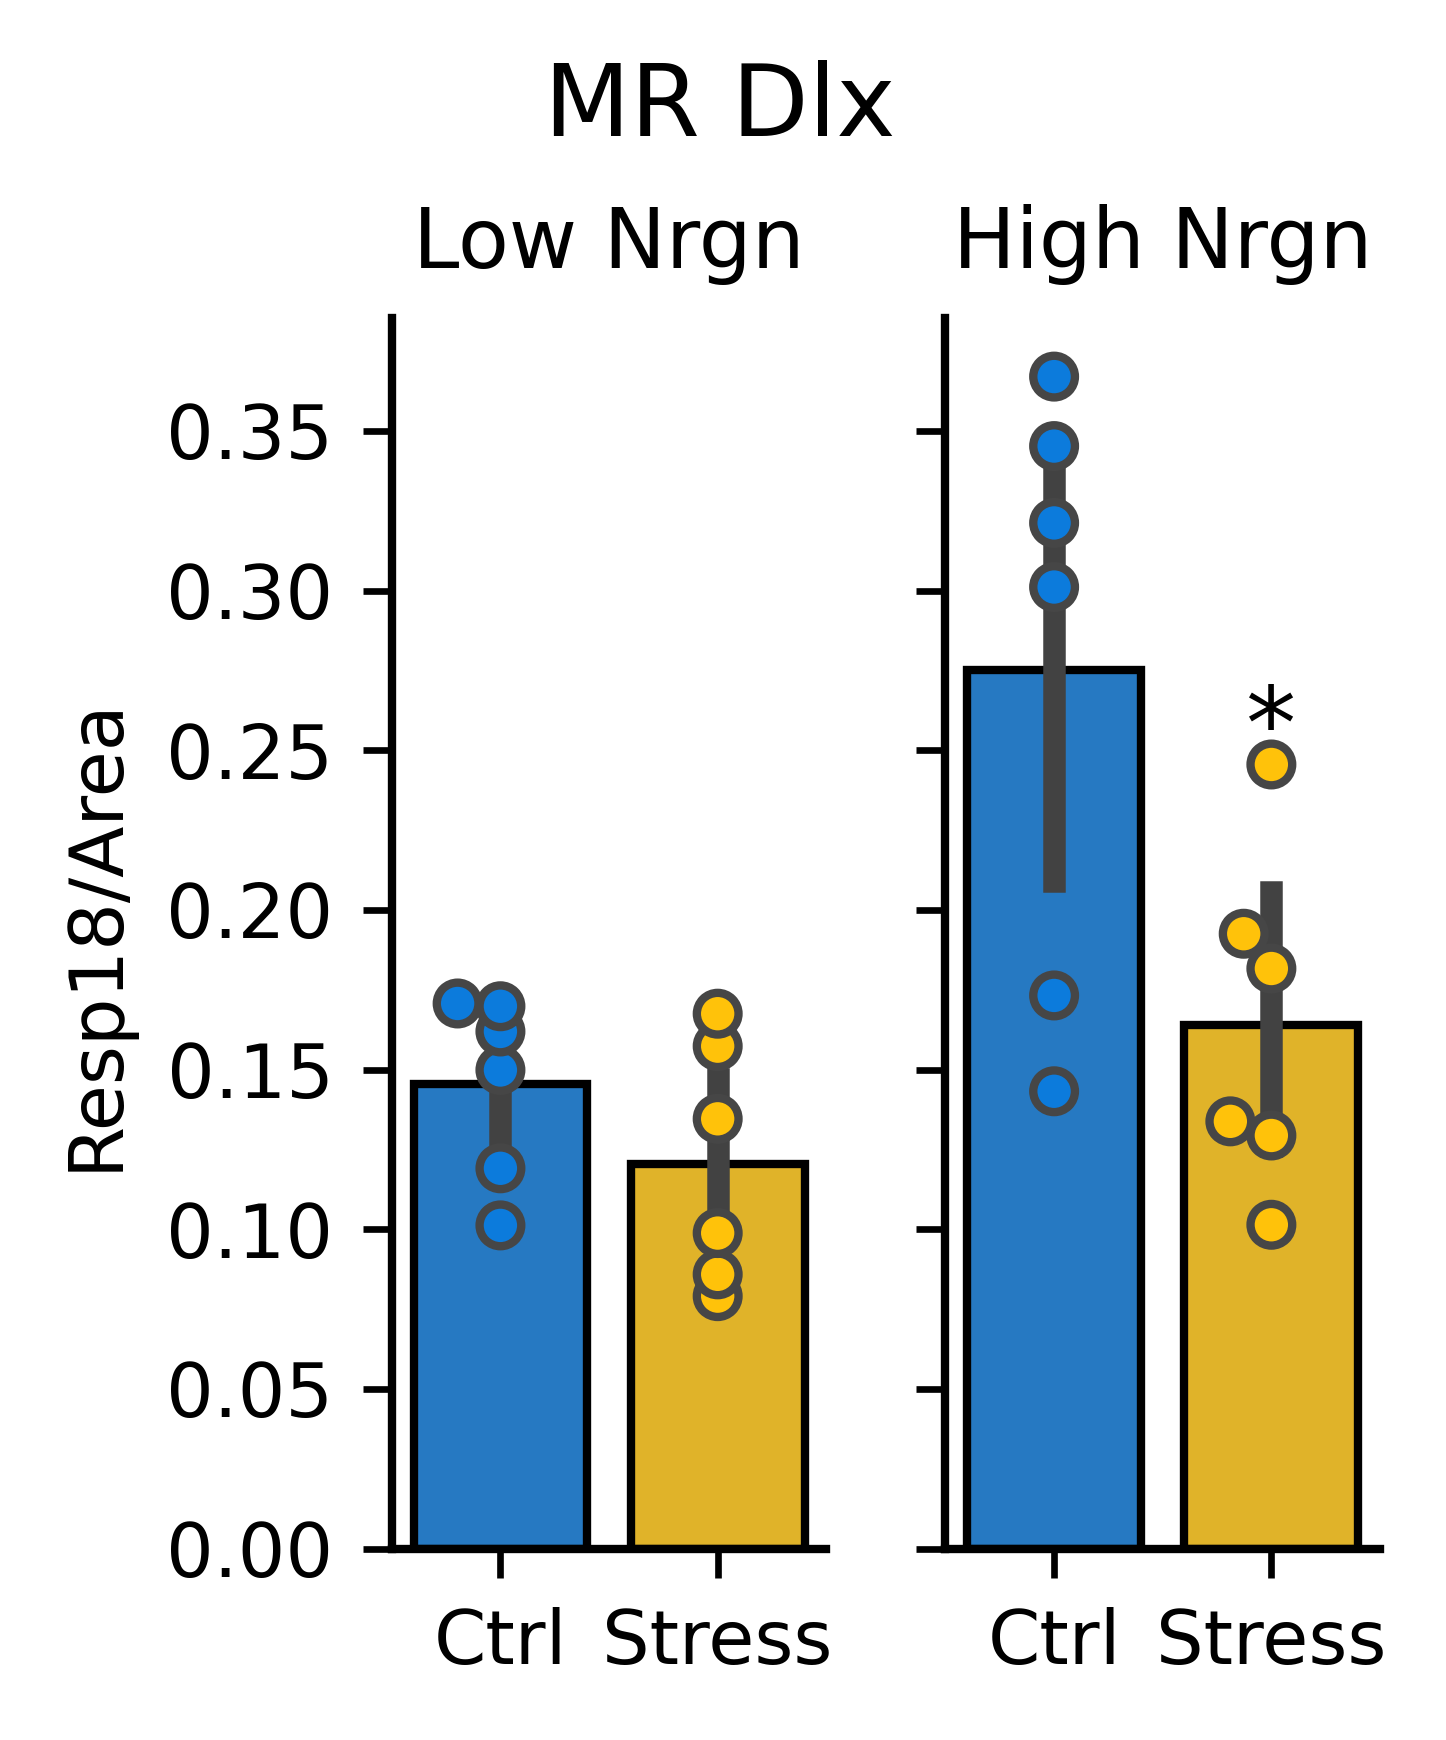

In [38]:
paired_boxplot('WT', 'WT')
paired_boxplot('GrNex', 'GR Nex')
paired_boxplot('GrDlx', 'GR Dlx')
paired_boxplot('MrNex', 'MR Nex')
paired_boxplot('MrDlx', 'MR Dlx')